## Среда POGEMA (Partially Observable Grid Environments for Multiple Agents)

Среда представляет собой клеточное поле с расположенными на нём агентами, их целями и препятствиями. Каждому агенту необходимо добраться до своей цели, избегая препятствий и других агентов. Пример среды, показывающей частичную наблюдаемость для одного агента:

<div>
    <img src="https://raw.githubusercontent.com/Tviskaron/pogema-pics/main/pics/pogema-obs.svg" width="600"/>
</div>

* Наблюдение представляет собой 3 матрицы. Кажда матрица центрирована относительно позиции агента. В качестве наблюдения для всех задач будет использован $R=5$ (поле 11x11 вокруг агента).
* Пространство действий: Агенту доступно 5 действий, движения в 4-ре возможные стороны и пропуск хода.
* Функция вознаграждения: Базовая функция вознаграждения -- это ``0.0`` для всех состояния, пока агент не дошел до цели и ``1.0``, когда дошёл.


## Установка

In [1]:
!pip install -q --quiet pogema

## Пример создания среды

Изменить параметры среды можно передав конфигурационный файл. Параметры, который могут быть вам полезны: 
* size – отвечает за размер окружения
* num_agents – количество агентов в среде
* density - плотность препятствий (рекомендуется использовать значения от 0.2 до 0.4, на них же будет проверяться и ваше решение)
* seed – фиксированное расположения препятствий, агентов и целей. По умолчанию выбирается случайно. Можно поставить None, для случайного выбора. Может быть полезно для проверки результатов.

In [2]:
import gym
from pogema.wrappers.multi_time_limit import MultiTimeLimit
from pogema.animation import AnimationMonitor
from IPython.display import SVG, display

import pogema
from pogema import GridConfig

import numpy as np

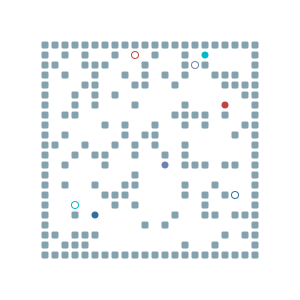

In [3]:
# Define random configuration
grid_config = GridConfig(num_agents=4,           # количество агентов на карте
                         size=20,                # размеры карты
                         density=0.3,            # плотность препятствий
                         seed=1,                 # сид генерации задания 
                         max_episode_steps=256,  # максимальная длина эпизода
                         obs_radius=5,           # радиус обзора
                        )

env = gym.make("Pogema-v0", grid_config=grid_config)
env = AnimationMonitor(env)

# обновляем окружение
obs = env.reset()

done = [False, ...]

while not all(done):
    # Используем случайную стратегию
    obs, reward, done, info = env.step([env.action_space.sample() for _ in range(len(obs))])

# сохраняем анимацию и рисуем ее
env.save_animation("render.svg", egocentric_idx=None)
display(SVG('render.svg'))

In [4]:
len(obs), len(reward), len(done)

(4, 4, 4)

## Пространство наблюдений и действий

In [5]:
env = gym.make('Pogema-v0')
obs = env.reset()
print('Observation shape:', obs[0].shape)
print('Action space:', env.action_space)

Observation shape: (3, 11, 11)
Action space: Discrete(5)


In [6]:
print(np.array(obs).shape)
# напечатаем наблюдение для одного агента
obs[0]

(1, 3, 11, 11)


array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [7]:
np.transpose(obs[0], (1,2,0)).shape

(11, 11, 3)

Доступ к состоянию среды можно получить используя поле ``grid``:

In [8]:
grid = env.grid

print(grid.obstacles) # препятствия
print(grid.positions_xy) # положения агентов
print(grid.finishes_xy) # цели агентов

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Т.к. среда является многоагентной по умолчанию – она принимает список действий агентов и выдает список наблюдений. 

## Agent

In [9]:
import random # Подключаем модель генерации случайных чисел random
import numpy as np # Подключаем модуль numpy
from collections import deque # Подключаем класс deque (очередь) модуля collections
from skimage.color import rgb2gray # Подключаем метод rgb2gray (РГБ в градации серого) библиотеки skimage.color
from skimage.transform import resize # Подключаем метод resize библиотеки skimage.transform
from tensorflow.keras.models import Sequential # Подключаем класс Sequential библиотеки keras.models
from tensorflow.keras.optimizers import RMSprop # Подключаем оптимизатор RMSprop библиотеки keras.optimizers
from tensorflow.keras.layers import Dense, Flatten # Подключаем слои Dense, Flatten библиотеки keras.layers
from tensorflow.keras.layers import Conv2D # Подключаем слой Conv2D библиотеки keras.layers.convolutional
from tensorflow.keras import backend as K # Подключаем модуль backend библиотеки keras

In [10]:
# Создаем класс агента
class Agent:
    # Инициализация
    def __init__(self, action_size, epsilon):
        self.render = False # Требуется ли рендерить игровой процесс
        self.load_model = False # Требуется ли загружать предобученную модель
        
        self.state_size = (11, 11, 3)  # Устанавиваем размеры игрового кадра
        self.action_size = action_size # Получаем количество возможных действий агента
        
        self.epsilon = epsilon # Устанавливаем текущее значение epsilon (для того, чтобы оставлять случайность в действиях)
        self.epsilon_start, self.epsilon_end = 1.0, 0.1 # Устанавливаем начальное и конечное значение epsilon
        self.exploration_steps = 1000000. # Устанавливаем количество шагов, во время которых будет изменять epsilon
        self.epsilon_decay_step = (self.epsilon_start - self.epsilon_end) \
                                  / self.exploration_steps # Устанавливаем шаг изменения epsilon
        
        self.batch_size = 32 # Устанавливаем размер батча
        self.train_start = 50000 # Устанавливаем количество шагов, после которых начинаем обучение модели        
        self.update_target_rate = 10000 # Устанавливаем количество шагов, после которых обновляем веса второй модели
        self.discount_factor = 0.99 # Устанавливаем коэффициент снижения весов (это y в формуле Беллмана)
        self.memory = deque(maxlen=400000) # Создаем объект deque, указывая макстмальное количество элементов
        
        self.model = self.build_model() # Создаем основную модель
        self.target_model = self.build_model() # Создаем дублирующую модель
        self.update_target_model() # Обновляем веса дублирующей модели

        self.avg_q_max, self.avg_loss = 0, 0 # Инициализируем среднее вознаграждение и среднюю ошибку
        
        if self.load_model: # Если требуется загрузить веса
            self.model.load_weights("model/pogema_dqn.h5") # Загружаем предобученные веса
    
    # Функция ошибки
    def q_loss(self, y_true, y_pred):
        # y_true - правильные награды
        # y_pred - прдесказанные награды
        error = K.abs(y_true - y_pred) # Плучаем модуль разности между предиктом и реальным значением
        q_part = K.clip(error, 0.0, 1.0) # Приводим ошибку error в интервал от 0 до 1
        linear_part = error - q_part # Получаем разницу между ошибкой error и ее clip'ом (все, что вышло за единицу)
        loss = K.mean(0.5 * K.square(q_part) + linear_part) # Считаем среднеквадратичную ошибку и выход за значение единицы
        return loss

    # Строим модель
    def build_model(self):
        model = Sequential()
        model.add(Conv2D(32, (3, 3), strides=(2, 2), activation='relu',
                         input_shape=self.state_size))
        model.add(Conv2D(64, (3, 3), strides=(2, 2), activation='relu'))
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
        model.add(Dense(self.action_size))
        model.compile(optimizer = RMSprop(learning_rate=0.00025, epsilon=0.01), loss = self.q_loss)
        return model
        
    # Функция обновления весов дублирующей модели
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights()) # Устанавливаем веса дублирующей модели с весов основной

    # Функция получения действия агента
    def get_action(self, state):
        if np.random.rand() <= self.epsilon: # Если случайно-сгенерированное число от 0 до 1 меньше текущего epsilon
            return np.random.randint(self.action_size, size=state.shape[0]) # Для каждого бота возвращаем случайное действие из возможных от 0 до action_size
        else:
            q_value = self.model.predict(state) # Получаем предикт модели по текущему кадру
            return np.argmax(q_value, axis=1) # Возвращаем индекс максимального вознаграждени

    # Функция записи в память 
    def replay_memory(self, state, action, reward, next_state):
        # Записываем в памть: 
        # текущее состояние
        # совершенное действие (на основе анализа этих четырех кадров) 
        # полученную награду (за совершенное действие), 
        # следующее состояние
        # Таких кортежей будет maxlen=400000
        self.memory.extend([*zip(state, action, reward, next_state)]) 

    # Функция обучения модели
    def train_replay(self):
        if len(self.memory) < self.train_start: # Если текущий размер памяти агента меньше установленного train_start
            return # Выходим и не обучаем модель
        if self.epsilon > self.epsilon_end: # Если значение epsilon меньше epsilon_end
            self.epsilon -= self.epsilon_decay_step # меньшаем значение epsilon на epsilon_decay_step

        mini_batch = random.sample(self.memory, self.batch_size) # Получаем из памяти агента случайный батч размером batch_size
        
        # Создаем numpy массив из batch_size-элементов с размерами игрового кадра
        state = np.zeros((self.batch_size, self.state_size[0],
                            self.state_size[1], self.state_size[2]))       # размер (num_agents, 11, 11, 3)
        # Создаем numpy массив из batch_size-элементов с размерами игрового кадра
        next_state = np.zeros((self.batch_size, self.state_size[0],
                                 self.state_size[1], self.state_size[2]))  # размер (num_agents, 11, 11, 3)
        target = np.zeros((self.batch_size,)) # Создаем numpy массив из batch_size-элементов (для последующего промежуточного хранения в нем наград)
        
        action, reward = [], []  # Инициализируем списки под действия, награды

        # достаем из батча данные
        for i in range(self.batch_size):
            state[i] = mini_batch[i][0]
            next_state[i] = mini_batch[i][3]
            action.append(mini_batch[i][1])
            reward.append(mini_batch[i][2])

        # в формуле Беллмана Q(s, a) и Q(s`, a`) предсказываются моделями.
        target_value = self.target_model.predict(next_state) # это предсказание Q(s`, a`)
        q_value = self.model.predict(state) # это предсказание Q(s, a) и это и есть вектор правильных ответов, но дальше мы его частично обновим 
                                              # (в части награды за фактически совершенное действие)

        # like Q Learning, get maximum Q value at s'
        # But from target model
        # а теперь нужно сформировать значения наград для обучения основной модели
        for i in range(self.batch_size):
            # пишем текущее вознаграждение + максимальное предсказанное вознаграждение на следующем шаге
            target[i] = reward[i] + self.discount_factor * np.amax(target_value[i])  # уравнение Беллмана

            q_value[i][action[i]] = target[i] # обновляем награду за совершенное действие (награды за другие действия останутся такими же)
        
        # далее мы учим модель предсказывать именно обновленные награды
        loss = self.model.train_on_batch(state, q_value)
        self.avg_loss += loss

    def save_model(self, name):
        self.model.save_weights(name)

## Создание среды и обучение

In [11]:
def create_env():
    grid_config = GridConfig(num_agents=np.random.randint(2, 16),  # количество агентов на карте
                            size=np.random.randint(16, 64),        # размеры карты
                            density=np.random.uniform(0.2, 0.4),   # плотность препятствий
                            seed=np.random.randint(10000),         # сид генерации задания 
                            max_episode_steps=256,                 # максимальная длина эпизода
                            obs_radius=5,                          # радиус обзора
                            )

    env = gym.make("Pogema-v0", grid_config=grid_config)
    return env

In [12]:
agent = Agent(action_size=5, epsilon=1)

EPISODES = 50000
global_step = 0
scores = []           # количество очков за каждый эпизод
average_scores = []   # среднее количество очков
for e in range(1, EPISODES):   # проходимся по количеству игровых эпизодов
    done = [False]

    step, score = 0, 0    # шаг эпизода, количество очков в эпизоде, количество жизней
    env = create_env()
    obs = env.reset()

    # At start of episode, there is no preceding frame
    # So just copy initial states to make state
    obs = np.array(obs)
    state = np.transpose(obs, (0,2,3,1))  # (num_agents, 3, 11, 11) -> (num_agents, 11, 11, 3)

    while not all(done):
        global_step += 1  # увеличиваем общее количество шагов
        step += 1         # увеоичиваем количество шагов текущего эпизода

        # get action for the current state and go one step in environment
        action = agent.get_action(state)

        obs, reward, done, info = env.step(action) # делаем шаг и получаем новое состояние, награду за действие и информации об окончании игры
        obs = np.array(obs)
        next_state = np.transpose(obs, (0,2,3,1))  # (num_agents, 3, 11, 11) -> (num_agents, 11, 11, 3)

        agent.avg_q_max += np.mean(np.amax(agent.model.predict(state), axis=1)) # amax - возвращает максимальное значение 
                                                                         # (в данном случае максимальное вознаграждение)
                                                                         # чтобы понимать сколько баллов зарабатываем
                                                                         # максимальная награда как раз соовтетствует действию, которое выберем, поэтом ее и добавляем в переменную)

        reward = np.clip(reward, -1., 1.) # любой сбитый блок приравниваем к 1

        # дополняем очередь новым состоянием среды
        agent.replay_memory(state, action, reward, next_state) 
        
        # обучаем модель
        agent.train_replay() # в методе прописана проверка на количество эпизодов, так что обучения не будет, если сыграно еще мало
        
        # обновляем вспомогательную модель каждый 10 тыс шагов
        if global_step % agent.update_target_rate == 0:
            agent.update_target_model()

        score += np.mean(reward) # увеличиваем количество наград

        state = next_state  # перезаписываем историю на историю следющего шага

        if all(done):            #  если игра завершена
            if global_step > agent.train_start:                
                stats = [score, agent.avg_q_max / float(step), step,
                         agent.avg_loss / float(step)]
            scores.append(score)
            average_scores.append(agent.avg_q_max / float(step))
            print("ep:", e, "  s.:", int(score), "  mem.len:",
                  len(agent.memory), "  eps:", round(agent.epsilon,2),
                  "  g_step:", global_step, "  av_q:",
                  round(agent.avg_q_max / float(step),3), "  av_loss:",
                  round(agent.avg_loss / float(step),7))

            agent.avg_q_max, agent.avg_loss = 0, 0

    # сохранение модели и количества наград
    if e % 50 == 0:
        agent.model.save_weights("pogema_dqn.h5")
        np.save('scores', np.array(scores))
        np.save('average_scores', np.array(average_scores))

2022-05-27 23:51:09.585014: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-27 23:51:09.585719: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


ep: 1   s.: 0   mem.len: 2816   eps: 1   g_step: 256   av_q: 0.056   av_loss: 0.0
ep: 2   s.: 0   mem.len: 4352   eps: 1   g_step: 512   av_q: 0.052   av_loss: 0.0
ep: 3   s.: 0   mem.len: 5120   eps: 1   g_step: 768   av_q: 0.047   av_loss: 0.0
ep: 4   s.: 0   mem.len: 6144   eps: 1   g_step: 1024   av_q: 0.05   av_loss: 0.0
ep: 5   s.: 0   mem.len: 7936   eps: 1   g_step: 1280   av_q: 0.044   av_loss: 0.0
ep: 6   s.: 0   mem.len: 10496   eps: 1   g_step: 1536   av_q: 0.045   av_loss: 0.0
ep: 7   s.: 0   mem.len: 12288   eps: 1   g_step: 1792   av_q: 0.051   av_loss: 0.0
ep: 8   s.: 0   mem.len: 13312   eps: 1   g_step: 2048   av_q: 0.053   av_loss: 0.0
ep: 9   s.: 0   mem.len: 15104   eps: 1   g_step: 2304   av_q: 0.055   av_loss: 0.0
ep: 10   s.: 0   mem.len: 17920   eps: 1   g_step: 2560   av_q: 0.046   av_loss: 0.0
ep: 11   s.: 0   mem.len: 19456   eps: 1   g_step: 2816   av_q: 0.051   av_loss: 0.0
ep: 12   s.: 0   mem.len: 21760   eps: 1   g_step: 3072   av_q: 0.044   av_loss: 0.

2022-05-27 23:59:39.524724: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-27 23:59:40.124193: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-27 23:59:42.864548: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-27 23:59:44.487149: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-27 23:59:52.717499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-27 23:59:54.415848: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-27 23:59:57.041522: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-27 23:59:57.310589: W tensorflow/core/data/root_dataset.cc:20

ep: 25   s.: 0   mem.len: 50688   eps: 1.0   g_step: 6400   av_q: 0.054   av_loss: 0.0001672


2022-05-28 00:00:08.280408: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:00:10.476093: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:00:13.184653: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:00:13.464700: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:00:18.203743: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:00:20.695261: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:00:21.603438: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:00:23.422368: W tensorflow/core/data/root_dataset.cc:20

ep: 26   s.: 0   mem.len: 54272   eps: 1.0   g_step: 6656   av_q: 0.06   av_loss: 0.0002621


2022-05-28 00:01:23.187629: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:01:23.417791: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:01:23.756227: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:01:25.068026: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:01:26.215898: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:01:31.940801: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:01:32.559684: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:01:32.805497: W tensorflow/core/data/root_dataset.cc:20

ep: 27   s.: 0   mem.len: 56576   eps: 1.0   g_step: 6912   av_q: 0.062   av_loss: 0.0001515


2022-05-28 00:02:46.553318: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:02:47.156108: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:02:58.709740: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:03:04.453857: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:03:04.723128: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:03:11.817546: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:03:12.718899: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:03:12.996128: W tensorflow/core/data/root_dataset.cc:20

ep: 28   s.: 0   mem.len: 60160   eps: 1.0   g_step: 7168   av_q: 0.069   av_loss: 0.0001265


2022-05-28 00:04:01.775805: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:04:28.977899: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:04:29.952379: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:04:31.818118: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:04:32.093391: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:04:40.892376: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:04:47.992740: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:04:50.461879: W tensorflow/core/data/root_dataset.cc:20

ep: 29   s.: 0   mem.len: 60928   eps: 1.0   g_step: 7424   av_q: 0.075   av_loss: 0.0001416


2022-05-28 00:05:22.186908: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:05:25.480445: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:05:36.851862: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:05:39.514055: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:05:42.379163: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:05:42.996345: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:05:43.745492: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:05:44.943204: W tensorflow/core/data/root_dataset.cc:20

ep: 30   s.: 0   mem.len: 64000   eps: 1.0   g_step: 7680   av_q: 0.071   av_loss: 0.0001728


2022-05-28 00:06:47.374733: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:06:57.497819: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:07:01.568843: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:07:07.695132: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:07:10.680383: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:07:14.772834: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:07:19.769385: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:07:23.896234: W tensorflow/core/data/root_dataset.cc:20

ep: 31   s.: 0   mem.len: 67584   eps: 1.0   g_step: 7936   av_q: 0.074   av_loss: 0.0001015


2022-05-28 00:08:06.167867: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:08:06.432355: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:08:07.059756: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:08:08.923374: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:08:17.948469: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:08:19.461128: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:08:23.565500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:08:26.474124: W tensorflow/core/data/root_dataset.cc:20

ep: 32   s.: 0   mem.len: 70144   eps: 1.0   g_step: 8192   av_q: 0.073   av_loss: 0.000123


2022-05-28 00:09:16.699661: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:09:17.509588: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:09:17.760004: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:09:27.807636: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:09:36.446479: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:09:40.761494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:09:41.387203: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:09:46.568225: W tensorflow/core/data/root_dataset.cc:20

ep: 33   s.: 0   mem.len: 72960   eps: 1.0   g_step: 8448   av_q: 0.073   av_loss: 7.51e-05


2022-05-28 00:10:36.203168: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:10:36.487941: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:10:38.139209: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:10:47.762926: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:10:59.920806: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:11:00.160214: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:11:10.412041: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:11:11.249680: W tensorflow/core/data/root_dataset.cc:20

ep: 34   s.: 0   mem.len: 73728   eps: 1.0   g_step: 8704   av_q: 0.072   av_loss: 0.0001338


2022-05-28 00:11:53.844112: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:11:54.082707: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:11:55.730418: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:11:56.677298: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:11:59.077499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:11:59.305005: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:12:03.223737: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:12:09.685806: W tensorflow/core/data/root_dataset.cc:20

ep: 35   s.: 0   mem.len: 75008   eps: 1.0   g_step: 8960   av_q: 0.068   av_loss: 0.0001361


2022-05-28 00:13:11.541697: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:13:16.257329: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:13:17.184384: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:13:17.791028: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:13:23.069782: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:13:38.316465: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:13:38.625185: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:13:40.049947: W tensorflow/core/data/root_dataset.cc:20

ep: 36   s.: 0   mem.len: 76032   eps: 1.0   g_step: 9216   av_q: 0.072   av_loss: 0.0001227


2022-05-28 00:14:34.044800: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:14:40.402813: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:14:41.299038: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:14:41.551646: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:14:43.502168: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:14:45.064678: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:14:50.688690: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:14:52.688241: W tensorflow/core/data/root_dataset.cc:20

ep: 37   s.: 0   mem.len: 77056   eps: 1.0   g_step: 9472   av_q: 0.076   av_loss: 0.0001575


2022-05-28 00:15:47.865281: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:15:48.709392: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:16:02.815675: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:16:10.085493: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:16:19.356399: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:16:23.689499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:16:26.234034: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:16:26.525988: W tensorflow/core/data/root_dataset.cc:20

ep: 38   s.: 0   mem.len: 78336   eps: 1.0   g_step: 9728   av_q: 0.073   av_loss: 8.6e-05


2022-05-28 00:17:09.726211: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:17:10.831131: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:17:12.388345: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:17:18.786692: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:17:19.065503: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:17:29.941482: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:17:31.882264: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:17:33.429964: W tensorflow/core/data/root_dataset.cc:20

ep: 39   s.: 0   mem.len: 80640   eps: 1.0   g_step: 9984   av_q: 0.073   av_loss: 0.0001086


2022-05-28 00:18:24.603735: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:18:26.932765: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:18:27.890903: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:18:28.486609: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:18:34.759221: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:18:38.733673: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:18:42.435062: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:18:43.371846: W tensorflow/core/data/root_dataset.cc:20

ep: 40   s.: 0   mem.len: 81408   eps: 1.0   g_step: 10240   av_q: 0.079   av_loss: 0.0001482


2022-05-28 00:19:44.578669: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:19:47.820038: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:19:49.989676: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:19:52.019204: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:19:53.232164: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:19:57.241541: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:20:11.152188: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:20:22.567722: W tensorflow/core/data/root_dataset.cc:20

ep: 41   s.: 0   mem.len: 83968   eps: 1.0   g_step: 10496   av_q: 0.089   av_loss: 0.0001245


2022-05-28 00:21:04.241501: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:21:21.438639: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:21:25.261492: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:21:36.914045: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:21:44.253819: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:22:02.092192: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:22:02.849496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:22:03.112951: W tensorflow/core/data/root_dataset.cc:20

ep: 42   s.: 0   mem.len: 84992   eps: 1.0   g_step: 10752   av_q: 0.092   av_loss: 0.0001045


2022-05-28 00:22:28.347918: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:22:30.994946: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:22:31.863622: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:22:33.474213: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:22:36.330736: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:22:40.449765: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:22:50.608502: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:22:54.834847: W tensorflow/core/data/root_dataset.cc:20

ep: 43   s.: 0   mem.len: 85760   eps: 1.0   g_step: 11008   av_q: 0.098   av_loss: 0.0001018


2022-05-28 00:23:42.854050: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:23:43.957052: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:23:50.876756: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:23:51.484131: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:23:51.731461: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:23:56.890342: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:24:18.344529: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:24:20.037385: W tensorflow/core/data/root_dataset.cc:20

ep: 44   s.: 0   mem.len: 86784   eps: 1.0   g_step: 11264   av_q: 0.092   av_loss: 6.56e-05


2022-05-28 00:25:03.491241: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:25:12.096441: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:25:15.961611: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:25:20.288930: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:25:23.046261: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:25:28.442621: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:25:32.135477: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:25:33.781422: W tensorflow/core/data/root_dataset.cc:20

ep: 45   s.: 0   mem.len: 87552   eps: 1.0   g_step: 11520   av_q: 0.092   av_loss: 6.39e-05


2022-05-28 00:26:27.936467: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:26:36.120925: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:26:38.719017: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:26:39.282261: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:26:40.268586: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:26:42.654778: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:26:45.733228: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:26:48.303124: W tensorflow/core/data/root_dataset.cc:20

ep: 46   s.: 0   mem.len: 88064   eps: 1.0   g_step: 11776   av_q: 0.095   av_loss: 8.53e-05


2022-05-28 00:27:40.916648: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:27:43.291306: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:27:47.650210: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:27:52.089769: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:27:53.663615: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:27:55.042159: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:27:56.864551: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:27:59.969494: W tensorflow/core/data/root_dataset.cc:20

ep: 47   s.: 0   mem.len: 91392   eps: 0.99   g_step: 12032   av_q: 0.094   av_loss: 8.62e-05


2022-05-28 00:29:10.769507: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:29:12.185551: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:29:14.343137: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:29:14.663517: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:29:16.753234: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:29:21.142485: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:29:24.449124: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:29:32.048422: W tensorflow/core/data/root_dataset.cc:20

ep: 48   s.: 0   mem.len: 94720   eps: 0.99   g_step: 12288   av_q: 0.097   av_loss: 9.38e-05


2022-05-28 00:30:22.568452: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:30:24.420568: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:30:29.918830: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:30:30.220378: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:30:30.553104: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:30:33.753371: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:30:38.607866: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:30:41.289497: W tensorflow/core/data/root_dataset.cc:20

ep: 49   s.: 0   mem.len: 98304   eps: 0.99   g_step: 12544   av_q: 0.098   av_loss: 5.03e-05


2022-05-28 00:31:47.308325: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:31:52.742781: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:32:00.281146: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:32:03.690655: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:32:05.043156: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:32:07.364791: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:32:10.432035: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:32:16.334970: W tensorflow/core/data/root_dataset.cc:20

ep: 50   s.: 0   mem.len: 101120   eps: 0.99   g_step: 12800   av_q: 0.092   av_loss: 0.0001206


2022-05-28 00:33:04.981000: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:33:07.668912: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:33:09.802018: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:33:21.805367: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:33:29.604042: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:33:36.380931: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:33:38.135864: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:33:38.376956: W tensorflow/core/data/root_dataset.cc:20

ep: 51   s.: 0   mem.len: 102400   eps: 0.99   g_step: 13056   av_q: 0.098   av_loss: 0.0001108


2022-05-28 00:34:21.078508: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:34:25.118667: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:34:26.773356: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:34:28.695001: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:34:30.878909: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:34:35.747043: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:34:36.514012: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:34:47.445732: W tensorflow/core/data/root_dataset.cc:20

ep: 52   s.: 0   mem.len: 104960   eps: 0.99   g_step: 13312   av_q: 0.098   av_loss: 7.31e-05


2022-05-28 00:35:41.153591: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:35:41.412977: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:35:41.935378: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:35:42.169473: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:35:42.614063: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:35:45.106724: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:36:05.340607: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:36:07.572630: W tensorflow/core/data/root_dataset.cc:20

ep: 53   s.: 0   mem.len: 106752   eps: 0.99   g_step: 13568   av_q: 0.096   av_loss: 8.18e-05


2022-05-28 00:36:57.434538: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:36:57.786602: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:37:12.280132: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:37:16.647527: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:37:17.577636: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:37:23.450605: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:37:27.345459: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:37:34.006532: W tensorflow/core/data/root_dataset.cc:20

ep: 54   s.: 0   mem.len: 107776   eps: 0.99   g_step: 13824   av_q: 0.091   av_loss: 9.79e-05


2022-05-28 00:38:21.398644: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:38:21.657199: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:38:25.949101: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:38:27.468584: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:38:33.233364: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:38:35.307547: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:38:36.603417: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:38:43.004939: W tensorflow/core/data/root_dataset.cc:20

ep: 55   s.: 0   mem.len: 110336   eps: 0.99   g_step: 14080   av_q: 0.091   av_loss: 0.0001449


2022-05-28 00:39:40.106002: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:39:46.134541: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:39:48.660076: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:39:54.636719: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:39:55.573174: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:39:56.803969: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:40:01.858728: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:40:03.287170: W tensorflow/core/data/root_dataset.cc:20

ep: 56   s.: 0   mem.len: 112896   eps: 0.99   g_step: 14336   av_q: 0.096   av_loss: 0.000146


2022-05-28 00:41:06.245239: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:41:06.878217: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:41:12.818438: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:41:13.267537: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:41:24.801366: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:41:27.343382: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:41:32.995227: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:41:55.173765: W tensorflow/core/data/root_dataset.cc:20

ep: 57   s.: 0   mem.len: 115456   eps: 0.99   g_step: 14592   av_q: 0.094   av_loss: 0.0001314


2022-05-28 00:42:27.758262: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:42:36.648293: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:42:40.242679: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:42:49.969081: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:42:51.283233: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:42:52.736131: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:42:57.173490: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:42:57.475549: W tensorflow/core/data/root_dataset.cc:20

ep: 58   s.: 0   mem.len: 116224   eps: 0.99   g_step: 14848   av_q: 0.1   av_loss: 8.38e-05


2022-05-28 00:43:38.289037: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:43:49.317280: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:43:49.585499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:43:59.516884: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:44:02.004596: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:44:06.586232: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:44:25.187818: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:44:38.394573: W tensorflow/core/data/root_dataset.cc:20

ep: 59   s.: 0   mem.len: 119040   eps: 0.99   g_step: 15104   av_q: 0.094   av_loss: 7.05e-05


2022-05-28 00:44:57.221431: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:44:59.383775: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:45:01.348116: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:45:10.944806: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:45:11.923782: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:45:16.280918: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:45:17.176469: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:45:19.042131: W tensorflow/core/data/root_dataset.cc:20

ep: 60   s.: 0   mem.len: 120576   eps: 0.99   g_step: 15360   av_q: 0.095   av_loss: 7.07e-05


2022-05-28 00:46:26.747712: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:46:36.135263: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:46:37.634374: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:46:42.338021: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:46:43.885608: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:46:44.205657: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:46:45.562846: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:46:45.830947: W tensorflow/core/data/root_dataset.cc:20

ep: 61   s.: 0   mem.len: 121856   eps: 0.99   g_step: 15616   av_q: 0.097   av_loss: 0.0001049


2022-05-28 00:47:42.971789: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:47:47.849165: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:47:49.516825: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:47:56.997967: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:47:59.901265: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:48:00.290755: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:48:01.322133: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:48:05.832487: W tensorflow/core/data/root_dataset.cc:20

ep: 62   s.: 0   mem.len: 123136   eps: 0.99   g_step: 15872   av_q: 0.09   av_loss: 0.0001072


2022-05-28 00:49:12.925234: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:49:14.621804: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:49:15.668206: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:49:17.251418: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:49:18.509196: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:49:20.340239: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:49:23.881160: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:49:26.646298: W tensorflow/core/data/root_dataset.cc:20

ep: 63   s.: 0   mem.len: 125952   eps: 0.99   g_step: 16128   av_q: 0.096   av_loss: 0.0001531


2022-05-28 00:50:25.615045: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:50:28.068616: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:50:28.457061: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:50:29.093498: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:50:33.155393: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:50:46.245836: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:50:46.927191: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:50:48.225492: W tensorflow/core/data/root_dataset.cc:20

ep: 64   s.: 0   mem.len: 126464   eps: 0.99   g_step: 16384   av_q: 0.096   av_loss: 5.71e-05


2022-05-28 00:51:49.204009: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:51:49.609492: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:51:55.953512: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:51:57.253784: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:51:59.907765: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:52:05.922062: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:52:06.559740: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:52:06.873978: W tensorflow/core/data/root_dataset.cc:20

ep: 65   s.: 0   mem.len: 128512   eps: 0.99   g_step: 16640   av_q: 0.091   av_loss: 0.000117


2022-05-28 00:53:13.928856: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:53:15.522234: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:53:16.118247: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:53:17.422110: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:53:18.388065: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:53:19.717655: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:53:22.405783: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:53:22.718791: W tensorflow/core/data/root_dataset.cc:20

ep: 66   s.: 0   mem.len: 129024   eps: 0.99   g_step: 16896   av_q: 0.099   av_loss: 8.19e-05


2022-05-28 00:54:35.047486: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:54:35.906561: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:54:36.877209: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:54:39.945412: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:54:40.861391: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:54:45.993196: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:54:49.577750: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:54:50.481066: W tensorflow/core/data/root_dataset.cc:20

ep: 67   s.: 0   mem.len: 130048   eps: 0.99   g_step: 17152   av_q: 0.092   av_loss: 9.32e-05


2022-05-28 00:55:54.926990: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:55:55.207678: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:56:07.201875: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:56:11.208935: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:56:11.554088: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:56:12.150549: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:56:12.676008: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:56:13.666937: W tensorflow/core/data/root_dataset.cc:20

ep: 68   s.: 0   mem.len: 131584   eps: 0.99   g_step: 17408   av_q: 0.098   av_loss: 6.66e-05


2022-05-28 00:57:17.997485: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:57:20.816015: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:57:29.242149: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:57:29.527955: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:57:35.938860: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:57:40.161370: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:57:46.160090: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:57:47.092719: W tensorflow/core/data/root_dataset.cc:20

ep: 69   s.: 0   mem.len: 133888   eps: 0.99   g_step: 17664   av_q: 0.094   av_loss: 8.06e-05


2022-05-28 00:58:36.115906: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:58:39.846100: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:58:41.838039: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:58:42.235764: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:58:45.659105: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:58:57.234617: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:59:01.017680: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 00:59:01.678668: W tensorflow/core/data/root_dataset.cc:20

ep: 70   s.: 0   mem.len: 135680   eps: 0.99   g_step: 17920   av_q: 0.092   av_loss: 5.78e-05


2022-05-28 00:59:59.689778: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:00:04.200087: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:00:11.189260: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:00:17.679649: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:00:23.281493: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:00:30.229028: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:00:35.607221: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:00:35.887781: W tensorflow/core/data/root_dataset.cc:20

ep: 71   s.: 0   mem.len: 137216   eps: 0.99   g_step: 18176   av_q: 0.089   av_loss: 0.0001402


2022-05-28 01:01:17.886935: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:01:23.710697: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:01:29.755330: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:01:34.891174: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:01:36.459539: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:01:39.435848: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:01:49.253056: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:01:49.531881: W tensorflow/core/data/root_dataset.cc:20

ep: 72   s.: 0   mem.len: 141056   eps: 0.99   g_step: 18432   av_q: 0.094   av_loss: 5.59e-05


2022-05-28 01:02:43.126840: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:02:53.575502: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:02:56.532265: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:03:01.327936: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:03:01.897942: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:03:03.055759: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:03:03.365122: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:03:10.697484: W tensorflow/core/data/root_dataset.cc:20

ep: 73   s.: 0   mem.len: 143616   eps: 0.99   g_step: 18688   av_q: 0.09   av_loss: 0.0001137


2022-05-28 01:03:58.929302: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:04:12.143695: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:04:14.719198: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:04:16.901497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:04:22.042349: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:04:25.055895: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:04:33.045186: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:04:33.944350: W tensorflow/core/data/root_dataset.cc:20

ep: 74   s.: 0   mem.len: 145152   eps: 0.99   g_step: 18944   av_q: 0.099   av_loss: 0.0001007


2022-05-28 01:05:21.181607: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:05:22.805176: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:05:23.756136: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:05:26.641592: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:05:29.589494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:05:30.493771: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:05:34.270811: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:05:35.676575: W tensorflow/core/data/root_dataset.cc:20

ep: 75   s.: 0   mem.len: 145920   eps: 0.99   g_step: 19200   av_q: 0.09   av_loss: 0.0001039


2022-05-28 01:06:48.101476: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:06:49.701902: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:06:50.063943: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:06:52.557531: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:06:54.810998: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:06:58.346645: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:07:10.712712: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:07:16.602103: W tensorflow/core/data/root_dataset.cc:20

ep: 76   s.: 0   mem.len: 146688   eps: 0.99   g_step: 19456   av_q: 0.094   av_loss: 7.8e-05


2022-05-28 01:08:02.421499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:08:09.367794: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:08:11.181947: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:08:12.089984: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:08:12.806117: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:08:13.031952: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:08:14.997923: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:08:17.105506: W tensorflow/core/data/root_dataset.cc:20

ep: 77   s.: 0   mem.len: 148480   eps: 0.99   g_step: 19712   av_q: 0.093   av_loss: 0.000104


2022-05-28 01:09:25.439379: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:09:28.976136: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:09:29.805460: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:09:33.211643: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:09:38.216244: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:09:40.089251: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:09:46.905838: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:09:48.292012: W tensorflow/core/data/root_dataset.cc:20

ep: 78   s.: 0   mem.len: 151040   eps: 0.99   g_step: 19968   av_q: 0.091   av_loss: 6.61e-05


2022-05-28 01:10:48.711971: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:11:01.244832: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:11:06.636517: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:11:07.799690: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:11:10.391666: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:11:12.047947: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:11:13.810524: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:11:16.334032: W tensorflow/core/data/root_dataset.cc:20

ep: 79   s.: 0   mem.len: 154624   eps: 0.99   g_step: 20224   av_q: 0.097   av_loss: 0.0001549


2022-05-28 01:12:09.204343: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:12:18.876607: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:12:20.937831: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:12:25.577522: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:12:27.233497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:12:35.302978: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:12:50.361727: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:12:50.678872: W tensorflow/core/data/root_dataset.cc:20

ep: 80   s.: 0   mem.len: 155904   eps: 0.99   g_step: 20480   av_q: 0.103   av_loss: 8.33e-05


2022-05-28 01:13:24.002585: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:13:24.998613: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:13:29.291841: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:13:29.650142: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:13:31.604013: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:13:35.277835: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:13:36.818051: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:13:39.427011: W tensorflow/core/data/root_dataset.cc:20

ep: 81   s.: 0   mem.len: 158976   eps: 0.99   g_step: 20736   av_q: 0.108   av_loss: 6.41e-05


2022-05-28 01:14:51.162171: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:14:52.217581: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:14:57.771976: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:15:00.796976: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:15:01.776567: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:15:09.980537: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:15:13.112465: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:15:15.724688: W tensorflow/core/data/root_dataset.cc:20

ep: 82   s.: 0   mem.len: 161024   eps: 0.99   g_step: 20992   av_q: 0.115   av_loss: 6.19e-05


2022-05-28 01:16:18.564252: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:16:24.560107: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:16:26.642446: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:16:37.065523: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:16:39.832004: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:16:47.937255: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:17:02.751827: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:17:11.604726: W tensorflow/core/data/root_dataset.cc:20

ep: 83   s.: 0   mem.len: 162304   eps: 0.99   g_step: 21248   av_q: 0.106   av_loss: 9.96e-05


2022-05-28 01:17:28.225259: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:17:30.631267: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:17:32.063368: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:17:33.814275: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:17:39.621411: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:17:43.497484: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:17:45.682766: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:17:48.547406: W tensorflow/core/data/root_dataset.cc:20

ep: 84   s.: 0   mem.len: 163072   eps: 0.99   g_step: 21504   av_q: 0.111   av_loss: 0.0001107


2022-05-28 01:18:54.914019: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:19:07.914206: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:19:09.588707: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:19:13.735955: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:19:15.065425: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:19:16.190605: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:19:16.421193: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:19:30.363180: W tensorflow/core/data/root_dataset.cc:20

ep: 85   s.: 0   mem.len: 165120   eps: 0.99   g_step: 21760   av_q: 0.114   av_loss: 6.23e-05


2022-05-28 01:20:12.633588: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:20:25.069499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:20:40.233546: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:20:40.755786: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:20:42.358511: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:20:43.985471: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:20:46.342603: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:20:47.449105: W tensorflow/core/data/root_dataset.cc:20

ep: 86   s.: 0   mem.len: 168192   eps: 0.99   g_step: 22016   av_q: 0.113   av_loss: 6.12e-05


2022-05-28 01:21:32.327960: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:21:35.411541: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:21:36.390562: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:21:37.033779: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:21:38.549430: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:21:39.125298: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:21:42.373597: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:21:49.146308: W tensorflow/core/data/root_dataset.cc:20

ep: 87   s.: 0   mem.len: 170752   eps: 0.99   g_step: 22272   av_q: 0.113   av_loss: 0.0001082


2022-05-28 01:23:00.675864: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:23:03.073057: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:23:07.654152: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:23:08.943610: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:23:17.464518: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:23:18.805900: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:23:25.505889: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:23:28.441009: W tensorflow/core/data/root_dataset.cc:20

ep: 88   s.: 0   mem.len: 171520   eps: 0.99   g_step: 22528   av_q: 0.109   av_loss: 8.72e-05


2022-05-28 01:24:13.881500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:24:14.151814: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:24:14.634602: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:24:14.873672: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:24:16.582976: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:24:17.883676: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:24:26.163783: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:24:28.287367: W tensorflow/core/data/root_dataset.cc:20

ep: 89   s.: 0   mem.len: 172032   eps: 0.99   g_step: 22784   av_q: 0.109   av_loss: 7.19e-05


2022-05-28 01:25:38.251129: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:25:44.838612: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:25:45.109221: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:25:46.360054: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:25:50.877095: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:25:55.397513: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:25:56.671856: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:26:03.891570: W tensorflow/core/data/root_dataset.cc:20

ep: 90   s.: 0   mem.len: 174336   eps: 0.98   g_step: 23040   av_q: 0.118   av_loss: 6.03e-05


2022-05-28 01:27:05.222419: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:27:07.292015: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:27:07.842779: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:27:17.942290: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:27:18.720352: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:27:24.431694: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:27:29.627192: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:27:32.168123: W tensorflow/core/data/root_dataset.cc:20

ep: 91   s.: 0   mem.len: 175616   eps: 0.98   g_step: 23296   av_q: 0.109   av_loss: 0.0001199


2022-05-28 01:28:27.799986: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:28:29.014678: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:28:32.160613: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:28:32.889618: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:28:39.803387: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:28:41.146568: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:28:45.793311: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:28:56.754067: W tensorflow/core/data/root_dataset.cc:20

ep: 92   s.: 0   mem.len: 178944   eps: 0.98   g_step: 23552   av_q: 0.116   av_loss: 6.1e-05


2022-05-28 01:29:53.466241: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:30:00.277420: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:30:01.810852: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:30:05.848877: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:30:07.632471: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:30:11.884767: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:30:20.960279: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:30:21.848485: W tensorflow/core/data/root_dataset.cc:20

ep: 93   s.: 0   mem.len: 182528   eps: 0.98   g_step: 23808   av_q: 0.114   av_loss: 7.2e-05


2022-05-28 01:31:02.911139: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:31:04.684737: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:31:05.997179: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:31:11.788122: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:31:17.393392: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:31:20.817291: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:31:28.760910: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:31:29.379983: W tensorflow/core/data/root_dataset.cc:20

ep: 94   s.: 0   mem.len: 185344   eps: 0.98   g_step: 24064   av_q: 0.106   av_loss: 7.28e-05


2022-05-28 01:32:33.588534: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:32:34.168939: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:32:37.477199: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:32:39.830980: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:32:51.590239: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:32:58.955238: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:33:06.560698: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:33:07.515085: W tensorflow/core/data/root_dataset.cc:20

ep: 95   s.: 0   mem.len: 188928   eps: 0.98   g_step: 24320   av_q: 0.116   av_loss: 6.17e-05


2022-05-28 01:33:47.815814: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:33:49.627538: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:33:50.808315: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:33:52.945093: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:33:55.719780: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:33:59.620538: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:34:10.484569: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:34:16.392263: W tensorflow/core/data/root_dataset.cc:20

ep: 96   s.: 0   mem.len: 191232   eps: 0.98   g_step: 24576   av_q: 0.108   av_loss: 9.6e-05


2022-05-28 01:35:11.274213: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:35:12.545490: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:35:23.954110: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:35:27.679675: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:35:30.079783: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:35:31.098538: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:35:34.299211: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:35:35.435073: W tensorflow/core/data/root_dataset.cc:20

ep: 97   s.: 0   mem.len: 195072   eps: 0.98   g_step: 24832   av_q: 0.106   av_loss: 7.06e-05


2022-05-28 01:36:33.434960: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:36:41.220712: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:36:46.344982: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:36:46.951250: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:36:55.294261: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:37:02.882734: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:37:03.175803: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:37:03.741074: W tensorflow/core/data/root_dataset.cc:20

ep: 98   s.: 0   mem.len: 195840   eps: 0.98   g_step: 25088   av_q: 0.112   av_loss: 8.48e-05


2022-05-28 01:37:56.376333: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:38:00.706350: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:38:08.192316: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:38:14.746792: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:38:23.713788: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:38:27.066176: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:38:29.159517: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:38:34.623752: W tensorflow/core/data/root_dataset.cc:20

ep: 99   s.: 0   mem.len: 196352   eps: 0.98   g_step: 25344   av_q: 0.107   av_loss: 9.47e-05


2022-05-28 01:39:17.435455: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:39:25.608732: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:39:26.179555: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:39:31.341103: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:39:31.984001: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:39:32.606488: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:39:34.463604: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:39:35.940513: W tensorflow/core/data/root_dataset.cc:20

ep: 100   s.: 0   mem.len: 197888   eps: 0.98   g_step: 25600   av_q: 0.112   av_loss: 7.17e-05


2022-05-28 01:40:45.990019: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:40:49.965778: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:40:51.079377: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:40:52.826850: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:40:55.137657: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:41:00.053357: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:41:02.864085: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:41:03.122271: W tensorflow/core/data/root_dataset.cc:20

ep: 101   s.: 0   mem.len: 201472   eps: 0.98   g_step: 25856   av_q: 0.108   av_loss: 8.28e-05


2022-05-28 01:42:04.556055: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:42:05.913971: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:42:13.491743: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:42:18.152587: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:42:18.412472: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:42:21.830506: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:42:29.758234: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:42:40.351864: W tensorflow/core/data/root_dataset.cc:20

ep: 102   s.: 0   mem.len: 202496   eps: 0.98   g_step: 26112   av_q: 0.111   av_loss: 9.63e-05


2022-05-28 01:43:26.113492: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:43:29.309852: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:43:29.562136: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:43:35.897500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:43:42.039432: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:43:42.332409: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:43:42.625803: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:43:54.195716: W tensorflow/core/data/root_dataset.cc:20

ep: 103   s.: 0   mem.len: 206080   eps: 0.98   g_step: 26368   av_q: 0.113   av_loss: 4.7e-05


2022-05-28 01:44:48.612632: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:44:56.586497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:44:58.841523: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:45:10.529623: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:45:18.978700: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:45:25.811280: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:45:27.274068: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:45:32.509528: W tensorflow/core/data/root_dataset.cc:20

ep: 104   s.: 0   mem.len: 207104   eps: 0.98   g_step: 26624   av_q: 0.115   av_loss: 8.37e-05


2022-05-28 01:46:13.931495: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:46:17.682190: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:46:24.529499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:46:27.937544: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:46:28.334329: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:46:31.853154: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:46:33.502009: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:46:37.827047: W tensorflow/core/data/root_dataset.cc:20

ep: 105   s.: 0   mem.len: 210432   eps: 0.98   g_step: 26880   av_q: 0.11   av_loss: 4.59e-05


2022-05-28 01:47:33.310268: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:47:47.034346: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:47:47.355720: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:47:48.253931: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:47:49.392755: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:47:54.519390: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:47:56.945497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:48:01.684970: W tensorflow/core/data/root_dataset.cc:20

ep: 106   s.: 0   mem.len: 214272   eps: 0.98   g_step: 27136   av_q: 0.106   av_loss: 4.7e-05


2022-05-28 01:49:01.767155: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:49:03.486235: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:49:09.728091: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:49:14.442078: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:49:15.686099: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:49:19.637194: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:49:20.900315: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:49:23.273557: W tensorflow/core/data/root_dataset.cc:20

ep: 107   s.: 0   mem.len: 215040   eps: 0.98   g_step: 27392   av_q: 0.111   av_loss: 7.21e-05


2022-05-28 01:50:23.379454: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:50:24.006450: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:50:27.627520: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:50:33.738166: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:50:34.653564: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:50:36.529057: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:50:37.072392: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:50:43.741500: W tensorflow/core/data/root_dataset.cc:20

ep: 108   s.: 0   mem.len: 218624   eps: 0.98   g_step: 27648   av_q: 0.11   av_loss: 7.01e-05


2022-05-28 01:51:45.628939: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:51:46.625503: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:51:54.313526: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:51:55.503870: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:51:56.873128: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:51:58.293718: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:51:58.619594: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:51:59.274340: W tensorflow/core/data/root_dataset.cc:20

ep: 109   s.: 0   mem.len: 221184   eps: 0.98   g_step: 27904   av_q: 0.113   av_loss: 9.48e-05


2022-05-28 01:53:03.946455: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:53:08.384938: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:53:34.570074: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:53:37.730834: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:53:38.373742: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:53:42.950771: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:53:43.291008: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:53:46.187561: W tensorflow/core/data/root_dataset.cc:20

ep: 110   s.: 0   mem.len: 224768   eps: 0.98   g_step: 28160   av_q: 0.111   av_loss: 8.14e-05


2022-05-28 01:54:26.538077: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:54:29.135845: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:54:33.167617: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:54:35.560757: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:54:37.291186: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:54:38.205490: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:54:38.857494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:54:43.383867: W tensorflow/core/data/root_dataset.cc:20

ep: 111   s.: 0   mem.len: 227328   eps: 0.98   g_step: 28416   av_q: 0.11   av_loss: 6.81e-05


2022-05-28 01:55:50.595789: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:55:50.866238: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:56:03.051234: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:56:03.684326: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:56:04.078524: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:56:04.362770: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:56:12.070974: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:56:12.335775: W tensorflow/core/data/root_dataset.cc:20

ep: 112   s.: 0   mem.len: 231168   eps: 0.98   g_step: 28672   av_q: 0.115   av_loss: 6.78e-05


2022-05-28 01:57:13.405016: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:57:23.483407: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:57:28.485198: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:57:33.457715: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:57:36.406126: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:57:37.681892: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:57:38.935114: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:57:46.192953: W tensorflow/core/data/root_dataset.cc:20

ep: 113   s.: 0   mem.len: 235008   eps: 0.98   g_step: 28928   av_q: 0.11   av_loss: 0.0001182


2022-05-28 01:58:33.913490: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:58:35.031882: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:58:38.044571: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:58:40.605125: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:58:42.073262: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:58:43.140633: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:58:45.329459: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 01:58:45.940819: W tensorflow/core/data/root_dataset.cc:20

ep: 114   s.: 0   mem.len: 236032   eps: 0.98   g_step: 29184   av_q: 0.11   av_loss: 0.0001312


2022-05-28 01:59:59.765556: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:00:01.561290: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:00:10.324041: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:00:22.275239: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:00:22.790227: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:00:30.885714: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:00:34.206608: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:00:44.235980: W tensorflow/core/data/root_dataset.cc:20

ep: 115   s.: 0   mem.len: 238080   eps: 0.98   g_step: 29440   av_q: 0.115   av_loss: 6.87e-05


2022-05-28 02:01:23.141518: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:01:24.266889: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:01:38.138220: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:01:38.872704: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:01:39.429405: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:01:40.231336: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:01:41.680231: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:01:53.898460: W tensorflow/core/data/root_dataset.cc:20

ep: 116   s.: 0   mem.len: 240384   eps: 0.98   g_step: 29696   av_q: 0.11   av_loss: 7e-05


2022-05-28 02:02:44.261356: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:03:01.235016: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:03:03.947625: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:03:15.991402: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:03:16.608095: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:03:24.580894: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:03:25.296133: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:03:33.947350: W tensorflow/core/data/root_dataset.cc:20

ep: 117   s.: 0   mem.len: 241408   eps: 0.98   g_step: 29952   av_q: 0.111   av_loss: 4.45e-05


2022-05-28 02:04:07.807560: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:04:08.492496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:04:23.543795: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:04:27.434617: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:04:29.102046: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:04:35.828833: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:04:36.077971: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:04:37.702494: W tensorflow/core/data/root_dataset.cc:20

ep: 118   s.: 0   mem.len: 244224   eps: 0.98   g_step: 30208   av_q: 0.108   av_loss: 6.98e-05


2022-05-28 02:05:29.633282: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:05:30.489497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:05:30.718158: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:05:33.178869: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:05:38.088578: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:05:51.138582: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:05:58.986998: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:06:07.738251: W tensorflow/core/data/root_dataset.cc:20

ep: 119   s.: 0   mem.len: 247808   eps: 0.98   g_step: 30464   av_q: 0.116   av_loss: 0.0001458


2022-05-28 02:06:55.768338: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:07:05.617456: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:07:05.917154: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:07:09.660148: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:07:16.175841: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:07:18.206916: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:07:22.158210: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:07:24.882257: W tensorflow/core/data/root_dataset.cc:20

ep: 120   s.: 0   mem.len: 251392   eps: 0.98   g_step: 30720   av_q: 0.124   av_loss: 8.15e-05


2022-05-28 02:08:18.689496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:08:20.224659: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:08:20.724185: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:08:24.331262: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:08:26.486924: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:08:26.746140: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:08:31.742210: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:08:43.003751: W tensorflow/core/data/root_dataset.cc:20

ep: 121   s.: 0   mem.len: 251904   eps: 0.98   g_step: 30976   av_q: 0.127   av_loss: 6.78e-05


2022-05-28 02:09:46.470008: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:09:48.340770: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:09:53.465504: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:09:54.031494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:10:06.740177: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:10:07.399486: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:10:11.485493: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:10:12.368957: W tensorflow/core/data/root_dataset.cc:20

ep: 122   s.: 0   mem.len: 254976   eps: 0.98   g_step: 31232   av_q: 0.128   av_loss: 0.0001125


2022-05-28 02:11:05.691571: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:11:16.563032: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:11:25.301959: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:11:29.820235: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:11:32.293812: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:11:39.977945: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:11:43.583593: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:11:43.835786: W tensorflow/core/data/root_dataset.cc:20

ep: 123   s.: 0   mem.len: 258560   eps: 0.98   g_step: 31488   av_q: 0.123   av_loss: 6.58e-05


2022-05-28 02:12:30.504868: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:12:35.316135: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:12:42.973485: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:12:52.953263: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:12:55.738117: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:12:57.308162: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:13:01.366230: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:13:07.873746: W tensorflow/core/data/root_dataset.cc:20

ep: 124   s.: 0   mem.len: 260352   eps: 0.98   g_step: 31744   av_q: 0.128   av_loss: 0.0001143


2022-05-28 02:14:01.433230: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:14:08.884336: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:14:09.943938: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:14:13.133644: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:14:13.805277: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:14:20.181907: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:14:39.979583: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:14:40.936101: W tensorflow/core/data/root_dataset.cc:20

ep: 125   s.: 0   mem.len: 263936   eps: 0.98   g_step: 32000   av_q: 0.128   av_loss: 0.0001012


2022-05-28 02:15:34.200872: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:15:53.201083: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:15:57.557385: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:16:00.853384: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:16:01.496764: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:16:02.653072: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:16:04.593848: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:16:08.155404: W tensorflow/core/data/root_dataset.cc:20

ep: 126   s.: 0   mem.len: 264704   eps: 0.98   g_step: 32256   av_q: 0.13   av_loss: 6.59e-05


2022-05-28 02:16:47.245549: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:16:47.521942: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:16:50.208627: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:16:53.193805: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:17:00.524440: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:17:17.054262: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:17:17.319676: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:17:17.677754: W tensorflow/core/data/root_dataset.cc:20

ep: 127   s.: 0   mem.len: 266496   eps: 0.98   g_step: 32512   av_q: 0.125   av_loss: 5.29e-05


2022-05-28 02:18:03.890237: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:18:09.459329: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:18:11.152937: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:18:12.681944: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:18:14.137498: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:18:16.393048: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:18:24.090611: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:18:24.983180: W tensorflow/core/data/root_dataset.cc:20

ep: 128   s.: 0   mem.len: 270336   eps: 0.98   g_step: 32768   av_q: 0.129   av_loss: 5.25e-05


2022-05-28 02:19:30.410540: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:19:36.463052: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:19:40.728008: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:19:41.763273: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:19:51.054433: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:19:51.351188: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:19:55.031011: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:19:56.844770: W tensorflow/core/data/root_dataset.cc:20

ep: 129   s.: 0   mem.len: 271872   eps: 0.98   g_step: 33024   av_q: 0.12   av_loss: 0.0001045


2022-05-28 02:20:55.217500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:21:03.150092: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:21:11.041540: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:21:11.922026: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:21:28.116443: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:21:36.100573: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:21:37.944200: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:21:41.721379: W tensorflow/core/data/root_dataset.cc:20

ep: 130   s.: 0   mem.len: 274176   eps: 0.98   g_step: 33280   av_q: 0.124   av_loss: 6.6e-05


2022-05-28 02:22:16.661998: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:22:19.479224: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:22:20.459428: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:22:25.618676: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:22:40.669492: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:22:45.285495: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:22:46.971553: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:22:50.215644: W tensorflow/core/data/root_dataset.cc:20

ep: 131   s.: 0   mem.len: 274944   eps: 0.98   g_step: 33536   av_q: 0.126   av_loss: 7.79e-05


2022-05-28 02:23:39.673474: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:23:42.573638: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:23:43.323287: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:23:48.010013: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:23:53.237325: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:23:53.579108: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:24:01.612713: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:24:08.284396: W tensorflow/core/data/root_dataset.cc:20

ep: 132   s.: 0   mem.len: 278528   eps: 0.98   g_step: 33792   av_q: 0.128   av_loss: 9.01e-05


2022-05-28 02:25:03.905093: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:25:04.526503: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:25:11.167674: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:25:13.717786: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:25:22.117693: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:25:25.293707: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:25:42.954968: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:25:43.942103: W tensorflow/core/data/root_dataset.cc:20

ep: 133   s.: 0   mem.len: 281600   eps: 0.98   g_step: 34048   av_q: 0.121   av_loss: 7.63e-05


2022-05-28 02:26:32.989630: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:26:37.615249: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:26:38.454898: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:26:43.602776: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:26:43.857497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:26:44.435026: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:27:16.335164: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:27:23.014484: W tensorflow/core/data/root_dataset.cc:20

ep: 134   s.: 0   mem.len: 283648   eps: 0.97   g_step: 34304   av_q: 0.129   av_loss: 0.0001358


2022-05-28 02:27:49.002600: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:27:57.670926: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:27:59.824264: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:28:04.197066: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:28:05.050798: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:28:26.434087: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:28:27.081504: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:28:34.232945: W tensorflow/core/data/root_dataset.cc:20

ep: 135   s.: 0   mem.len: 286976   eps: 0.97   g_step: 34560   av_q: 0.127   av_loss: 0.0001123


2022-05-28 02:29:15.163014: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:29:18.453190: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:29:23.067461: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:29:23.373504: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:29:29.102513: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:29:29.345855: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:29:34.427418: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:29:38.609518: W tensorflow/core/data/root_dataset.cc:20

ep: 136   s.: 0   mem.len: 290816   eps: 0.97   g_step: 34816   av_q: 0.128   av_loss: 0.000102


2022-05-28 02:30:41.834205: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:30:42.464361: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:30:44.951741: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:30:47.775749: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:30:57.098047: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:31:04.325512: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:31:10.095505: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:31:27.891607: W tensorflow/core/data/root_dataset.cc:20

ep: 137   s.: 0   mem.len: 294144   eps: 0.97   g_step: 35072   av_q: 0.121   av_loss: 6.78e-05


2022-05-28 02:32:07.231131: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:32:10.880761: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:32:11.057300: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:32:11.505001: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:32:12.492251: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:32:12.787294: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:32:14.539677: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:32:17.445313: W tensorflow/core/data/root_dataset.cc:20

ep: 138   s.: 0   mem.len: 294912   eps: 0.97   g_step: 35328   av_q: 0.118   av_loss: 5.39e-05


2022-05-28 02:33:28.426526: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:33:30.996419: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:33:35.429583: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:33:36.004217: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:33:36.310333: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:33:51.340454: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:34:01.588235: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:34:08.654442: W tensorflow/core/data/root_dataset.cc:20

ep: 139   s.: 0   mem.len: 297728   eps: 0.97   g_step: 35584   av_q: 0.124   av_loss: 7.79e-05


2022-05-28 02:34:58.109422: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:34:58.445747: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:34:58.935777: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:35:00.319609: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:35:01.841144: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:35:12.212752: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:35:12.747900: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:35:39.279409: W tensorflow/core/data/root_dataset.cc:20

ep: 140   s.: 0   mem.len: 300544   eps: 0.97   g_step: 35840   av_q: 0.125   av_loss: 5.17e-05


2022-05-28 02:36:18.903385: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:36:21.072068: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:36:26.495440: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:36:26.776102: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:36:28.721389: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:36:31.213495: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:36:33.265486: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:36:35.134922: W tensorflow/core/data/root_dataset.cc:20

ep: 141   s.: 0   mem.len: 301312   eps: 0.97   g_step: 36096   av_q: 0.122   av_loss: 8.96e-05


2022-05-28 02:37:44.236929: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:37:44.504339: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:37:55.977491: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:37:58.179518: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:38:00.760627: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:38:05.053265: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:38:10.191608: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:38:14.252241: W tensorflow/core/data/root_dataset.cc:20

ep: 142   s.: 0   mem.len: 303360   eps: 0.97   g_step: 36352   av_q: 0.123   av_loss: 7.64e-05


2022-05-28 02:39:08.847676: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:39:11.113499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:39:18.720533: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:39:19.442288: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:39:20.826629: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:39:27.492565: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:39:29.969046: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:39:30.243575: W tensorflow/core/data/root_dataset.cc:20

ep: 143   s.: 0   mem.len: 306176   eps: 0.97   g_step: 36608   av_q: 0.126   av_loss: 8.98e-05


2022-05-28 02:40:34.558483: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:40:41.276995: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:40:43.077934: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:40:45.889494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:40:47.725612: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:40:59.159160: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:41:00.482907: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:41:00.802937: W tensorflow/core/data/root_dataset.cc:20

ep: 144   s.: 0   mem.len: 307712   eps: 0.97   g_step: 36864   av_q: 0.128   av_loss: 8.77e-05


2022-05-28 02:41:55.437319: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:41:55.980026: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:41:57.592742: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:42:00.893508: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:42:01.492939: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:42:01.761500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:42:02.945625: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:42:11.222902: W tensorflow/core/data/root_dataset.cc:20

ep: 145   s.: 0   mem.len: 311040   eps: 0.97   g_step: 37120   av_q: 0.125   av_loss: 5.12e-05


2022-05-28 02:43:23.295745: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:43:26.206515: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:43:35.257552: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:43:52.420611: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:43:52.965568: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:44:03.398890: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:44:21.784921: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled


ep: 146   s.: 0   mem.len: 311552   eps: 0.97   g_step: 37376   av_q: 0.12   av_loss: 7.58e-05


2022-05-28 02:44:47.026030: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:45:04.133706: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:45:05.498466: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:45:05.798481: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:45:06.508137: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:45:10.000546: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:45:10.930868: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:45:23.170512: W tensorflow/core/data/root_dataset.cc:20

ep: 147   s.: 0   mem.len: 314624   eps: 0.97   g_step: 37632   av_q: 0.13   av_loss: 6.39e-05


2022-05-28 02:46:16.364633: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:46:16.757066: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:46:20.815625: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:46:21.526431: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:46:24.163684: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:46:25.365034: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:46:27.996309: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:46:31.429498: W tensorflow/core/data/root_dataset.cc:20

ep: 148   s.: 0   mem.len: 316160   eps: 0.97   g_step: 37888   av_q: 0.123   av_loss: 6.35e-05


2022-05-28 02:47:30.076876: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:47:30.407947: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:47:31.404885: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:47:32.246932: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:47:44.876890: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:47:58.412940: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:47:58.735912: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:48:05.670464: W tensorflow/core/data/root_dataset.cc:20

ep: 149   s.: 0   mem.len: 317440   eps: 0.97   g_step: 38144   av_q: 0.12   av_loss: 0.0001015


2022-05-28 02:48:54.513892: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:48:58.141336: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:49:00.947674: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:49:01.875720: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:49:03.990072: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:49:08.979715: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:49:11.171335: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:49:14.368168: W tensorflow/core/data/root_dataset.cc:20

ep: 150   s.: 0   mem.len: 318464   eps: 0.97   g_step: 38400   av_q: 0.127   av_loss: 6.33e-05


2022-05-28 02:50:23.044891: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:50:26.198442: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:50:26.481492: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:50:27.699272: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:50:33.258936: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:50:33.877496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:50:36.016607: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:50:38.281463: W tensorflow/core/data/root_dataset.cc:20

ep: 151   s.: 0   mem.len: 320256   eps: 0.97   g_step: 38656   av_q: 0.124   av_loss: 0.0001126


2022-05-28 02:51:46.654140: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:51:48.917503: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:51:55.749171: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:51:58.331583: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:51:58.615597: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:52:00.772900: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:52:17.005801: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:52:17.325785: W tensorflow/core/data/root_dataset.cc:20

ep: 152   s.: 0   mem.len: 323072   eps: 0.97   g_step: 38912   av_q: 0.126   av_loss: 0.000113


2022-05-28 02:53:20.437992: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:53:27.388285: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:53:29.686776: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:53:30.324838: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:53:32.005993: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:53:32.731833: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:53:45.979450: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:53:55.072530: W tensorflow/core/data/root_dataset.cc:20

ep: 153   s.: 0   mem.len: 323840   eps: 0.97   g_step: 39168   av_q: 0.127   av_loss: 6.19e-05


2022-05-28 02:54:41.480439: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:54:41.737857: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:54:43.440029: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:54:45.727503: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:54:51.580600: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:54:53.777738: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:54:55.290832: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:54:55.879810: W tensorflow/core/data/root_dataset.cc:20

ep: 154   s.: 0   mem.len: 326400   eps: 0.97   g_step: 39424   av_q: 0.129   av_loss: 7.43e-05


2022-05-28 02:55:56.793536: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:55:58.701065: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:56:02.245494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:56:05.232769: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:56:14.648714: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:56:15.281858: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:56:21.220556: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:56:24.517510: W tensorflow/core/data/root_dataset.cc:20

ep: 155   s.: 0   mem.len: 328192   eps: 0.97   g_step: 39680   av_q: 0.12   av_loss: 8.54e-05


2022-05-28 02:57:20.865536: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:57:21.220402: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:57:22.995594: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:57:30.421504: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:57:39.585499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:57:44.902743: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:57:51.112293: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:57:53.489490: W tensorflow/core/data/root_dataset.cc:20

ep: 156   s.: 0   mem.len: 331008   eps: 0.97   g_step: 39936   av_q: 0.127   av_loss: 6.02e-05


2022-05-28 02:58:52.379274: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:58:52.920653: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:58:54.940169: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:59:04.325727: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:59:05.684881: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:59:09.570905: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:59:17.459289: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 02:59:18.887412: W tensorflow/core/data/root_dataset.cc:20

ep: 157   s.: 0   mem.len: 332544   eps: 0.97   g_step: 40192   av_q: 0.122   av_loss: 0.0001097


2022-05-28 03:00:14.098364: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:00:14.476415: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:00:14.820516: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:00:15.150263: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:00:24.960343: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:00:27.721495: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:00:31.598878: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:00:32.235837: W tensorflow/core/data/root_dataset.cc:20

ep: 158   s.: 0   mem.len: 335872   eps: 0.97   g_step: 40448   av_q: 0.135   av_loss: 6.65e-05


2022-05-28 03:01:38.657170: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:01:42.165422: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:01:44.700079: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:01:49.599707: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:01:49.965383: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:01:50.865788: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:02:09.985800: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:02:14.727461: W tensorflow/core/data/root_dataset.cc:20

ep: 159   s.: 0   mem.len: 338176   eps: 0.97   g_step: 40704   av_q: 0.137   av_loss: 0.0001005


2022-05-28 03:03:06.461701: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:03:08.878841: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:03:20.153158: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:03:20.477562: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:03:25.881005: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:03:31.561547: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:03:35.867018: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:03:37.591459: W tensorflow/core/data/root_dataset.cc:20

ep: 160   s.: 0   mem.len: 341504   eps: 0.97   g_step: 40960   av_q: 0.139   av_loss: 6.26e-05


2022-05-28 03:04:33.041507: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:04:50.197492: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:04:55.265311: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:04:58.894324: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:05:02.471955: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:05:07.838889: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:05:08.873322: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:05:11.507163: W tensorflow/core/data/root_dataset.cc:20

ep: 161   s.: 0   mem.len: 344064   eps: 0.97   g_step: 41216   av_q: 0.139   av_loss: 8.51e-05


2022-05-28 03:05:53.286230: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:05:54.268681: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:05:58.613260: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:05:58.905608: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:05:59.893862: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:06:01.935797: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:06:04.732517: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:06:11.921825: W tensorflow/core/data/root_dataset.cc:20

ep: 162   s.: 0   mem.len: 346368   eps: 0.97   g_step: 41472   av_q: 0.142   av_loss: 7.31e-05


2022-05-28 03:07:18.717263: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:07:25.302462: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:07:31.504162: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:07:39.562104: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:07:41.128576: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:07:46.907268: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:07:49.944604: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:07:51.761434: W tensorflow/core/data/root_dataset.cc:20

ep: 163   s.: 0   mem.len: 348160   eps: 0.97   g_step: 41728   av_q: 0.136   av_loss: 8.6e-05


2022-05-28 03:08:46.075585: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:08:53.989502: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:08:56.045424: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:08:59.905720: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:09:11.012963: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:09:15.001566: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:09:15.621973: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:09:15.965702: W tensorflow/core/data/root_dataset.cc:20

ep: 164   s.: 0   mem.len: 349184   eps: 0.97   g_step: 41984   av_q: 0.146   av_loss: 3.74e-05


2022-05-28 03:10:23.855759: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:10:24.409070: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:10:37.762041: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:10:42.578957: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:10:45.790191: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:10:55.340066: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:11:05.925501: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:11:16.418628: W tensorflow/core/data/root_dataset.cc:20

ep: 165   s.: 0   mem.len: 352512   eps: 0.97   g_step: 42240   av_q: 0.136   av_loss: 0.0001326


2022-05-28 03:11:40.442603: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:11:46.876331: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:11:48.493058: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:11:54.216246: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:11:55.170301: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:11:57.709824: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:11:58.314429: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:11:59.297505: W tensorflow/core/data/root_dataset.cc:20

ep: 166   s.: 0   mem.len: 353280   eps: 0.97   g_step: 42496   av_q: 0.142   av_loss: 8.46e-05


2022-05-28 03:13:01.806558: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:13:04.673657: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:13:17.533038: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:13:17.870482: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:13:18.881492: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:13:22.043679: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:13:22.472748: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:13:28.263150: W tensorflow/core/data/root_dataset.cc:20

ep: 167   s.: 0   mem.len: 356608   eps: 0.97   g_step: 42752   av_q: 0.138   av_loss: 8.63e-05


2022-05-28 03:14:24.241184: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:14:26.571681: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:14:28.831750: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:14:30.807342: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:14:31.202254: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:14:37.715700: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:14:45.084693: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:14:50.594959: W tensorflow/core/data/root_dataset.cc:20

ep: 168   s.: 0   mem.len: 360448   eps: 0.97   g_step: 43008   av_q: 0.137   av_loss: 8.59e-05


2022-05-28 03:15:53.709148: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:15:59.333656: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:16:15.548218: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:16:18.489957: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:16:18.888711: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:16:19.915042: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:16:21.581108: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:16:27.105591: W tensorflow/core/data/root_dataset.cc:20

ep: 169   s.: 0   mem.len: 361472   eps: 0.97   g_step: 43264   av_q: 0.141   av_loss: 2.46e-05


2022-05-28 03:17:13.433391: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:17:15.719809: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:17:16.290217: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:17:22.224892: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:17:30.864960: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:17:33.627423: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:17:41.937808: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:17:46.126219: W tensorflow/core/data/root_dataset.cc:20

ep: 170   s.: 0   mem.len: 363776   eps: 0.97   g_step: 43520   av_q: 0.144   av_loss: 7.26e-05


2022-05-28 03:18:37.925510: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:18:42.475728: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:18:57.749984: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:18:58.029637: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:18:58.395920: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:19:03.375281: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:19:03.646662: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:19:20.458111: W tensorflow/core/data/root_dataset.cc:20

ep: 171   s.: 0   mem.len: 366080   eps: 0.97   g_step: 43776   av_q: 0.139   av_loss: 2.44e-05


2022-05-28 03:20:24.819121: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:20:27.325132: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:20:30.493886: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:20:32.190210: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:20:33.878385: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:20:52.135398: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:20:54.820821: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:20:56.178173: W tensorflow/core/data/root_dataset.cc:20

ep: 172   s.: 0   mem.len: 367872   eps: 0.97   g_step: 44032   av_q: 0.138   av_loss: 8.67e-05


2022-05-28 03:21:29.615550: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:21:33.602036: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:21:40.469495: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:21:46.224114: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:21:47.586327: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:21:51.990305: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:21:58.980393: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:22:04.047358: W tensorflow/core/data/root_dataset.cc:20

ep: 173   s.: 0   mem.len: 371200   eps: 0.97   g_step: 44288   av_q: 0.139   av_loss: 7.21e-05


2022-05-28 03:23:00.103248: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:23:02.283910: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:23:02.948242: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:23:06.165732: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:23:14.886122: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:23:18.592727: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:23:35.033614: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:23:44.797183: W tensorflow/core/data/root_dataset.cc:20

ep: 174   s.: 0   mem.len: 373248   eps: 0.97   g_step: 44544   av_q: 0.137   av_loss: 3.64e-05


2022-05-28 03:24:23.934255: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:24:24.269889: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:24:29.993554: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:24:32.025525: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:24:35.178528: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:24:43.071300: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:24:45.202237: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:24:47.779562: W tensorflow/core/data/root_dataset.cc:20

ep: 175   s.: 0   mem.len: 376832   eps: 0.97   g_step: 44800   av_q: 0.138   av_loss: 8.57e-05


2022-05-28 03:25:52.357494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:25:59.257775: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:26:03.558366: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:26:05.173494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:26:07.861494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:26:10.549511: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:26:17.573959: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:26:19.510742: W tensorflow/core/data/root_dataset.cc:20

ep: 176   s.: 0   mem.len: 378112   eps: 0.97   g_step: 45056   av_q: 0.134   av_loss: 7.25e-05


2022-05-28 03:27:12.717500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:27:19.956422: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:27:22.615068: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:27:24.713634: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:27:32.599944: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:27:38.223396: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:27:38.504634: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:27:44.990904: W tensorflow/core/data/root_dataset.cc:20

ep: 177   s.: 0   mem.len: 380928   eps: 0.96   g_step: 45312   av_q: 0.142   av_loss: 7.46e-05


2022-05-28 03:28:38.509500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:28:39.865749: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:28:41.539458: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:28:43.713504: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:28:49.329506: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:28:52.532016: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:28:54.234332: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:28:55.596702: W tensorflow/core/data/root_dataset.cc:20

ep: 178   s.: 0   mem.len: 382464   eps: 0.96   g_step: 45568   av_q: 0.135   av_loss: 7.24e-05


2022-05-28 03:30:03.161530: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:30:07.491836: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:30:15.694204: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:30:21.330201: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:30:31.992063: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:30:36.196650: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:30:46.357047: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:30:48.757877: W tensorflow/core/data/root_dataset.cc:20

ep: 179   s.: 0   mem.len: 384512   eps: 0.96   g_step: 45824   av_q: 0.133   av_loss: 6.1e-05


2022-05-28 03:31:27.551776: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:31:30.686435: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:31:38.766673: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:31:42.070177: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:31:44.338629: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:31:46.847374: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:31:50.184438: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:31:51.273719: W tensorflow/core/data/root_dataset.cc:20

ep: 180   s.: 0   mem.len: 388096   eps: 0.96   g_step: 46080   av_q: 0.138   av_loss: 9.59e-05


2022-05-28 03:32:52.308619: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:32:56.579206: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:32:57.675937: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:32:58.557626: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:33:11.790727: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:33:20.435288: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:33:21.316737: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:33:24.061330: W tensorflow/core/data/root_dataset.cc:20

ep: 181   s.: 0   mem.len: 391680   eps: 0.96   g_step: 46336   av_q: 0.135   av_loss: 6.16e-05


2022-05-28 03:34:10.734710: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:34:11.089509: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:34:12.706483: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:34:14.450972: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:34:18.522094: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:34:21.094178: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:34:28.948906: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:34:29.335267: W tensorflow/core/data/root_dataset.cc:20

ep: 182   s.: 0   mem.len: 393472   eps: 0.96   g_step: 46592   av_q: 0.138   av_loss: 8.33e-05


2022-05-28 03:35:58.738126: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:36:05.559880: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:36:07.553902: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:36:10.612937: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:36:12.898611: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:36:36.036118: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:36:37.646460: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:36:54.409237: W tensorflow/core/data/root_dataset.cc:20

ep: 183   s.: 0   mem.len: 393984   eps: 0.96   g_step: 46848   av_q: 0.129   av_loss: 0.0001101


2022-05-28 03:37:03.564441: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:37:08.330140: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:37:09.936926: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:37:12.826121: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:37:13.378063: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:37:16.690202: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:37:22.556462: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:37:24.645441: W tensorflow/core/data/root_dataset.cc:20

ep: 184   s.: 0   mem.len: 394752   eps: 0.96   g_step: 47104   av_q: 0.136   av_loss: 9.53e-05


2022-05-28 03:38:29.996840: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:38:34.424360: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:38:34.890107: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:38:35.828962: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:38:44.153214: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:38:46.251189: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:38:57.203243: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:39:08.063067: W tensorflow/core/data/root_dataset.cc:20

ep: 185   s.: 0   mem.len: 397312   eps: 0.96   g_step: 47360   av_q: 0.134   av_loss: 7.24e-05


2022-05-28 03:39:51.671066: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:40:01.606196: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:40:03.044505: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:40:14.704878: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:40:15.601916: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:40:16.593065: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:40:16.981566: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:40:23.231026: W tensorflow/core/data/root_dataset.cc:20

ep: 186   s.: 0   mem.len: 397824   eps: 0.96   g_step: 47616   av_q: 0.139   av_loss: 4.69e-05


2022-05-28 03:41:33.521789: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:41:34.845950: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:41:36.694477: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:41:39.453113: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:41:48.126251: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:41:55.713943: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:41:56.895595: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:42:13.305523: W tensorflow/core/data/root_dataset.cc:20

ep: 187   s.: 0   mem.len: 398592   eps: 0.96   g_step: 47872   av_q: 0.136   av_loss: 0.0001184


2022-05-28 03:42:49.095953: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:42:55.657297: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:42:56.274900: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:43:14.448469: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:43:14.777013: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:43:15.059807: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:43:25.058106: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:43:25.433936: W tensorflow/core/data/root_dataset.cc:20

ep: 188   s.: 0   mem.len: 400000   eps: 0.96   g_step: 48128   av_q: 0.146   av_loss: 8.35e-05


2022-05-28 03:44:15.151548: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:44:32.481928: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:44:36.864218: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:44:40.269496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:44:43.005323: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:44:44.618326: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:44:56.685490: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:44:56.955723: W tensorflow/core/data/root_dataset.cc:20

ep: 189   s.: 0   mem.len: 400000   eps: 0.96   g_step: 48384   av_q: 0.134   av_loss: 6.01e-05


2022-05-28 03:45:43.766830: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:45:44.077516: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:45:59.291772: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:45:59.561494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:46:06.810114: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:46:12.160854: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:46:14.234793: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:46:19.720185: W tensorflow/core/data/root_dataset.cc:20

ep: 190   s.: 0   mem.len: 400000   eps: 0.96   g_step: 48640   av_q: 0.14   av_loss: 7.12e-05


2022-05-28 03:47:04.690047: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:47:08.129349: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:47:11.381551: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:47:11.620010: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:47:11.913652: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:47:19.380425: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:47:21.691815: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:47:25.510561: W tensorflow/core/data/root_dataset.cc:20

ep: 191   s.: 0   mem.len: 400000   eps: 0.96   g_step: 48896   av_q: 0.139   av_loss: 8.27e-05


2022-05-28 03:48:34.821865: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:48:35.139575: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:48:44.370758: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:48:50.995556: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:48:51.271874: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:49:10.492509: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:49:26.453843: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:49:28.181238: W tensorflow/core/data/root_dataset.cc:20

ep: 192   s.: 0   mem.len: 400000   eps: 0.96   g_step: 49152   av_q: 0.14   av_loss: 4.77e-05


2022-05-28 03:50:00.903233: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:50:09.449910: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:50:10.869593: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:50:11.579791: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:50:16.497040: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:50:21.487916: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:50:29.380371: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:50:31.225421: W tensorflow/core/data/root_dataset.cc:20

ep: 193   s.: 0   mem.len: 400000   eps: 0.96   g_step: 49408   av_q: 0.141   av_loss: 4.74e-05


2022-05-28 03:51:25.954474: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:51:32.117248: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:51:53.536379: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:51:56.962043: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:52:04.633370: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:52:04.987745: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:52:10.186088: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:52:24.333496: W tensorflow/core/data/root_dataset.cc:20

ep: 194   s.: 0   mem.len: 400000   eps: 0.96   g_step: 49664   av_q: 0.133   av_loss: 0.000107


2022-05-28 03:52:53.339036: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:53:03.317555: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:53:07.483994: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:53:09.941215: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:53:19.035243: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:53:20.473854: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:53:26.759715: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:53:32.352314: W tensorflow/core/data/root_dataset.cc:20

ep: 195   s.: 0   mem.len: 400000   eps: 0.96   g_step: 49920   av_q: 0.139   av_loss: 6.96e-05


2022-05-28 03:54:22.029507: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:54:25.006339: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:54:30.882947: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:54:39.403460: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:54:39.780808: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:54:44.875441: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:55:01.126952: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:55:09.140314: W tensorflow/core/data/root_dataset.cc:20

ep: 196   s.: 0   mem.len: 400000   eps: 0.96   g_step: 50176   av_q: 0.14   av_loss: 8.15e-05


2022-05-28 03:55:42.093496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:55:44.659686: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:55:51.132759: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:55:56.107400: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:55:58.864478: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:55:59.559995: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:56:01.826835: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:56:17.613397: W tensorflow/core/data/root_dataset.cc:20

ep: 197   s.: 0   mem.len: 400000   eps: 0.96   g_step: 50432   av_q: 0.145   av_loss: 9.9e-05


2022-05-28 03:57:05.308847: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:57:06.276028: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:57:06.536115: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:57:08.433581: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:57:09.817502: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:57:18.751688: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:57:23.565694: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:57:28.193950: W tensorflow/core/data/root_dataset.cc:20

ep: 198   s.: 0   mem.len: 400000   eps: 0.96   g_step: 50688   av_q: 0.143   av_loss: 5.82e-05


2022-05-28 03:58:36.496338: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:58:41.732593: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:58:42.995914: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:58:43.635569: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:58:44.507426: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:58:46.512054: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:58:47.241390: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 03:58:48.469497: W tensorflow/core/data/root_dataset.cc:20

ep: 199   s.: 0   mem.len: 400000   eps: 0.96   g_step: 50944   av_q: 0.147   av_loss: 5.88e-05


2022-05-28 04:00:01.063934: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:00:02.319277: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:00:03.945072: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:00:06.155091: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:00:07.306030: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:00:27.052228: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:00:33.551985: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:00:34.841498: W tensorflow/core/data/root_dataset.cc:20

ep: 200   s.: 0   mem.len: 400000   eps: 0.96   g_step: 51200   av_q: 0.143   av_loss: 4.75e-05


2022-05-28 04:01:29.669678: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:01:29.943575: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:01:30.560047: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:01:31.526489: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:01:32.453744: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:01:35.450488: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:01:36.187308: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:01:38.563403: W tensorflow/core/data/root_dataset.cc:20

ep: 201   s.: 0   mem.len: 400000   eps: 0.96   g_step: 51456   av_q: 0.149   av_loss: 3.44e-05


2022-05-28 04:02:45.435370: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:03:01.990200: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:03:04.231024: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:03:09.196100: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:03:11.404597: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:03:13.925287: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:03:21.709493: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:03:30.056471: W tensorflow/core/data/root_dataset.cc:20

ep: 202   s.: 0   mem.len: 400000   eps: 0.96   g_step: 51712   av_q: 0.147   av_loss: 7.04e-05


2022-05-28 04:04:12.224541: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:04:13.692114: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:04:17.215573: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:04:17.562735: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:04:19.851415: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:04:25.238272: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:04:26.556092: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:04:26.827481: W tensorflow/core/data/root_dataset.cc:20

ep: 203   s.: 0   mem.len: 400000   eps: 0.96   g_step: 51968   av_q: 0.15   av_loss: 5.81e-05


2022-05-28 04:05:37.658343: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:05:42.404839: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:05:44.523160: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:05:46.377376: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:05:47.684452: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:05:50.597052: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:05:52.063707: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:05:54.221663: W tensorflow/core/data/root_dataset.cc:20

ep: 204   s.: 0   mem.len: 400000   eps: 0.96   g_step: 52224   av_q: 0.145   av_loss: 4.63e-05


2022-05-28 04:07:05.881618: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:07:08.793505: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:07:18.510098: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:07:23.936829: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:07:26.502067: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:07:26.771007: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:07:28.285508: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:07:47.252041: W tensorflow/core/data/root_dataset.cc:20

ep: 205   s.: 0   mem.len: 400000   eps: 0.96   g_step: 52480   av_q: 0.149   av_loss: 5.75e-05


2022-05-28 04:08:30.926075: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:08:32.298175: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:08:33.868363: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:08:41.313509: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:08:46.615044: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:08:48.880012: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:08:53.382196: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:09:24.387899: W tensorflow/core/data/root_dataset.cc:20

ep: 206   s.: 0   mem.len: 400000   eps: 0.96   g_step: 52736   av_q: 0.149   av_loss: 8.23e-05


2022-05-28 04:09:54.353043: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:09:57.715621: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:09:59.047801: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:10:09.791739: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:10:11.072776: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:10:18.433565: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:10:28.317524: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:10:32.900572: W tensorflow/core/data/root_dataset.cc:20

ep: 207   s.: 0   mem.len: 400000   eps: 0.96   g_step: 52992   av_q: 0.148   av_loss: 4.58e-05


2022-05-28 04:11:17.367779: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:11:21.120029: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:11:25.470989: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:11:29.444781: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:11:35.520908: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:11:46.386603: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:11:50.658035: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:12:02.416782: W tensorflow/core/data/root_dataset.cc:20

ep: 208   s.: 0   mem.len: 400000   eps: 0.96   g_step: 53248   av_q: 0.147   av_loss: 7e-05


2022-05-28 04:12:49.417810: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:12:51.214758: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:12:58.313496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:13:00.352079: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:13:00.670761: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:13:01.347672: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:13:10.659587: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:13:10.912383: W tensorflow/core/data/root_dataset.cc:20

ep: 209   s.: 0   mem.len: 400000   eps: 0.96   g_step: 53504   av_q: 0.151   av_loss: 6.89e-05


2022-05-28 04:14:13.496316: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:14:17.316911: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:14:20.032611: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:14:33.996796: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:14:38.644392: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:14:40.272296: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:14:41.156602: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:14:45.512705: W tensorflow/core/data/root_dataset.cc:20

ep: 210   s.: 0   mem.len: 400000   eps: 0.96   g_step: 53760   av_q: 0.152   av_loss: 4.5e-05


2022-05-28 04:15:37.841393: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:15:41.577510: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:15:44.022281: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:15:50.755075: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:15:51.041845: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:16:02.531521: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:16:07.592835: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:16:08.857507: W tensorflow/core/data/root_dataset.cc:20

ep: 211   s.: 0   mem.len: 400000   eps: 0.96   g_step: 54016   av_q: 0.151   av_loss: 5.81e-05


2022-05-28 04:17:09.139252: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:17:15.753507: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:17:20.883806: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:17:21.249629: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:17:25.238892: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:17:31.044707: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:17:32.796566: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:17:40.918844: W tensorflow/core/data/root_dataset.cc:20

ep: 212   s.: 0   mem.len: 400000   eps: 0.96   g_step: 54272   av_q: 0.152   av_loss: 6.99e-05


2022-05-28 04:18:35.310948: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:18:39.559920: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:18:44.423189: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:18:45.849395: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:18:50.422312: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:18:55.302894: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:18:55.879025: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:19:00.635107: W tensorflow/core/data/root_dataset.cc:20

ep: 213   s.: 0   mem.len: 400000   eps: 0.96   g_step: 54528   av_q: 0.147   av_loss: 5.75e-05


2022-05-28 04:20:12.148172: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:20:27.134860: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:20:32.217723: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:20:33.330343: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:20:33.613310: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:20:35.508759: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:20:42.567607: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:20:45.563082: W tensorflow/core/data/root_dataset.cc:20

ep: 214   s.: 0   mem.len: 400000   eps: 0.96   g_step: 54784   av_q: 0.151   av_loss: 8.08e-05


2022-05-28 04:21:27.829509: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:21:28.450550: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:21:30.197494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:21:31.601498: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:21:39.173501: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:21:56.916698: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:21:58.276048: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:22:02.759308: W tensorflow/core/data/root_dataset.cc:20

ep: 215   s.: 0   mem.len: 400000   eps: 0.96   g_step: 55040   av_q: 0.149   av_loss: 7.06e-05


2022-05-28 04:23:06.512680: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:23:07.915450: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:23:11.899381: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:23:12.902006: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:23:15.705012: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:23:23.483964: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:23:24.827262: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:23:28.233195: W tensorflow/core/data/root_dataset.cc:20

ep: 216   s.: 0   mem.len: 400000   eps: 0.96   g_step: 55296   av_q: 0.149   av_loss: 4.59e-05


2022-05-28 04:24:33.607598: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:24:35.734588: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:24:36.411975: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:24:41.689546: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:24:43.623852: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:24:52.079319: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:24:56.212273: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:24:56.827073: W tensorflow/core/data/root_dataset.cc:20

ep: 217   s.: 0   mem.len: 400000   eps: 0.96   g_step: 55552   av_q: 0.143   av_loss: 4.52e-05


2022-05-28 04:25:46.523812: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:25:47.153611: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:25:47.828703: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:25:50.243547: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:25:51.925958: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:26:00.950709: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:26:02.608414: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:26:03.125751: W tensorflow/core/data/root_dataset.cc:20

ep: 218   s.: 0   mem.len: 400000   eps: 0.96   g_step: 55808   av_q: 0.146   av_loss: 0.0001064


2022-05-28 04:27:16.530562: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:27:22.673504: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:27:25.012832: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:27:34.486264: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:27:38.220721: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:27:41.694524: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:27:48.836434: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:27:54.990677: W tensorflow/core/data/root_dataset.cc:20

ep: 219   s.: 0   mem.len: 400000   eps: 0.96   g_step: 56064   av_q: 0.145   av_loss: 9.42e-05


2022-05-28 04:28:46.184666: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:28:51.640854: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:29:01.776944: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:29:09.733300: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:29:10.568019: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:29:21.392298: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:29:28.429820: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:29:32.512634: W tensorflow/core/data/root_dataset.cc:20

ep: 220   s.: 0   mem.len: 400000   eps: 0.95   g_step: 56320   av_q: 0.153   av_loss: 8.13e-05


2022-05-28 04:30:08.061791: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:30:11.885590: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:30:19.133356: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:30:21.981539: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:30:22.355220: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:30:30.687662: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:30:37.732417: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:30:41.087677: W tensorflow/core/data/root_dataset.cc:20

ep: 221   s.: 0   mem.len: 400000   eps: 0.95   g_step: 56576   av_q: 0.152   av_loss: 5.73e-05


2022-05-28 04:31:41.870957: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:31:42.911907: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:32:08.764458: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:32:11.265168: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:32:15.088214: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:32:15.438377: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:32:17.905699: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:32:19.282192: W tensorflow/core/data/root_dataset.cc:20

ep: 222   s.: 0   mem.len: 400000   eps: 0.95   g_step: 56832   av_q: 0.15   av_loss: 5.67e-05


2022-05-28 04:33:01.983195: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:33:09.836648: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:33:12.631274: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:33:13.343974: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:33:14.351402: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:33:22.449628: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:33:23.673902: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:33:23.937569: W tensorflow/core/data/root_dataset.cc:20

ep: 223   s.: 0   mem.len: 400000   eps: 0.95   g_step: 57088   av_q: 0.147   av_loss: 5.67e-05


2022-05-28 04:34:28.224167: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:34:36.731439: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:34:41.397016: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:34:42.764364: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:34:46.833487: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:34:49.740652: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:34:57.418272: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:35:02.030910: W tensorflow/core/data/root_dataset.cc:20

ep: 224   s.: 0   mem.len: 400000   eps: 0.95   g_step: 57344   av_q: 0.153   av_loss: 3.3e-05


2022-05-28 04:35:57.585463: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:36:00.802706: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:36:01.994682: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:36:11.973810: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:36:22.061080: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:36:22.328441: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:36:28.044882: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:36:29.081772: W tensorflow/core/data/root_dataset.cc:20

ep: 225   s.: 0   mem.len: 400000   eps: 0.95   g_step: 57600   av_q: 0.155   av_loss: 8.06e-05


2022-05-28 04:37:13.750439: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:37:18.994341: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:37:21.791033: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:37:29.322786: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:37:37.757067: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:37:46.905708: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:37:55.475779: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:37:55.785055: W tensorflow/core/data/root_dataset.cc:20

ep: 226   s.: 0   mem.len: 400000   eps: 0.95   g_step: 57856   av_q: 0.152   av_loss: 8.19e-05


2022-05-28 04:38:46.805403: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:38:48.754596: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:38:50.031359: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:38:57.128947: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:39:05.893947: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:39:06.420753: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:39:07.321102: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:39:08.418896: W tensorflow/core/data/root_dataset.cc:20

ep: 227   s.: 0   mem.len: 400000   eps: 0.95   g_step: 58112   av_q: 0.145   av_loss: 8e-05


2022-05-28 04:40:07.420449: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:40:09.861499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:40:12.768102: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:40:21.249437: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:40:21.531515: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:40:23.120578: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:40:24.464597: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:40:26.561496: W tensorflow/core/data/root_dataset.cc:20

ep: 228   s.: 0   mem.len: 400000   eps: 0.95   g_step: 58368   av_q: 0.144   av_loss: 0.0001039


2022-05-28 04:41:41.532147: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:41:51.390425: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:41:53.709645: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:41:58.297331: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:42:04.310507: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:42:06.673494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:42:08.981438: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:42:12.125394: W tensorflow/core/data/root_dataset.cc:20

ep: 229   s.: 0   mem.len: 400000   eps: 0.95   g_step: 58624   av_q: 0.152   av_loss: 8.14e-05


2022-05-28 04:43:00.689741: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:43:05.016863: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:43:07.686515: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:43:11.408495: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:43:17.648677: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:43:20.100266: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:43:23.775480: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:43:26.505496: W tensorflow/core/data/root_dataset.cc:20

ep: 230   s.: 0   mem.len: 400000   eps: 0.95   g_step: 58880   av_q: 0.153   av_loss: 4.41e-05


2022-05-28 04:44:34.571247: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:44:35.762622: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:44:54.283256: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:45:03.192210: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:45:03.498121: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:45:04.128181: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:45:05.390519: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:45:08.914130: W tensorflow/core/data/root_dataset.cc:20

ep: 231   s.: 0   mem.len: 400000   eps: 0.95   g_step: 59136   av_q: 0.15   av_loss: 4.49e-05


2022-05-28 04:46:10.355651: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:46:10.972066: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:46:12.914803: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:46:16.171760: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:46:24.896884: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:46:34.853529: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:46:35.104508: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:46:49.847250: W tensorflow/core/data/root_dataset.cc:20

ep: 232   s.: 0   mem.len: 400000   eps: 0.95   g_step: 59392   av_q: 0.15   av_loss: 7.99e-05


2022-05-28 04:47:22.324477: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:47:25.062260: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:47:33.936183: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:47:38.273075: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:47:42.041645: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:47:54.509814: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:47:57.082896: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:47:57.384208: W tensorflow/core/data/root_dataset.cc:20

ep: 233   s.: 0   mem.len: 400000   eps: 0.95   g_step: 59648   av_q: 0.152   av_loss: 3.22e-05


2022-05-28 04:48:44.503665: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:48:55.300495: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:48:56.299139: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:48:57.030820: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:49:01.614989: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:49:11.980469: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:49:13.809401: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:49:15.947739: W tensorflow/core/data/root_dataset.cc:20

ep: 234   s.: 0   mem.len: 400000   eps: 0.95   g_step: 59904   av_q: 0.149   av_loss: 2.04e-05


2022-05-28 04:50:16.917274: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:50:21.932739: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:50:22.281503: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:50:22.884523: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:50:24.523745: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:50:24.790634: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:50:25.921998: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:50:26.669720: W tensorflow/core/data/root_dataset.cc:20

ep: 235   s.: 0   mem.len: 400000   eps: 0.95   g_step: 60160   av_q: 0.154   av_loss: 5.05e-05


2022-05-28 04:51:47.530764: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:51:50.882123: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:51:58.364837: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:52:06.167495: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:52:08.828591: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:52:21.596309: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:52:24.586409: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:52:54.943568: W tensorflow/core/data/root_dataset.cc:20

ep: 236   s.: 0   mem.len: 400000   eps: 0.95   g_step: 60416   av_q: 0.155   av_loss: 7.17e-05


2022-05-28 04:53:07.628581: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:53:13.297816: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:53:20.718147: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:53:22.134145: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:53:29.256506: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:53:33.792299: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:53:35.501500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:53:53.069203: W tensorflow/core/data/root_dataset.cc:20

ep: 237   s.: 0   mem.len: 400000   eps: 0.95   g_step: 60672   av_q: 0.155   av_loss: 0.0001196


2022-05-28 04:54:36.908294: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:54:39.842806: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:54:47.554139: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:54:47.859231: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:54:57.874246: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:55:00.945502: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:55:08.263579: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:55:09.354709: W tensorflow/core/data/root_dataset.cc:20

ep: 238   s.: 0   mem.len: 400000   eps: 0.95   g_step: 60928   av_q: 0.153   av_loss: 5.62e-05


2022-05-28 04:56:10.848787: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:56:34.962564: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:56:35.597496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:56:36.793501: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:56:43.844564: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:56:50.161713: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:56:52.179221: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:56:58.718666: W tensorflow/core/data/root_dataset.cc:20

ep: 239   s.: 0   mem.len: 400000   eps: 0.95   g_step: 61184   av_q: 0.163   av_loss: 1.96e-05


2022-05-28 04:57:41.477514: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:57:41.773549: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:57:44.265466: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:58:00.876106: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:58:03.411519: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:58:04.213310: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:58:06.777512: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:58:16.489833: W tensorflow/core/data/root_dataset.cc:20

ep: 240   s.: 0   mem.len: 400000   eps: 0.95   g_step: 61440   av_q: 0.158   av_loss: 9.4e-05


2022-05-28 04:59:27.964209: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:59:29.041604: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:59:29.769119: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:59:35.604956: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:59:38.453305: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:59:41.261369: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:59:50.815465: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 04:59:52.905930: W tensorflow/core/data/root_dataset.cc:20

ep: 241   s.: 0   mem.len: 400000   eps: 0.95   g_step: 61696   av_q: 0.158   av_loss: 6.71e-05


2022-05-28 05:00:25.390382: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:00:26.977950: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:00:33.246504: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:00:35.148510: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:00:41.169241: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:00:49.301491: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:00:56.834577: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:01:01.554837: W tensorflow/core/data/root_dataset.cc:20

ep: 242   s.: 0   mem.len: 400000   eps: 0.95   g_step: 61952   av_q: 0.164   av_loss: 0.0001037


2022-05-28 05:01:51.025228: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:01:58.561914: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:01:58.857565: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:02:06.053896: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:02:06.986020: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:02:07.304086: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:02:10.828240: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:02:16.725547: W tensorflow/core/data/root_dataset.cc:20

ep: 243   s.: 0   mem.len: 400000   eps: 0.95   g_step: 62208   av_q: 0.161   av_loss: 6.89e-05


2022-05-28 05:03:22.949563: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:03:23.236449: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:03:28.228003: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:03:39.950165: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:03:40.283513: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:03:41.895123: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:03:42.567445: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:03:43.588661: W tensorflow/core/data/root_dataset.cc:20

ep: 244   s.: 0   mem.len: 400000   eps: 0.95   g_step: 62464   av_q: 0.162   av_loss: 5.56e-05


2022-05-28 05:04:49.308753: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:04:50.299249: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:04:52.792533: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:04:56.186800: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:04:57.941301: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:04:59.014585: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:05:01.595531: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:05:11.155341: W tensorflow/core/data/root_dataset.cc:20

ep: 245   s.: 0   mem.len: 400000   eps: 0.95   g_step: 62720   av_q: 0.162   av_loss: 7.95e-05


2022-05-28 05:06:23.691579: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:06:33.808400: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:06:44.046813: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:06:55.234405: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:06:55.497989: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:06:57.497489: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:07:02.488789: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:07:08.090231: W tensorflow/core/data/root_dataset.cc:20

ep: 246   s.: 0   mem.len: 400000   eps: 0.95   g_step: 62976   av_q: 0.156   av_loss: 0.0001155


2022-05-28 05:07:43.288878: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:07:46.039930: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:07:50.489239: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:07:50.835895: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:07:52.571414: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:08:03.716374: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:08:06.842888: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:08:12.287870: W tensorflow/core/data/root_dataset.cc:20

ep: 247   s.: 0   mem.len: 400000   eps: 0.95   g_step: 63232   av_q: 0.164   av_loss: 6.77e-05


2022-05-28 05:09:09.205506: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:09:16.765364: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:09:18.005213: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:09:25.688605: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:09:25.950458: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:09:33.354081: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:09:33.608873: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:09:35.155756: W tensorflow/core/data/root_dataset.cc:20

ep: 248   s.: 0   mem.len: 400000   eps: 0.95   g_step: 63488   av_q: 0.164   av_loss: 8.98e-05


2022-05-28 05:10:42.428814: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:10:42.662242: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:10:48.473602: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:10:58.119668: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:10:59.750312: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:11:04.573497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:11:05.680861: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:11:11.791157: W tensorflow/core/data/root_dataset.cc:20

ep: 249   s.: 0   mem.len: 400000   eps: 0.95   g_step: 63744   av_q: 0.163   av_loss: 6.81e-05


2022-05-28 05:12:08.438572: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:12:11.103851: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:12:13.127548: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:12:16.720147: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:12:19.030013: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:12:23.342595: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:12:24.039266: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:12:24.376662: W tensorflow/core/data/root_dataset.cc:20

ep: 250   s.: 0   mem.len: 400000   eps: 0.95   g_step: 64000   av_q: 0.164   av_loss: 4.39e-05


2022-05-28 05:13:49.560514: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:13:57.644166: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:13:59.728148: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:14:01.720692: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:14:06.843558: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:14:07.529658: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:14:08.241554: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:14:11.048260: W tensorflow/core/data/root_dataset.cc:20

ep: 251   s.: 0   mem.len: 400000   eps: 0.95   g_step: 64256   av_q: 0.16   av_loss: 6.75e-05


2022-05-28 05:14:58.717509: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:14:59.845501: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:15:01.474833: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:15:11.211334: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:15:23.266072: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:15:29.711792: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:15:36.680189: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:15:51.177797: W tensorflow/core/data/root_dataset.cc:20

ep: 252   s.: 0   mem.len: 400000   eps: 0.95   g_step: 64512   av_q: 0.155   av_loss: 9.06e-05


2022-05-28 05:16:21.804415: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:16:28.802396: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:16:29.464090: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:16:30.688896: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:16:35.913490: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:16:37.519332: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:16:42.952653: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:16:53.295783: W tensorflow/core/data/root_dataset.cc:20

ep: 253   s.: 0   mem.len: 400000   eps: 0.95   g_step: 64768   av_q: 0.165   av_loss: 8.15e-05


2022-05-28 05:17:54.585819: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:17:56.127807: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:18:12.581063: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:18:12.816876: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:18:13.753855: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:18:17.864624: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:18:18.802003: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:18:20.690019: W tensorflow/core/data/root_dataset.cc:20

ep: 254   s.: 0   mem.len: 400000   eps: 0.95   g_step: 65024   av_q: 0.163   av_loss: 5.34e-05


2022-05-28 05:19:18.992583: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:19:28.575393: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:19:44.133401: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:19:51.847704: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:19:52.853394: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:19:57.260882: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:19:57.779418: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:20:10.728217: W tensorflow/core/data/root_dataset.cc:20

ep: 255   s.: 0   mem.len: 400000   eps: 0.95   g_step: 65280   av_q: 0.169   av_loss: 9.15e-05


2022-05-28 05:20:44.014497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:20:52.228270: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:20:52.955613: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:20:56.331694: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:21:00.772315: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:21:02.292883: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:21:08.527220: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:21:09.198484: W tensorflow/core/data/root_dataset.cc:20

ep: 256   s.: 0   mem.len: 400000   eps: 0.95   g_step: 65536   av_q: 0.163   av_loss: 6.76e-05


2022-05-28 05:22:15.625744: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:22:30.701994: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:22:31.002597: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:22:33.265361: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:22:35.586957: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:22:37.024623: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:22:38.649857: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:22:40.865402: W tensorflow/core/data/root_dataset.cc:20

ep: 257   s.: 0   mem.len: 400000   eps: 0.95   g_step: 65792   av_q: 0.161   av_loss: 7.88e-05


2022-05-28 05:23:40.877238: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:23:41.202196: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:23:42.349817: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:23:44.303887: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:23:54.024040: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:23:54.704119: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:23:56.100840: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:23:59.831145: W tensorflow/core/data/root_dataset.cc:20

ep: 258   s.: 0   mem.len: 400000   eps: 0.95   g_step: 66048   av_q: 0.16   av_loss: 5.47e-05


2022-05-28 05:25:14.914314: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:25:19.534201: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:25:36.774529: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:25:45.198813: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:25:49.550603: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:25:56.447804: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:26:01.579365: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:26:03.425314: W tensorflow/core/data/root_dataset.cc:20

ep: 259   s.: 0   mem.len: 400000   eps: 0.95   g_step: 66304   av_q: 0.157   av_loss: 4.29e-05


2022-05-28 05:26:43.822361: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:26:54.934555: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:26:56.536883: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:26:57.040656: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:26:57.598643: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:27:03.939362: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:27:04.281530: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:27:07.241544: W tensorflow/core/data/root_dataset.cc:20

ep: 260   s.: 0   mem.len: 400000   eps: 0.95   g_step: 66560   av_q: 0.16   av_loss: 5.47e-05


2022-05-28 05:28:09.988036: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:28:14.290873: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:28:21.289335: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:28:27.380576: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:28:29.901307: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:28:31.721865: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:28:37.689040: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:28:43.364348: W tensorflow/core/data/root_dataset.cc:20

ep: 261   s.: 0   mem.len: 400000   eps: 0.95   g_step: 66816   av_q: 0.16   av_loss: 9.09e-05


2022-05-28 05:29:33.673782: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:29:37.519596: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:29:42.748899: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:29:44.479127: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:29:44.697449: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:29:58.065544: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:30:04.890229: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:30:29.775282: W tensorflow/core/data/root_dataset.cc:20

ep: 262   s.: 0   mem.len: 400000   eps: 0.95   g_step: 67072   av_q: 0.164   av_loss: 5.54e-05


2022-05-28 05:31:06.469496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:31:18.539362: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:31:18.769296: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:31:32.171928: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:31:35.501500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:31:37.974396: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:31:51.728360: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:31:57.249766: W tensorflow/core/data/root_dataset.cc:20

ep: 263   s.: 0   mem.len: 400000   eps: 0.95   g_step: 67328   av_q: 0.165   av_loss: 6.6e-05


2022-05-28 05:32:30.332650: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:32:36.060456: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:32:42.443287: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:32:55.134505: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:32:59.602483: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:33:02.173634: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:33:05.888786: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:33:11.250203: W tensorflow/core/data/root_dataset.cc:20

ep: 264   s.: 0   mem.len: 400000   eps: 0.94   g_step: 67584   av_q: 0.163   av_loss: 0.000141


2022-05-28 05:33:59.867023: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:34:04.702393: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:34:05.625533: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:34:13.153496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:34:13.754896: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:34:16.048382: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:34:16.346517: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:34:27.335006: W tensorflow/core/data/root_dataset.cc:20

ep: 265   s.: 0   mem.len: 400000   eps: 0.94   g_step: 67840   av_q: 0.161   av_loss: 7.83e-05


2022-05-28 05:35:28.174897: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:35:32.055598: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:35:32.413510: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:35:42.573707: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:35:43.198819: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:35:44.040787: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:35:44.341712: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:35:48.040226: W tensorflow/core/data/root_dataset.cc:20

ep: 266   s.: 0   mem.len: 400000   eps: 0.94   g_step: 68096   av_q: 0.16   av_loss: 3.05e-05


2022-05-28 05:37:09.434320: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:37:11.944677: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:37:12.893227: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:37:13.249026: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:37:17.326363: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:37:18.073508: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:37:18.449562: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:37:27.153970: W tensorflow/core/data/root_dataset.cc:20

ep: 267   s.: 0   mem.len: 400000   eps: 0.94   g_step: 68352   av_q: 0.165   av_loss: 0.0001032


2022-05-28 05:38:20.041914: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:38:23.148858: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:38:24.120306: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:38:25.105508: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:38:30.452959: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:38:33.953500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:38:39.239831: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:38:43.112795: W tensorflow/core/data/root_dataset.cc:20

ep: 268   s.: 0   mem.len: 400000   eps: 0.94   g_step: 68608   av_q: 0.162   av_loss: 8.99e-05


2022-05-28 05:39:52.955814: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:39:53.739287: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:40:02.992174: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:40:06.074670: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:40:06.345896: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:40:08.992190: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:40:09.271432: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:40:11.084506: W tensorflow/core/data/root_dataset.cc:20

ep: 269   s.: 0   mem.len: 400000   eps: 0.94   g_step: 68864   av_q: 0.163   av_loss: 9.01e-05


2022-05-28 05:41:16.989288: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:41:25.409522: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:41:26.890389: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:41:29.025506: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:41:39.605000: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:41:41.490174: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:41:45.495531: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:41:51.426422: W tensorflow/core/data/root_dataset.cc:20

ep: 270   s.: 0   mem.len: 400000   eps: 0.94   g_step: 69120   av_q: 0.164   av_loss: 6.56e-05


2022-05-28 05:42:45.742914: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:42:59.083301: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:43:12.750350: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:43:25.892711: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:43:27.591560: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:43:33.007059: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:43:35.857503: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:43:41.162626: W tensorflow/core/data/root_dataset.cc:20

ep: 271   s.: 0   mem.len: 400000   eps: 0.94   g_step: 69376   av_q: 0.161   av_loss: 3.01e-05


2022-05-28 05:44:17.732450: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:44:19.410530: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:44:29.866127: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:44:42.796593: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:44:48.121939: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:44:54.177614: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:44:57.742475: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:45:02.725935: W tensorflow/core/data/root_dataset.cc:20

ep: 272   s.: 0   mem.len: 400000   eps: 0.94   g_step: 69632   av_q: 0.154   av_loss: 4.25e-05


2022-05-28 05:45:47.349561: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:45:59.618434: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:45:59.987667: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:46:04.949449: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:46:09.445473: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:46:09.716760: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:46:11.560619: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:46:14.386089: W tensorflow/core/data/root_dataset.cc:20

ep: 273   s.: 0   mem.len: 400000   eps: 0.94   g_step: 69888   av_q: 0.156   av_loss: 8.91e-05


2022-05-28 05:47:06.297749: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:47:13.512398: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:47:20.581042: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:47:27.691905: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:47:30.599479: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:47:37.460165: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:47:37.785054: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:47:38.362294: W tensorflow/core/data/root_dataset.cc:20

ep: 274   s.: 0   mem.len: 400000   eps: 0.94   g_step: 70144   av_q: 0.161   av_loss: 7.02e-05


2022-05-28 05:48:44.412890: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:48:46.255283: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:48:52.359656: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:48:53.765062: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:49:04.001500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:49:05.551381: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:49:07.107789: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:49:17.761185: W tensorflow/core/data/root_dataset.cc:20

ep: 275   s.: 0   mem.len: 400000   eps: 0.94   g_step: 70400   av_q: 0.166   av_loss: 8.16e-05


2022-05-28 05:50:06.153669: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:50:08.065074: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:50:08.401933: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:50:22.954847: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:50:35.633213: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:50:36.053349: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:50:39.181904: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:50:51.841954: W tensorflow/core/data/root_dataset.cc:20

ep: 276   s.: 0   mem.len: 400000   eps: 0.94   g_step: 70656   av_q: 0.165   av_loss: 4.3e-05


2022-05-28 05:51:41.533616: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:51:46.037282: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:51:54.240946: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:52:02.576130: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:52:03.294002: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:52:03.525504: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:52:08.965434: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:52:10.662037: W tensorflow/core/data/root_dataset.cc:20

ep: 277   s.: 0   mem.len: 400000   eps: 0.94   g_step: 70912   av_q: 0.172   av_loss: 7.93e-05


2022-05-28 05:53:10.425254: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:53:11.253496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:53:11.803063: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:53:14.362120: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:53:28.074145: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:53:34.639616: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:53:36.832445: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:53:37.090109: W tensorflow/core/data/root_dataset.cc:20

ep: 278   s.: 0   mem.len: 400000   eps: 0.94   g_step: 71168   av_q: 0.172   av_loss: 6.57e-05


2022-05-28 05:54:33.966904: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:54:36.021466: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:54:37.445346: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:54:40.890213: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:54:44.486338: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:54:52.698065: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:54:53.005805: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:55:19.370745: W tensorflow/core/data/root_dataset.cc:20

ep: 279   s.: 0   mem.len: 400000   eps: 0.94   g_step: 71424   av_q: 0.168   av_loss: 0.0001143


2022-05-28 05:56:09.534539: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:56:16.313038: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:56:24.632547: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:56:25.533940: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:56:26.202769: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:56:26.508373: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:56:43.752814: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:56:44.769527: W tensorflow/core/data/root_dataset.cc:20

ep: 280   s.: 0   mem.len: 400000   eps: 0.94   g_step: 71680   av_q: 0.168   av_loss: 4.17e-05


2022-05-28 05:57:36.172925: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:57:41.721498: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:57:43.600405: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:57:48.223240: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:57:55.289648: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:58:08.609563: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:58:10.627644: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:58:10.936257: W tensorflow/core/data/root_dataset.cc:20

ep: 281   s.: 0   mem.len: 400000   eps: 0.94   g_step: 71936   av_q: 0.17   av_loss: 7.85e-05


2022-05-28 05:58:57.328737: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:59:04.319556: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:59:15.996316: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:59:16.402002: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:59:16.848767: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:59:27.072815: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:59:29.410976: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 05:59:32.355276: W tensorflow/core/data/root_dataset.cc:20

ep: 282   s.: 0   mem.len: 400000   eps: 0.94   g_step: 72192   av_q: 0.168   av_loss: 7.68e-05


2022-05-28 06:00:30.743936: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:00:31.013844: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:00:34.155786: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:00:44.366283: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:00:47.881574: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:00:53.428744: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:00:56.821523: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:00:57.187478: W tensorflow/core/data/root_dataset.cc:20

ep: 283   s.: 0   mem.len: 400000   eps: 0.94   g_step: 72448   av_q: 0.165   av_loss: 5.39e-05


2022-05-28 06:01:53.962025: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:01:59.973492: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:02:13.505497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:02:19.117705: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:02:21.047392: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:02:21.710096: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:02:23.190834: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:02:26.930176: W tensorflow/core/data/root_dataset.cc:20

ep: 284   s.: 0   mem.len: 400000   eps: 0.94   g_step: 72704   av_q: 0.174   av_loss: 5.33e-05


2022-05-28 06:03:23.415946: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:03:24.817988: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:03:27.196604: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:03:28.166513: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:03:30.741688: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:03:35.612939: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:03:46.235822: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:03:47.541676: W tensorflow/core/data/root_dataset.cc:20

ep: 285   s.: 0   mem.len: 400000   eps: 0.94   g_step: 72960   av_q: 0.167   av_loss: 8.98e-05


2022-05-28 06:04:49.567516: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:04:50.703975: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:04:52.225303: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:04:53.559620: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:04:54.606458: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:04:54.893497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:05:04.297647: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:05:05.916871: W tensorflow/core/data/root_dataset.cc:20

ep: 286   s.: 0   mem.len: 400000   eps: 0.94   g_step: 73216   av_q: 0.173   av_loss: 0.0001019


2022-05-28 06:06:16.149493: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:06:23.460324: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:06:26.265974: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:06:28.411409: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:06:29.691474: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:06:36.954978: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:06:38.986968: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:06:43.882634: W tensorflow/core/data/root_dataset.cc:20

ep: 287   s.: 0   mem.len: 400000   eps: 0.94   g_step: 73472   av_q: 0.169   av_loss: 7.71e-05


2022-05-28 06:07:45.585467: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:07:46.970942: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:07:52.867901: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:07:54.338092: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:07:56.845991: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:07:57.331576: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:08:02.346627: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:08:03.316515: W tensorflow/core/data/root_dataset.cc:20

ep: 288   s.: 0   mem.len: 400000   eps: 0.94   g_step: 73728   av_q: 0.173   av_loss: 5.22e-05


2022-05-28 06:09:15.751732: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:09:24.720852: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:09:26.529531: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:09:28.990204: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:09:30.780088: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:09:42.148686: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:09:42.932953: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:09:55.387161: W tensorflow/core/data/root_dataset.cc:20

ep: 289   s.: 0   mem.len: 400000   eps: 0.94   g_step: 73984   av_q: 0.173   av_loss: 2.91e-05


2022-05-28 06:10:53.083722: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:10:53.749502: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:10:57.722144: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:10:58.685858: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:11:15.931065: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:11:16.199245: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:11:16.457394: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:11:16.753700: W tensorflow/core/data/root_dataset.cc:20

ep: 290   s.: 0   mem.len: 400000   eps: 0.94   g_step: 74240   av_q: 0.167   av_loss: 5.33e-05


2022-05-28 06:12:13.740730: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:12:19.560344: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:12:19.857036: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:12:35.087868: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:12:35.367629: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:12:36.563446: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:12:43.736234: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:12:44.666347: W tensorflow/core/data/root_dataset.cc:20

ep: 291   s.: 0   mem.len: 400000   eps: 0.94   g_step: 74496   av_q: 0.171   av_loss: 6.53e-05


2022-05-28 06:13:45.308570: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:13:53.000728: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:14:02.192012: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:14:04.857889: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:14:05.613494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:14:17.825258: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:14:19.370401: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:14:21.565949: W tensorflow/core/data/root_dataset.cc:20

ep: 292   s.: 0   mem.len: 400000   eps: 0.94   g_step: 74752   av_q: 0.167   av_loss: 5.33e-05


2022-05-28 06:15:19.668506: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:15:21.917219: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:15:29.922089: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:15:44.971012: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:15:47.321568: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:15:48.957235: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:15:49.492930: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:15:49.820042: W tensorflow/core/data/root_dataset.cc:20

ep: 293   s.: 0   mem.len: 400000   eps: 0.94   g_step: 75008   av_q: 0.165   av_loss: 5.26e-05


2022-05-28 06:16:41.626621: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:16:45.781417: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:16:54.232958: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:16:55.818811: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:17:06.510544: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:17:12.123678: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:17:13.896592: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:17:19.970090: W tensorflow/core/data/root_dataset.cc:20

ep: 294   s.: 0   mem.len: 400000   eps: 0.94   g_step: 75264   av_q: 0.169   av_loss: 6.52e-05


2022-05-28 06:18:07.864771: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:18:08.926022: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:18:16.233206: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:18:16.921631: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:18:20.718419: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:18:22.549204: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:18:31.579071: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:18:47.489512: W tensorflow/core/data/root_dataset.cc:20

ep: 295   s.: 0   mem.len: 400000   eps: 0.94   g_step: 75520   av_q: 0.172   av_loss: 5.29e-05


2022-05-28 06:19:36.854039: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:19:45.649834: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:19:55.204451: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:19:56.463522: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:19:57.130986: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:20:01.281988: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:20:06.702139: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:20:07.352109: W tensorflow/core/data/root_dataset.cc:20

ep: 296   s.: 0   mem.len: 400000   eps: 0.94   g_step: 75776   av_q: 0.171   av_loss: 0.0001245


2022-05-28 06:21:03.870362: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:21:22.515364: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:21:28.042851: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:21:31.454109: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:21:35.867667: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:21:36.160858: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:21:38.968741: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:21:42.071058: W tensorflow/core/data/root_dataset.cc:20

ep: 297   s.: 0   mem.len: 400000   eps: 0.94   g_step: 76032   av_q: 0.174   av_loss: 0.0001133


2022-05-28 06:22:30.629522: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:22:33.273512: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:22:34.138852: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:22:34.430120: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:22:34.764797: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:22:35.766179: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:22:51.756244: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:22:57.004692: W tensorflow/core/data/root_dataset.cc:20

ep: 298   s.: 0   mem.len: 400000   eps: 0.94   g_step: 76288   av_q: 0.172   av_loss: 6.5e-05


2022-05-28 06:24:02.512090: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:24:02.714333: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:24:07.040753: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:24:08.576100: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:24:23.159900: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:24:23.463407: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:24:27.348567: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:24:27.669339: W tensorflow/core/data/root_dataset.cc:20

ep: 299   s.: 0   mem.len: 400000   eps: 0.94   g_step: 76544   av_q: 0.172   av_loss: 4.09e-05


2022-05-28 06:25:24.191931: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:25:32.213645: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:25:33.175060: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:25:36.550638: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:25:38.251302: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:26:00.220868: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:26:02.343700: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:26:11.983804: W tensorflow/core/data/root_dataset.cc:20

ep: 300   s.: 0   mem.len: 400000   eps: 0.94   g_step: 76800   av_q: 0.173   av_loss: 2.91e-05


2022-05-28 06:26:56.600294: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:27:02.406731: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled


ep: 301   s.: 1   mem.len: 400000   eps: 0.94   g_step: 76852   av_q: 0.173   av_loss: 1.74e-05


2022-05-28 06:27:10.988254: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:27:23.768008: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:27:24.092806: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:27:24.449024: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:27:30.524703: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:27:30.940486: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:27:44.643597: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:27:53.814409: W tensorflow/core/data/root_dataset.cc:20

ep: 302   s.: 0   mem.len: 400000   eps: 0.94   g_step: 77108   av_q: 0.168   av_loss: 7.79e-05


2022-05-28 06:28:39.959956: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:28:40.964752: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:28:44.682366: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:28:57.025684: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:29:04.062481: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:29:07.813303: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:29:09.534425: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:29:14.303548: W tensorflow/core/data/root_dataset.cc:20

ep: 303   s.: 0   mem.len: 400000   eps: 0.94   g_step: 77364   av_q: 0.171   av_loss: 7.82e-05


2022-05-28 06:30:04.989674: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:30:10.081567: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:30:11.019500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:30:12.569494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:30:12.983487: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:30:28.372623: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:30:30.085879: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:30:31.204612: W tensorflow/core/data/root_dataset.cc:20

ep: 304   s.: 0   mem.len: 400000   eps: 0.94   g_step: 77620   av_q: 0.173   av_loss: 6.57e-05


2022-05-28 06:31:40.405882: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:31:44.841884: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:31:54.687076: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:31:55.278013: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:31:55.726503: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:31:58.431653: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:32:07.253274: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:32:09.656345: W tensorflow/core/data/root_dataset.cc:20

ep: 305   s.: 0   mem.len: 400000   eps: 0.94   g_step: 77876   av_q: 0.167   av_loss: 6.61e-05


2022-05-28 06:33:03.719986: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:33:04.746623: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:33:14.461770: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:33:23.650614: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:33:27.728354: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:33:29.204626: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:33:35.520251: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:33:40.304723: W tensorflow/core/data/root_dataset.cc:20

ep: 306   s.: 0   mem.len: 400000   eps: 0.94   g_step: 78132   av_q: 0.169   av_loss: 6.43e-05


2022-05-28 06:34:28.271202: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:34:34.572267: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:34:36.338412: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:34:52.967457: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:34:55.996131: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:34:56.352612: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:34:58.153510: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:34:59.220277: W tensorflow/core/data/root_dataset.cc:20

ep: 307   s.: 0   mem.len: 400000   eps: 0.94   g_step: 78388   av_q: 0.171   av_loss: 8.72e-05


2022-05-28 06:35:57.243078: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:36:00.889536: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:36:06.676096: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:36:07.640130: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:36:08.315518: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:36:09.064381: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:36:12.339627: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:36:14.959851: W tensorflow/core/data/root_dataset.cc:20

ep: 308   s.: 0   mem.len: 400000   eps: 0.93   g_step: 78644   av_q: 0.173   av_loss: 6.53e-05


2022-05-28 06:37:34.690943: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:37:36.595364: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:37:38.088627: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:37:43.189038: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:37:56.912390: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:38:03.099251: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:38:06.646767: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:38:28.165665: W tensorflow/core/data/root_dataset.cc:20

ep: 309   s.: 0   mem.len: 400000   eps: 0.93   g_step: 78900   av_q: 0.172   av_loss: 8.91e-05


2022-05-28 06:39:03.708452: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:39:04.848285: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:39:05.112465: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:39:05.436144: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:39:15.484202: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:39:27.871134: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:39:35.915444: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:39:36.991836: W tensorflow/core/data/root_dataset.cc:20

ep: 310   s.: 0   mem.len: 400000   eps: 0.93   g_step: 79156   av_q: 0.172   av_loss: 0.0001112


2022-05-28 06:40:30.723354: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:40:32.273644: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:40:40.675767: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:40:50.166118: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:40:52.633511: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:40:54.102859: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:40:56.650535: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:41:23.853509: W tensorflow/core/data/root_dataset.cc:20

ep: 311   s.: 0   mem.len: 400000   eps: 0.93   g_step: 79412   av_q: 0.166   av_loss: 0.0001005


2022-05-28 06:42:01.944651: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:42:06.808729: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:42:07.049492: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:42:07.400368: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:42:10.825493: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:42:13.665579: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:42:13.950588: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:42:14.605134: W tensorflow/core/data/root_dataset.cc:20

ep: 312   s.: 0   mem.len: 400000   eps: 0.93   g_step: 79668   av_q: 0.172   av_loss: 4.13e-05


2022-05-28 06:43:29.202699: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:43:42.256246: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:43:43.296199: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:43:46.841327: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:43:48.664398: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:44:02.406793: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:44:03.594233: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:44:04.226258: W tensorflow/core/data/root_dataset.cc:20

ep: 313   s.: 0   mem.len: 400000   eps: 0.93   g_step: 79924   av_q: 0.173   av_loss: 9.02e-05


2022-05-28 06:45:05.783527: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:45:11.754616: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:45:19.760774: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:45:22.869496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:45:32.746680: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:45:34.031684: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:45:34.319733: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:45:42.522458: W tensorflow/core/data/root_dataset.cc:20

ep: 314   s.: 0   mem.len: 400000   eps: 0.93   g_step: 80180   av_q: 0.172   av_loss: 5.85e-05


2022-05-28 06:46:38.161423: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:46:52.422592: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:46:52.818499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:46:53.827463: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:46:54.087018: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:47:00.205680: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:47:04.889497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:47:09.065448: W tensorflow/core/data/root_dataset.cc:20

ep: 315   s.: 0   mem.len: 400000   eps: 0.93   g_step: 80436   av_q: 0.184   av_loss: 5.7e-05


2022-05-28 06:48:00.234520: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:48:07.374186: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:48:10.728290: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:48:13.984772: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:48:16.773552: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:48:23.627100: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:48:28.335781: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:48:29.100483: W tensorflow/core/data/root_dataset.cc:20

ep: 316   s.: 0   mem.len: 400000   eps: 0.93   g_step: 80692   av_q: 0.18   av_loss: 0.0001129


2022-05-28 06:49:29.815428: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:49:30.174525: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:49:34.309276: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:49:42.692789: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:49:43.617820: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:49:57.602051: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:50:11.869842: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:50:12.462224: W tensorflow/core/data/root_dataset.cc:20

ep: 317   s.: 0   mem.len: 400000   eps: 0.93   g_step: 80948   av_q: 0.181   av_loss: 6.51e-05


2022-05-28 06:50:53.990554: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:51:02.271836: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:51:03.550336: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:51:17.985295: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:51:19.320881: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:51:24.969509: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:51:25.322882: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:51:30.353496: W tensorflow/core/data/root_dataset.cc:20

ep: 318   s.: 0   mem.len: 400000   eps: 0.93   g_step: 81204   av_q: 0.184   av_loss: 8.85e-05


2022-05-28 06:52:28.508943: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:52:32.007207: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:52:35.319377: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:52:35.721101: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:52:39.161659: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:52:45.302577: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:52:49.475647: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:53:05.808720: W tensorflow/core/data/root_dataset.cc:20

ep: 319   s.: 0   mem.len: 400000   eps: 0.93   g_step: 81460   av_q: 0.179   av_loss: 7.67e-05


2022-05-28 06:53:56.754259: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:53:58.461495: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:54:01.071271: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:54:01.703298: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:54:08.286821: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:54:10.844725: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:54:15.381416: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:54:25.335426: W tensorflow/core/data/root_dataset.cc:20

ep: 320   s.: 0   mem.len: 400000   eps: 0.93   g_step: 81716   av_q: 0.18   av_loss: 0.0001007


2022-05-28 06:55:19.321520: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:55:26.348491: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:55:26.638642: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:55:31.645519: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:55:32.310272: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:55:33.943379: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:55:37.579496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:55:37.959561: W tensorflow/core/data/root_dataset.cc:20

ep: 321   s.: 0   mem.len: 400000   eps: 0.93   g_step: 81972   av_q: 0.185   av_loss: 8.78e-05


2022-05-28 06:56:49.229501: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:56:59.481492: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:57:01.078687: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:57:02.769551: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:57:04.063853: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:57:04.717396: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:57:05.703254: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:57:06.084752: W tensorflow/core/data/root_dataset.cc:20

ep: 322   s.: 0   mem.len: 400000   eps: 0.93   g_step: 82228   av_q: 0.178   av_loss: 7.61e-05


2022-05-28 06:58:17.273529: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:58:18.614266: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:58:20.253306: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:58:24.485822: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:58:39.985033: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:58:40.271556: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:58:40.499326: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 06:58:45.393797: W tensorflow/core/data/root_dataset.cc:20

ep: 323   s.: 0   mem.len: 400000   eps: 0.93   g_step: 82484   av_q: 0.18   av_loss: 8.84e-05


2022-05-28 06:59:48.243466: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:00:02.561804: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:00:04.640814: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:00:07.114143: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:00:10.088393: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:00:17.825768: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:00:26.284669: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:00:29.151810: W tensorflow/core/data/root_dataset.cc:20

ep: 324   s.: 0   mem.len: 400000   eps: 0.93   g_step: 82740   av_q: 0.178   av_loss: 5.29e-05


2022-05-28 07:01:18.798447: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:01:19.069073: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:01:19.412334: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:01:28.539140: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:01:29.706375: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:01:34.996606: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:01:45.417500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:01:46.533199: W tensorflow/core/data/root_dataset.cc:20

ep: 325   s.: 0   mem.len: 400000   eps: 0.93   g_step: 82996   av_q: 0.176   av_loss: 8.78e-05


2022-05-28 07:02:44.083551: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:02:52.141492: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:02:52.851234: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:02:58.529095: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:03:01.393437: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:03:16.165311: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:03:21.068061: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:03:25.281494: W tensorflow/core/data/root_dataset.cc:20

ep: 326   s.: 0   mem.len: 400000   eps: 0.93   g_step: 83252   av_q: 0.181   av_loss: 6.31e-05


2022-05-28 07:04:19.566023: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:04:19.843855: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:04:20.447518: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:04:22.877950: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:04:27.611343: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:04:31.153964: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:04:33.656702: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:04:34.608714: W tensorflow/core/data/root_dataset.cc:20

ep: 327   s.: 0   mem.len: 400000   eps: 0.93   g_step: 83508   av_q: 0.175   av_loss: 4.11e-05


2022-05-28 07:05:35.797790: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:05:37.466219: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:05:39.070870: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:05:45.103467: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:05:47.713538: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:05:52.474442: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:05:52.665545: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:05:53.197534: W tensorflow/core/data/root_dataset.cc:20

ep: 328   s.: 0   mem.len: 400000   eps: 0.93   g_step: 83764   av_q: 0.183   av_loss: 5.15e-05


2022-05-28 07:07:03.257812: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:07:03.921750: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:07:06.209505: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:07:07.247118: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:07:07.641462: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:07:09.265403: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:07:09.969972: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:07:12.007190: W tensorflow/core/data/root_dataset.cc:20

ep: 329   s.: 0   mem.len: 400000   eps: 0.93   g_step: 84020   av_q: 0.178   av_loss: 6.33e-05


2022-05-28 07:08:26.345498: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:08:30.144326: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:08:32.343055: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:08:40.296329: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:08:42.874134: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:08:47.910349: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:09:06.366289: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:09:15.054515: W tensorflow/core/data/root_dataset.cc:20

ep: 330   s.: 0   mem.len: 400000   eps: 0.93   g_step: 84276   av_q: 0.177   av_loss: 6.6e-05


2022-05-28 07:09:50.293288: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:09:53.435307: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:09:55.684839: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:09:59.629802: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:09:59.903965: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:10:02.221318: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:10:03.019942: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:10:06.226666: W tensorflow/core/data/root_dataset.cc:20

ep: 331   s.: 0   mem.len: 400000   eps: 0.93   g_step: 84532   av_q: 0.178   av_loss: 7.69e-05


2022-05-28 07:11:16.238887: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:11:16.888337: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:11:17.593492: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:11:24.891792: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:11:25.198289: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:11:28.459468: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:11:43.473053: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:11:56.414620: W tensorflow/core/data/root_dataset.cc:20

ep: 332   s.: 0   mem.len: 400000   eps: 0.93   g_step: 84788   av_q: 0.184   av_loss: 6.55e-05


2022-05-28 07:12:43.196936: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:12:49.945641: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:13:04.156521: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:13:06.322137: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:13:15.257380: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:13:16.166900: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:13:17.781856: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:13:19.232103: W tensorflow/core/data/root_dataset.cc:20

ep: 333   s.: 0   mem.len: 400000   eps: 0.93   g_step: 85044   av_q: 0.174   av_loss: 5.21e-05


2022-05-28 07:14:11.908654: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:14:19.726170: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:14:24.562438: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:14:24.866962: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:14:29.320208: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:14:32.335710: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:14:34.423096: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:14:35.574207: W tensorflow/core/data/root_dataset.cc:20

ep: 334   s.: 0   mem.len: 400000   eps: 0.93   g_step: 85300   av_q: 0.185   av_loss: 8.81e-05


2022-05-28 07:15:37.353378: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:15:39.493808: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:15:40.517512: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:15:49.865138: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:16:00.192115: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:16:00.527889: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:16:03.605926: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:16:08.908775: W tensorflow/core/data/root_dataset.cc:20

ep: 335   s.: 0   mem.len: 400000   eps: 0.93   g_step: 85556   av_q: 0.177   av_loss: 7.65e-05


2022-05-28 07:16:58.716475: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:17:01.013442: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:17:06.228890: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:17:09.164286: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:17:10.405595: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:17:17.264155: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:17:17.556164: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:17:25.001501: W tensorflow/core/data/root_dataset.cc:20

ep: 336   s.: 0   mem.len: 400000   eps: 0.93   g_step: 85812   av_q: 0.18   av_loss: 0.0001119


2022-05-28 07:18:28.159333: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:18:30.689612: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:18:40.675764: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:18:41.522054: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:18:44.627458: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:18:47.523607: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:18:47.867962: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:18:52.519502: W tensorflow/core/data/root_dataset.cc:20

ep: 337   s.: 0   mem.len: 400000   eps: 0.93   g_step: 86068   av_q: 0.182   av_loss: 3.93e-05


2022-05-28 07:19:54.362152: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:19:55.447564: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:20:09.985532: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:20:10.607921: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:20:13.927622: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:20:17.180682: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:20:22.418354: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:20:29.268869: W tensorflow/core/data/root_dataset.cc:20

ep: 338   s.: 0   mem.len: 400000   eps: 0.93   g_step: 86324   av_q: 0.178   av_loss: 9.95e-05


2022-05-28 07:21:16.830721: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:21:21.956345: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:21:27.046288: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:21:28.246823: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:21:29.536792: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:21:29.818024: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:21:30.116155: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:21:31.021246: W tensorflow/core/data/root_dataset.cc:20

ep: 339   s.: 0   mem.len: 400000   eps: 0.93   g_step: 86580   av_q: 0.181   av_loss: 9.94e-05


2022-05-28 07:22:37.582169: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:22:40.620189: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:22:45.570325: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:22:52.590846: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:22:58.042255: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:22:58.360966: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:22:59.742587: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:23:15.725781: W tensorflow/core/data/root_dataset.cc:20

ep: 340   s.: 0   mem.len: 400000   eps: 0.93   g_step: 86836   av_q: 0.182   av_loss: 0.0001007


2022-05-28 07:24:01.966487: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:24:03.597397: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:24:06.955082: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:24:09.261504: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:24:10.543514: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:24:14.720428: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:24:21.907501: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:24:29.099541: W tensorflow/core/data/root_dataset.cc:20

ep: 341   s.: 0   mem.len: 400000   eps: 0.93   g_step: 87092   av_q: 0.182   av_loss: 8.91e-05


2022-05-28 07:25:35.141390: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:25:39.121802: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:25:41.003023: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:25:45.969846: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:25:47.108809: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:25:48.771155: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:25:52.649564: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:26:01.342716: W tensorflow/core/data/root_dataset.cc:20

ep: 342   s.: 0   mem.len: 400000   eps: 0.93   g_step: 87348   av_q: 0.179   av_loss: 5.25e-05


2022-05-28 07:26:57.088078: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:26:58.272569: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:27:06.499283: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:27:10.663758: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:27:16.285791: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:27:19.572463: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:27:31.621464: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:27:34.427169: W tensorflow/core/data/root_dataset.cc:20

ep: 343   s.: 0   mem.len: 400000   eps: 0.93   g_step: 87604   av_q: 0.184   av_loss: 5.09e-05


2022-05-28 07:28:24.079375: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:28:24.666487: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:28:28.421531: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:28:33.066647: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:28:36.489843: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:28:43.045338: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:28:47.429595: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:28:50.479983: W tensorflow/core/data/root_dataset.cc:20

ep: 344   s.: 0   mem.len: 400000   eps: 0.93   g_step: 87860   av_q: 0.182   av_loss: 5.04e-05


2022-05-28 07:29:53.656176: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:29:58.338253: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:30:02.320133: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:30:03.306148: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:30:04.349498: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:30:09.542116: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:30:14.639505: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:30:15.478257: W tensorflow/core/data/root_dataset.cc:20

ep: 345   s.: 0   mem.len: 400000   eps: 0.93   g_step: 88116   av_q: 0.183   av_loss: 2.72e-05


2022-05-28 07:31:08.697811: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:31:09.707550: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:31:12.016955: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:31:15.068058: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:31:27.756830: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:31:29.165211: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:31:31.602379: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:31:33.462221: W tensorflow/core/data/root_dataset.cc:20

ep: 346   s.: 0   mem.len: 400000   eps: 0.93   g_step: 88372   av_q: 0.179   av_loss: 2.73e-05


2022-05-28 07:32:36.409230: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:32:39.125376: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:32:41.402711: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:32:43.548873: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:32:54.420854: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:32:54.783371: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:33:00.090339: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:33:03.206432: W tensorflow/core/data/root_dataset.cc:20

ep: 347   s.: 0   mem.len: 400000   eps: 0.93   g_step: 88628   av_q: 0.183   av_loss: 5.14e-05


2022-05-28 07:34:11.808183: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:34:12.489501: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:34:14.544364: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:34:15.817849: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:34:16.617567: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:34:17.634967: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:34:18.202692: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:34:19.523142: W tensorflow/core/data/root_dataset.cc:20

ep: 348   s.: 0   mem.len: 400000   eps: 0.93   g_step: 88884   av_q: 0.18   av_loss: 8.78e-05


2022-05-28 07:35:23.651115: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:35:27.464993: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:35:28.166832: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:35:34.347452: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:35:38.148044: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:35:40.878842: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:35:46.313171: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:35:58.811555: W tensorflow/core/data/root_dataset.cc:20

ep: 349   s.: 0   mem.len: 400000   eps: 0.93   g_step: 89140   av_q: 0.178   av_loss: 5.08e-05


2022-05-28 07:36:52.540724: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:36:57.177892: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:36:57.870414: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:36:58.540148: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:37:03.675497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:37:16.130095: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:37:16.744874: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:37:29.763212: W tensorflow/core/data/root_dataset.cc:20

ep: 350   s.: 0   mem.len: 400000   eps: 0.93   g_step: 89396   av_q: 0.183   av_loss: 9.9e-05


2022-05-28 07:38:21.248028: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:38:30.918711: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:38:31.250116: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:38:35.198938: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:38:39.388641: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:38:43.069846: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:38:43.343846: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:38:47.389573: W tensorflow/core/data/root_dataset.cc:20

ep: 351   s.: 0   mem.len: 400000   eps: 0.92   g_step: 89652   av_q: 0.183   av_loss: 6.45e-05


2022-05-28 07:39:55.217173: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:39:58.706409: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:40:00.052177: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:40:03.752441: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:40:06.347506: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:40:10.698903: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:40:16.473739: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:40:21.063656: W tensorflow/core/data/root_dataset.cc:20

ep: 352   s.: 0   mem.len: 400000   eps: 0.92   g_step: 89908   av_q: 0.183   av_loss: 6.47e-05


2022-05-28 07:41:12.088653: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:41:13.377508: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:41:13.658154: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:41:24.651822: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:41:27.486021: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:41:29.238531: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:41:40.121238: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:41:46.945625: W tensorflow/core/data/root_dataset.cc:20

ep: 353   s.: 0   mem.len: 400000   eps: 0.92   g_step: 90164   av_q: 0.183   av_loss: 0.0001034


2022-05-28 07:42:34.445328: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:42:35.950402: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:42:38.920539: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:42:40.171356: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:42:40.433679: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:42:41.422235: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:42:47.122707: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:42:52.610116: W tensorflow/core/data/root_dataset.cc:20

ep: 354   s.: 0   mem.len: 400000   eps: 0.92   g_step: 90420   av_q: 0.185   av_loss: 2.93e-05


2022-05-28 07:43:58.620351: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:44:05.244993: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:44:15.339672: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:44:15.865697: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:44:17.075219: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:44:17.363630: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:44:18.840427: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:44:19.095387: W tensorflow/core/data/root_dataset.cc:20

ep: 355   s.: 0   mem.len: 400000   eps: 0.92   g_step: 90676   av_q: 0.179   av_loss: 5.25e-05


2022-05-28 07:45:28.990819: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:45:30.982327: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:45:31.634355: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:45:34.745509: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:45:41.470228: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:45:43.988761: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:45:47.609963: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:45:59.040823: W tensorflow/core/data/root_dataset.cc:20

ep: 356   s.: 0   mem.len: 400000   eps: 0.92   g_step: 90932   av_q: 0.183   av_loss: 9.83e-05


2022-05-28 07:46:53.809807: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:46:56.250456: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:46:56.877893: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:46:58.715823: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:47:00.262410: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:47:01.013331: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:47:13.921807: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:47:27.388895: W tensorflow/core/data/root_dataset.cc:20

ep: 357   s.: 0   mem.len: 400000   eps: 0.92   g_step: 91188   av_q: 0.186   av_loss: 0.000111


2022-05-28 07:48:33.010307: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:48:40.638617: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:48:48.609865: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:48:52.950607: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:48:54.160873: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:48:56.873743: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:49:02.463124: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:49:05.456195: W tensorflow/core/data/root_dataset.cc:20

ep: 358   s.: 0   mem.len: 400000   eps: 0.92   g_step: 91444   av_q: 0.194   av_loss: 9.98e-05


2022-05-28 07:49:40.395635: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:49:44.634482: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:49:47.641372: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:49:58.539719: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:49:59.712053: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:50:08.835868: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:50:12.661503: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:50:22.665494: W tensorflow/core/data/root_dataset.cc:20

ep: 359   s.: 0   mem.len: 400000   eps: 0.92   g_step: 91700   av_q: 0.181   av_loss: 6.32e-05


2022-05-28 07:51:12.436006: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:51:15.148115: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:51:15.948582: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:51:23.685375: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:51:26.566885: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:51:35.508821: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:51:38.264715: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:51:44.513501: W tensorflow/core/data/root_dataset.cc:20

ep: 360   s.: 0   mem.len: 400000   eps: 0.92   g_step: 91956   av_q: 0.187   av_loss: 7.54e-05


2022-05-28 07:52:37.876195: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:52:40.829748: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:52:41.185563: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:52:44.230703: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:52:46.835118: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:52:55.083520: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:52:59.228789: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:53:00.739568: W tensorflow/core/data/root_dataset.cc:20

ep: 361   s.: 0   mem.len: 400000   eps: 0.92   g_step: 92212   av_q: 0.193   av_loss: 6.27e-05


2022-05-28 07:53:59.277409: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:54:05.921365: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:54:06.201633: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:54:07.128668: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:54:13.128066: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:54:14.273433: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:54:17.638096: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:54:25.984178: W tensorflow/core/data/root_dataset.cc:20

ep: 362   s.: 0   mem.len: 400000   eps: 0.92   g_step: 92468   av_q: 0.179   av_loss: 9.98e-05


2022-05-28 07:55:22.862787: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:55:24.197956: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:55:26.029923: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:55:27.263014: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:55:29.346457: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:55:31.377803: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:56:03.383084: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:56:05.493931: W tensorflow/core/data/root_dataset.cc:20

ep: 363   s.: 0   mem.len: 400000   eps: 0.92   g_step: 92724   av_q: 0.183   av_loss: 0.0001366


2022-05-28 07:56:55.202673: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:57:00.399361: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:57:01.000901: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:57:04.410249: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:57:05.404659: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:57:06.073531: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:57:06.422542: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:57:09.190822: W tensorflow/core/data/root_dataset.cc:20

ep: 364   s.: 0   mem.len: 400000   eps: 0.92   g_step: 92980   av_q: 0.185   av_loss: 6.33e-05


2022-05-28 07:58:14.536506: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:58:16.076769: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:58:27.384966: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:58:28.788900: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:58:32.721497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:58:47.692503: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:58:48.290329: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:59:12.122549: W tensorflow/core/data/root_dataset.cc:20

ep: 365   s.: 0   mem.len: 400000   eps: 0.92   g_step: 93236   av_q: 0.194   av_loss: 7.39e-05


2022-05-28 07:59:45.823727: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:59:52.048670: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 07:59:53.327410: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:00:06.212390: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:00:09.469746: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:00:11.392203: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:00:19.809492: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:00:24.260256: W tensorflow/core/data/root_dataset.cc:20

ep: 366   s.: 0   mem.len: 400000   eps: 0.92   g_step: 93492   av_q: 0.186   av_loss: 8.81e-05


2022-05-28 08:01:08.703353: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:01:11.152186: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:01:14.226042: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:01:19.025645: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:01:20.369643: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:01:29.209512: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:01:30.886666: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:01:32.181503: W tensorflow/core/data/root_dataset.cc:20

ep: 367   s.: 0   mem.len: 400000   eps: 0.92   g_step: 93748   av_q: 0.189   av_loss: 6.35e-05


2022-05-28 08:02:34.256401: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:02:45.999272: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:02:49.729632: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:02:52.473772: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:02:57.591569: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:02:57.884446: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:03:01.341596: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:03:01.633576: W tensorflow/core/data/root_dataset.cc:20

ep: 368   s.: 0   mem.len: 400000   eps: 0.92   g_step: 94004   av_q: 0.19   av_loss: 7.39e-05


2022-05-28 08:03:53.741485: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:03:54.399533: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:04:02.887653: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:04:04.407620: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:04:06.998401: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:04:07.223467: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:04:08.585411: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:04:10.844103: W tensorflow/core/data/root_dataset.cc:20

ep: 369   s.: 0   mem.len: 400000   eps: 0.92   g_step: 94260   av_q: 0.191   av_loss: 6.3e-05


2022-05-28 08:05:13.877980: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:05:14.917568: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:05:15.800223: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:05:16.467671: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:05:19.706759: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:05:19.973498: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:05:20.772355: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:05:21.806161: W tensorflow/core/data/root_dataset.cc:20

ep: 370   s.: 0   mem.len: 400000   eps: 0.92   g_step: 94516   av_q: 0.188   av_loss: 8.78e-05


2022-05-28 08:06:30.937129: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:06:31.399177: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:06:33.494006: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:06:36.390010: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:06:37.435679: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:06:39.416827: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:06:39.668587: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:06:40.593643: W tensorflow/core/data/root_dataset.cc:20

ep: 371   s.: 0   mem.len: 400000   eps: 0.92   g_step: 94772   av_q: 0.183   av_loss: 5.17e-05


2022-05-28 08:07:53.161009: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:07:57.265497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:07:57.828862: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:08:04.884918: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:08:08.427056: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:08:09.461389: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:08:10.110135: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:08:15.895165: W tensorflow/core/data/root_dataset.cc:20

ep: 372   s.: 0   mem.len: 400000   eps: 0.92   g_step: 95028   av_q: 0.185   av_loss: 3.81e-05


2022-05-28 08:09:14.432371: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:09:18.589516: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:09:19.268126: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:09:27.574054: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:09:31.744531: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:09:32.001618: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:09:33.282369: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:09:35.356225: W tensorflow/core/data/root_dataset.cc:20

ep: 373   s.: 0   mem.len: 400000   eps: 0.92   g_step: 95284   av_q: 0.19   av_loss: 7.47e-05


2022-05-28 08:10:38.877660: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:10:39.513686: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:10:48.179379: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:10:51.171472: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:10:55.196579: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:11:00.367107: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:11:07.995750: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:11:11.971445: W tensorflow/core/data/root_dataset.cc:20

ep: 374   s.: 0   mem.len: 400000   eps: 0.92   g_step: 95540   av_q: 0.187   av_loss: 3.85e-05


2022-05-28 08:11:59.793041: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:12:00.095847: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:12:00.342526: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:12:00.739125: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:12:00.961895: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:12:04.474641: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:12:05.721172: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:12:06.612521: W tensorflow/core/data/root_dataset.cc:20

ep: 375   s.: 0   mem.len: 400000   eps: 0.92   g_step: 95796   av_q: 0.183   av_loss: 7.47e-05


2022-05-28 08:13:20.737924: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:13:26.381513: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:13:34.081478: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:13:35.294866: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:13:42.447915: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:13:45.506434: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:13:45.805966: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:13:50.234194: W tensorflow/core/data/root_dataset.cc:20

ep: 376   s.: 0   mem.len: 400000   eps: 0.92   g_step: 96052   av_q: 0.193   av_loss: 8.68e-05


2022-05-28 08:14:43.546889: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:14:44.060141: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:14:45.639837: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:14:46.978303: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:14:52.649695: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:14:54.813075: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:14:55.145719: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:14:55.680286: W tensorflow/core/data/root_dataset.cc:20

ep: 377   s.: 0   mem.len: 400000   eps: 0.92   g_step: 96308   av_q: 0.191   av_loss: 6.23e-05


2022-05-28 08:16:08.089656: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:16:08.996540: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:16:11.820604: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:16:12.082528: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:16:14.313678: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:16:15.170263: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:16:15.728252: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:16:16.574311: W tensorflow/core/data/root_dataset.cc:20

ep: 378   s.: 0   mem.len: 400000   eps: 0.92   g_step: 96564   av_q: 0.183   av_loss: 7.33e-05


2022-05-28 08:17:26.672623: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:17:28.976192: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:17:38.997273: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:17:46.561305: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:17:46.745768: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:17:47.450767: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:17:53.143333: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:17:54.577738: W tensorflow/core/data/root_dataset.cc:20

ep: 379   s.: 0   mem.len: 400000   eps: 0.92   g_step: 96820   av_q: 0.193   av_loss: 0.0001215


2022-05-28 08:18:45.413109: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:18:45.969957: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:18:46.793969: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:18:53.262068: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:18:53.604801: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:19:03.278164: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:19:04.325063: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:19:08.041641: W tensorflow/core/data/root_dataset.cc:20

ep: 380   s.: 0   mem.len: 400000   eps: 0.92   g_step: 97076   av_q: 0.187   av_loss: 4.97e-05


2022-05-28 08:20:09.943593: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:20:11.911272: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:20:19.696060: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:20:21.997499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:20:27.749046: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:20:27.990125: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:20:32.005721: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:20:34.852687: W tensorflow/core/data/root_dataset.cc:20

ep: 381   s.: 0   mem.len: 400000   eps: 0.92   g_step: 97332   av_q: 0.192   av_loss: 5.06e-05


2022-05-28 08:21:27.375324: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:21:28.019354: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:21:28.679750: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:21:36.566359: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:21:37.956601: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:21:38.241494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:21:38.532684: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:21:39.979152: W tensorflow/core/data/root_dataset.cc:20

ep: 382   s.: 0   mem.len: 400000   eps: 0.92   g_step: 97588   av_q: 0.182   av_loss: 7.39e-05


2022-05-28 08:22:43.465546: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:22:45.492772: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:22:51.835585: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:22:55.661992: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:23:00.605725: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:23:05.287145: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:23:05.915150: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:23:06.495619: W tensorflow/core/data/root_dataset.cc:20

ep: 383   s.: 0   mem.len: 400000   eps: 0.92   g_step: 97844   av_q: 0.184   av_loss: 3.78e-05


2022-05-28 08:24:03.250769: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:24:06.538437: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:24:08.217286: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:24:08.736591: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:24:10.453668: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:24:11.996424: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:24:13.367486: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:24:13.649726: W tensorflow/core/data/root_dataset.cc:20

ep: 384   s.: 0   mem.len: 400000   eps: 0.92   g_step: 98100   av_q: 0.19   av_loss: 6.34e-05


2022-05-28 08:25:21.706339: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:25:24.836813: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:25:25.388529: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:25:28.828756: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:25:31.083689: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:25:32.097804: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:25:32.397495: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:25:39.435883: W tensorflow/core/data/root_dataset.cc:20

ep: 385   s.: 0   mem.len: 400000   eps: 0.92   g_step: 98356   av_q: 0.188   av_loss: 3.81e-05


2022-05-28 08:26:42.322773: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:26:44.488531: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:26:48.739268: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:27:01.989945: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:27:05.965503: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:27:06.558238: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:27:07.837004: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:27:13.089313: W tensorflow/core/data/root_dataset.cc:20

ep: 386   s.: 0   mem.len: 400000   eps: 0.92   g_step: 98612   av_q: 0.192   av_loss: 8.55e-05


2022-05-28 08:28:02.561786: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:28:03.176185: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:28:03.970932: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:28:04.523567: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:28:09.078134: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:28:14.388855: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:28:18.212955: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:28:24.233972: W tensorflow/core/data/root_dataset.cc:20

ep: 387   s.: 0   mem.len: 400000   eps: 0.92   g_step: 98868   av_q: 0.186   av_loss: 3.77e-05


2022-05-28 08:29:18.974385: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:29:22.919759: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:29:23.135530: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:29:23.373419: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:29:26.733647: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:29:27.061181: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:29:27.938469: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:29:30.703531: W tensorflow/core/data/root_dataset.cc:20

ep: 388   s.: 0   mem.len: 400000   eps: 0.92   g_step: 99124   av_q: 0.189   av_loss: 3.81e-05


2022-05-28 08:30:41.515226: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:30:42.069988: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:30:42.920610: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:30:43.761937: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:30:45.388544: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:30:53.934187: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:30:54.418995: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:31:00.601138: W tensorflow/core/data/root_dataset.cc:20

ep: 389   s.: 0   mem.len: 400000   eps: 0.92   g_step: 99380   av_q: 0.187   av_loss: 6.19e-05


2022-05-28 08:31:58.304502: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:31:59.101562: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:32:02.460443: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:32:05.312797: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:32:06.023325: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:32:07.461931: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:32:08.091234: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:32:10.469106: W tensorflow/core/data/root_dataset.cc:20

ep: 390   s.: 0   mem.len: 400000   eps: 0.92   g_step: 99636   av_q: 0.186   av_loss: 0.00011


2022-05-28 08:33:26.496350: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:33:27.363602: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:33:29.504068: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:33:29.833855: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:33:33.222471: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:33:36.022256: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:33:36.320805: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:33:39.935108: W tensorflow/core/data/root_dataset.cc:20

ep: 391   s.: 0   mem.len: 400000   eps: 0.92   g_step: 99892   av_q: 0.189   av_loss: 6.2e-05


2022-05-28 08:34:38.314215: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:34:40.429839: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:34:44.033982: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:34:45.622312: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:34:45.935462: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:34:50.743091: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:34:55.216557: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:35:02.172367: W tensorflow/core/data/root_dataset.cc:20

ep: 392   s.: 0   mem.len: 400000   eps: 0.92   g_step: 100148   av_q: 0.191   av_loss: 8.85e-05


2022-05-28 08:36:02.739902: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:36:04.059917: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:36:07.134675: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:36:09.209704: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:36:09.620176: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:36:13.392577: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:36:20.658296: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:36:23.558375: W tensorflow/core/data/root_dataset.cc:20

ep: 393   s.: 0   mem.len: 400000   eps: 0.92   g_step: 100404   av_q: 0.197   av_loss: 6.23e-05


2022-05-28 08:37:17.075842: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:37:19.826020: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:37:20.942450: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:37:23.807963: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:37:24.070171: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:37:24.744012: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:37:27.119794: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:37:27.404986: W tensorflow/core/data/root_dataset.cc:20

ep: 394   s.: 0   mem.len: 400000   eps: 0.92   g_step: 100660   av_q: 0.196   av_loss: 9.75e-05


2022-05-28 08:38:38.865060: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:38:45.103873: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:38:45.989232: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:38:51.631764: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:38:52.510833: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:38:57.282900: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:38:57.563211: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:38:58.546299: W tensorflow/core/data/root_dataset.cc:20

ep: 395   s.: 0   mem.len: 400000   eps: 0.91   g_step: 100916   av_q: 0.198   av_loss: 0.000137


2022-05-28 08:39:57.837040: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:39:58.395595: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:40:02.581026: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:40:03.637190: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:40:05.363211: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:40:11.328443: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:40:12.366263: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:40:18.334992: W tensorflow/core/data/root_dataset.cc:20

ep: 396   s.: 0   mem.len: 400000   eps: 0.91   g_step: 101172   av_q: 0.196   av_loss: 5.01e-05


2022-05-28 08:41:13.907128: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:41:16.217738: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:41:18.638891: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:41:24.747786: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:41:25.438940: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:41:26.005569: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:41:31.279834: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:41:34.776441: W tensorflow/core/data/root_dataset.cc:20

ep: 397   s.: 0   mem.len: 400000   eps: 0.91   g_step: 101428   av_q: 0.201   av_loss: 8.6e-05


2022-05-28 08:42:34.310932: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:42:38.541775: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:42:44.028872: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:42:45.544363: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:42:46.721616: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:42:50.185941: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:42:50.529992: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:42:53.613688: W tensorflow/core/data/root_dataset.cc:20

ep: 398   s.: 0   mem.len: 400000   eps: 0.91   g_step: 101684   av_q: 0.199   av_loss: 6.3e-05


2022-05-28 08:43:57.656988: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:43:57.988228: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:43:58.804085: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:44:08.097801: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:44:17.679820: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:44:17.906890: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:44:19.342441: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:44:19.610905: W tensorflow/core/data/root_dataset.cc:20

ep: 399   s.: 0   mem.len: 400000   eps: 0.91   g_step: 101940   av_q: 0.198   av_loss: 3.88e-05


2022-05-28 08:45:11.823311: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:45:16.125798: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:45:33.578564: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:45:33.904849: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:45:34.717758: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:45:35.971930: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:45:36.885501: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:45:37.402212: W tensorflow/core/data/root_dataset.cc:20

ep: 400   s.: 0   mem.len: 400000   eps: 0.91   g_step: 102196   av_q: 0.201   av_loss: 8.63e-05


2022-05-28 08:46:32.728893: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:46:35.449706: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:46:35.810226: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:46:41.526566: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:46:42.348530: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:46:42.851404: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:46:44.830713: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:46:47.718229: W tensorflow/core/data/root_dataset.cc:20

ep: 401   s.: 0   mem.len: 400000   eps: 0.91   g_step: 102452   av_q: 0.193   av_loss: 0.0001215


2022-05-28 08:47:49.268724: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:47:53.736958: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:47:54.372229: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:47:54.910387: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:47:55.361821: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:47:59.988844: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:48:00.221407: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:48:03.164473: W tensorflow/core/data/root_dataset.cc:20

ep: 402   s.: 0   mem.len: 400000   eps: 0.91   g_step: 102708   av_q: 0.199   av_loss: 0.0001106


2022-05-28 08:49:11.705496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:49:12.407110: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:49:17.248896: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:49:18.510049: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:49:18.878271: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:49:19.500842: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:49:23.392934: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:49:24.329345: W tensorflow/core/data/root_dataset.cc:20

ep: 403   s.: 0   mem.len: 400000   eps: 0.91   g_step: 102964   av_q: 0.193   av_loss: 0.0001356


2022-05-28 08:50:25.931177: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:50:28.622578: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:50:33.847354: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:50:38.510160: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:50:39.043053: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:50:39.374272: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:50:45.637838: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:50:53.264157: W tensorflow/core/data/root_dataset.cc:20

ep: 404   s.: 0   mem.len: 400000   eps: 0.91   g_step: 103220   av_q: 0.198   av_loss: 6.27e-05


2022-05-28 08:51:47.182754: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:51:47.498748: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:51:47.978996: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:51:49.849621: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:51:55.269568: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:51:56.373084: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:51:57.393459: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:51:58.235446: W tensorflow/core/data/root_dataset.cc:20

ep: 405   s.: 0   mem.len: 400000   eps: 0.91   g_step: 103476   av_q: 0.196   av_loss: 6.12e-05


2022-05-28 08:53:04.774727: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:53:09.247007: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:53:10.426217: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:53:14.467083: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:53:15.128019: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:53:16.897417: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:53:22.893933: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:53:23.961353: W tensorflow/core/data/root_dataset.cc:20

ep: 406   s.: 0   mem.len: 400000   eps: 0.91   g_step: 103732   av_q: 0.2   av_loss: 6.16e-05


2022-05-28 08:54:23.348739: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:54:25.477052: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:54:26.693537: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:54:28.431702: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:54:30.286130: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:54:32.703082: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:54:41.101489: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:54:42.620953: W tensorflow/core/data/root_dataset.cc:20

ep: 407   s.: 0   mem.len: 400000   eps: 0.91   g_step: 103988   av_q: 0.202   av_loss: 5.01e-05


2022-05-28 08:55:44.478543: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:55:47.320038: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:55:49.258096: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:55:51.962611: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:55:55.829663: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:56:00.865821: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:56:01.206916: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:56:01.813419: W tensorflow/core/data/root_dataset.cc:20

ep: 408   s.: 0   mem.len: 400000   eps: 0.91   g_step: 104244   av_q: 0.201   av_loss: 0.0001217


2022-05-28 08:57:04.384035: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:57:04.909567: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:57:06.215318: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:57:06.480316: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:57:07.482583: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:57:09.068500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:57:09.380634: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:57:15.018634: W tensorflow/core/data/root_dataset.cc:20

ep: 409   s.: 0   mem.len: 400000   eps: 0.91   g_step: 104500   av_q: 0.202   av_loss: 0.0001466


2022-05-28 08:58:24.213058: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:58:26.163861: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:58:27.881632: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:58:29.412284: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:58:37.993758: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:58:39.207774: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:58:43.766267: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:58:44.636714: W tensorflow/core/data/root_dataset.cc:20

ep: 410   s.: 0   mem.len: 400000   eps: 0.91   g_step: 104756   av_q: 0.198   av_loss: 6.13e-05


2022-05-28 08:59:47.833493: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:59:53.060006: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 08:59:54.986356: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:00:05.468295: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:00:08.636464: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:00:11.308536: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:00:20.114960: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:00:21.618460: W tensorflow/core/data/root_dataset.cc:20

ep: 411   s.: 0   mem.len: 400000   eps: 0.91   g_step: 105012   av_q: 0.2   av_loss: 6.23e-05


2022-05-28 09:00:58.720856: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:01:00.536783: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:01:10.352090: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:01:14.703774: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:01:15.447075: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:01:15.621503: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:01:17.651700: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:01:19.797414: W tensorflow/core/data/root_dataset.cc:20

ep: 412   s.: 0   mem.len: 400000   eps: 0.91   g_step: 105268   av_q: 0.192   av_loss: 3.82e-05


2022-05-28 09:02:18.873453: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:02:19.171986: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:02:19.942229: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:02:20.659054: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:02:24.523434: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:02:35.439444: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:02:42.833367: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:02:44.804587: W tensorflow/core/data/root_dataset.cc:20

ep: 413   s.: 0   mem.len: 400000   eps: 0.91   g_step: 105524   av_q: 0.198   av_loss: 3.75e-05


2022-05-28 09:03:38.997397: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:03:40.303972: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:03:46.883265: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:03:48.454302: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:03:49.349579: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:03:52.569247: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:03:57.888301: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:03:59.765773: W tensorflow/core/data/root_dataset.cc:20

ep: 414   s.: 0   mem.len: 400000   eps: 0.91   g_step: 105780   av_q: 0.191   av_loss: 3.77e-05


2022-05-28 09:05:00.016100: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:05:00.894719: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:05:02.192778: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:05:03.593559: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:05:08.157510: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:05:09.610583: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:05:10.194676: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:05:11.806921: W tensorflow/core/data/root_dataset.cc:20

ep: 415   s.: 0   mem.len: 400000   eps: 0.91   g_step: 106036   av_q: 0.199   av_loss: 5.03e-05


2022-05-28 09:06:20.836154: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:06:21.381929: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:06:21.764310: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:06:21.942035: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:06:22.634996: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:06:22.866081: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:06:28.349515: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:06:28.611946: W tensorflow/core/data/root_dataset.cc:20

ep: 416   s.: 0   mem.len: 400000   eps: 0.91   g_step: 106292   av_q: 0.2   av_loss: 4.97e-05


2022-05-28 09:07:40.099732: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:07:40.370682: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:07:42.213715: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:07:50.943051: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:07:53.783795: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:07:54.451160: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:07:55.042476: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:07:55.649220: W tensorflow/core/data/root_dataset.cc:20

ep: 417   s.: 0   mem.len: 400000   eps: 0.91   g_step: 106548   av_q: 0.197   av_loss: 8.48e-05


2022-05-28 09:09:02.644663: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:09:04.255388: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:09:06.328971: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:09:08.174176: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:09:08.575472: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:09:08.968276: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:09:10.603481: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:09:11.093978: W tensorflow/core/data/root_dataset.cc:20

ep: 418   s.: 0   mem.len: 400000   eps: 0.91   g_step: 106804   av_q: 0.194   av_loss: 6.13e-05


2022-05-28 09:10:20.865494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:10:21.148477: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:10:22.287292: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:10:33.322495: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:10:39.231869: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:10:40.793284: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:10:42.577099: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:10:49.889457: W tensorflow/core/data/root_dataset.cc:20

ep: 419   s.: 0   mem.len: 400000   eps: 0.91   g_step: 107060   av_q: 0.201   av_loss: 8.46e-05


2022-05-28 09:11:51.270098: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:11:52.448847: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:11:55.263830: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:11:56.170477: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:11:56.401837: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:11:57.380704: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:11:59.790851: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:12:01.278591: W tensorflow/core/data/root_dataset.cc:20

ep: 420   s.: 0   mem.len: 400000   eps: 0.91   g_step: 107316   av_q: 0.197   av_loss: 7.35e-05


2022-05-28 09:12:59.865490: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:13:00.523902: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:13:02.696942: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:13:06.384022: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:13:08.613730: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:13:11.565922: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:13:16.570079: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:13:17.921323: W tensorflow/core/data/root_dataset.cc:20

ep: 421   s.: 0   mem.len: 400000   eps: 0.91   g_step: 107572   av_q: 0.196   av_loss: 6.06e-05


2022-05-28 09:14:19.994956: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:14:21.222842: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:14:21.523419: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:14:23.043432: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:14:24.213212: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:14:27.724098: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:14:33.066165: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:14:35.749809: W tensorflow/core/data/root_dataset.cc:20

ep: 422   s.: 0   mem.len: 400000   eps: 0.91   g_step: 107828   av_q: 0.198   av_loss: 0.0001222


2022-05-28 09:15:38.497397: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:15:39.338191: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:15:46.346830: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:15:46.854515: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:15:49.662125: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:15:57.121419: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:16:02.163349: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:16:03.528974: W tensorflow/core/data/root_dataset.cc:20

ep: 423   s.: 0   mem.len: 400000   eps: 0.91   g_step: 108084   av_q: 0.195   av_loss: 4.96e-05


2022-05-28 09:16:58.031648: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:16:58.906972: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:16:59.365507: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:17:00.354383: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:17:04.108931: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:17:07.358617: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:17:08.209697: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:17:08.695586: W tensorflow/core/data/root_dataset.cc:20

ep: 424   s.: 0   mem.len: 400000   eps: 0.91   g_step: 108340   av_q: 0.196   av_loss: 6.17e-05


2022-05-28 09:18:15.984028: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:18:17.782166: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:18:24.090635: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:18:27.407089: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:18:30.611114: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:18:31.293991: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:18:31.896828: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:18:34.051392: W tensorflow/core/data/root_dataset.cc:20

ep: 425   s.: 0   mem.len: 400000   eps: 0.91   g_step: 108596   av_q: 0.199   av_loss: 6.28e-05


2022-05-28 09:19:36.705132: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:19:51.445697: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:20:07.138507: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:20:20.936101: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:20:27.093802: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:20:33.406878: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:20:34.952055: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:20:40.581327: W tensorflow/core/data/root_dataset.cc:20

ep: 426   s.: 0   mem.len: 400000   eps: 0.91   g_step: 108852   av_q: 0.191   av_loss: 1.32e-05


2022-05-28 09:21:00.975714: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:21:02.609497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:21:03.845496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:21:08.533502: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:21:15.126980: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:21:18.886084: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:21:21.356933: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:21:24.253500: W tensorflow/core/data/root_dataset.cc:20

ep: 427   s.: 0   mem.len: 400000   eps: 0.91   g_step: 109108   av_q: 0.197   av_loss: 6.16e-05


2022-05-28 09:22:35.304939: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:22:35.595435: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:22:43.329320: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:22:46.537509: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:23:02.978376: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:23:04.443694: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:23:08.451528: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:23:10.717532: W tensorflow/core/data/root_dataset.cc:20

ep: 428   s.: 0   mem.len: 400000   eps: 0.91   g_step: 109364   av_q: 0.199   av_loss: 4.95e-05


2022-05-28 09:23:53.244085: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:23:53.527631: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:23:57.078083: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:23:57.421622: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:23:58.065779: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:23:58.542512: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:24:00.941478: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:24:01.621525: W tensorflow/core/data/root_dataset.cc:20

ep: 429   s.: 0   mem.len: 400000   eps: 0.91   g_step: 109620   av_q: 0.192   av_loss: 9.84e-05


2022-05-28 09:25:20.124753: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:25:24.775202: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:25:25.741912: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:25:26.296268: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:25:26.602934: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:25:27.591916: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:25:28.923056: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:25:31.851625: W tensorflow/core/data/root_dataset.cc:20

ep: 430   s.: 0   mem.len: 400000   eps: 0.91   g_step: 109876   av_q: 0.202   av_loss: 4.92e-05


2022-05-28 09:26:41.128710: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:26:42.123483: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:26:49.649216: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:26:49.940859: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:26:55.776327: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:27:07.318192: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:27:09.973050: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:27:10.678600: W tensorflow/core/data/root_dataset.cc:20

ep: 431   s.: 0   mem.len: 400000   eps: 0.91   g_step: 110132   av_q: 0.198   av_loss: 5.13e-05


2022-05-28 09:28:10.027198: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:28:23.691708: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:28:25.722582: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:28:31.738538: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:28:43.770600: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:28:53.044864: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:28:58.456874: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:28:59.953108: W tensorflow/core/data/root_dataset.cc:20

ep: 432   s.: 0   mem.len: 400000   eps: 0.91   g_step: 110388   av_q: 0.203   av_loss: 8.72e-05


2022-05-28 09:29:29.609494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:29:34.095139: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:29:38.425630: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:29:40.625976: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:29:45.508956: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:29:47.652482: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:29:49.737535: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:29:51.038326: W tensorflow/core/data/root_dataset.cc:20

ep: 433   s.: 0   mem.len: 400000   eps: 0.91   g_step: 110644   av_q: 0.198   av_loss: 7.37e-05


2022-05-28 09:30:54.502690: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:30:55.195507: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:30:55.473706: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:30:57.464813: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:30:58.066702: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:31:04.737663: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:31:09.901084: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:31:16.270019: W tensorflow/core/data/root_dataset.cc:20

ep: 434   s.: 1   mem.len: 400000   eps: 0.91   g_step: 110742   av_q: 0.207   av_loss: 1.3e-05


2022-05-28 09:31:27.057818: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:31:32.028866: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:31:33.457792: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:31:34.750118: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:31:42.691634: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:31:43.685503: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:31:45.169378: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:31:46.044380: W tensorflow/core/data/root_dataset.cc:20

ep: 435   s.: 1   mem.len: 400000   eps: 0.91   g_step: 110829   av_q: 0.207   av_loss: 8.41e-05


2022-05-28 09:31:56.953297: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:32:02.075352: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:32:06.454806: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:32:08.797088: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:32:11.567941: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:32:17.144653: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:32:20.616072: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:32:21.766864: W tensorflow/core/data/root_dataset.cc:20

ep: 436   s.: 0   mem.len: 400000   eps: 0.91   g_step: 111085   av_q: 0.204   av_loss: 6.25e-05


2022-05-28 09:33:21.393271: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:33:21.961359: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:33:22.878945: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:33:33.364862: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:33:33.945995: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:33:38.268892: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:33:38.643203: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:33:41.447307: W tensorflow/core/data/root_dataset.cc:20

ep: 437   s.: 0   mem.len: 400000   eps: 0.91   g_step: 111341   av_q: 0.199   av_loss: 7.27e-05


2022-05-28 09:34:45.285961: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:34:52.549012: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:34:53.306200: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:35:03.523892: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:35:06.095022: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:35:06.689966: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:35:09.676175: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:35:11.542785: W tensorflow/core/data/root_dataset.cc:20

ep: 438   s.: 0   mem.len: 400000   eps: 0.91   g_step: 111597   av_q: 0.207   av_loss: 7.35e-05


2022-05-28 09:36:08.234217: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:36:14.777483: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:36:15.992667: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:36:17.319710: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:36:17.661916: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:36:18.064469: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:36:18.708378: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:36:25.646385: W tensorflow/core/data/root_dataset.cc:20

ep: 439   s.: 0   mem.len: 400000   eps: 0.9   g_step: 111853   av_q: 0.203   av_loss: 9.85e-05


2022-05-28 09:37:33.421403: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:37:36.302023: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:37:36.641721: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:37:41.508668: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:37:41.787582: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:37:43.014709: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:37:48.602698: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:37:55.720402: W tensorflow/core/data/root_dataset.cc:20

ep: 440   s.: 0   mem.len: 400000   eps: 0.9   g_step: 112109   av_q: 0.207   av_loss: 9.67e-05


2022-05-28 09:38:50.971106: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:38:51.321809: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:38:52.592100: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:38:54.781093: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:39:04.491106: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:39:05.961948: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:39:08.573501: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:39:14.219611: W tensorflow/core/data/root_dataset.cc:20

ep: 441   s.: 0   mem.len: 400000   eps: 0.9   g_step: 112365   av_q: 0.201   av_loss: 1.31e-05


2022-05-28 09:40:17.857684: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:40:20.181499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:40:23.067471: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:40:23.963332: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:40:25.443279: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:40:29.056909: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:40:33.306195: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:40:40.053367: W tensorflow/core/data/root_dataset.cc:20

ep: 442   s.: 0   mem.len: 400000   eps: 0.9   g_step: 112621   av_q: 0.2   av_loss: 4.94e-05


2022-05-28 09:41:46.835675: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:41:48.433953: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:41:55.466490: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:41:59.365508: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:42:15.662070: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:42:17.391065: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:42:26.482587: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:42:29.713883: W tensorflow/core/data/root_dataset.cc:20

ep: 443   s.: 0   mem.len: 400000   eps: 0.9   g_step: 112877   av_q: 0.204   av_loss: 0.0001095


2022-05-28 09:43:01.694323: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:43:02.001629: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:43:04.075045: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:43:04.386934: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:43:05.608243: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:43:07.135996: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:43:09.525664: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:43:10.211859: W tensorflow/core/data/root_dataset.cc:20

ep: 444   s.: 0   mem.len: 400000   eps: 0.9   g_step: 113133   av_q: 0.206   av_loss: 4.95e-05


2022-05-28 09:44:27.549468: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:44:29.834845: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:44:30.124374: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:44:31.212182: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:44:34.955904: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:44:35.594209: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:44:36.783099: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:44:38.870762: W tensorflow/core/data/root_dataset.cc:20

ep: 445   s.: 0   mem.len: 400000   eps: 0.9   g_step: 113389   av_q: 0.206   av_loss: 4.93e-05


2022-05-28 09:46:00.729740: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:46:05.581500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:46:08.477623: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:46:10.349493: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:46:11.299234: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:46:12.163900: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:46:13.722893: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:46:13.965311: W tensorflow/core/data/root_dataset.cc:20

ep: 446   s.: 0   mem.len: 400000   eps: 0.9   g_step: 113645   av_q: 0.205   av_loss: 6.18e-05


2022-05-28 09:47:13.094582: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:47:13.648166: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:47:28.885846: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:47:29.731113: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:47:31.298877: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:47:32.161950: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:47:33.431309: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:47:35.172318: W tensorflow/core/data/root_dataset.cc:20

ep: 447   s.: 0   mem.len: 400000   eps: 0.9   g_step: 113901   av_q: 0.202   av_loss: 1.35e-05


2022-05-28 09:48:36.320416: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:48:42.651369: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:48:43.083835: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:48:46.748533: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:48:49.804969: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:48:50.999011: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:48:54.840743: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:48:55.713508: W tensorflow/core/data/root_dataset.cc:20

ep: 448   s.: 0   mem.len: 400000   eps: 0.9   g_step: 114157   av_q: 0.2   av_loss: 4.93e-05


2022-05-28 09:50:03.339976: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:50:06.836796: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:50:08.945935: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:50:10.599021: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:50:13.539840: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:50:15.419031: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:50:21.355430: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:50:22.956155: W tensorflow/core/data/root_dataset.cc:20

ep: 449   s.: 0   mem.len: 400000   eps: 0.9   g_step: 114413   av_q: 0.205   av_loss: 7.22e-05


2022-05-28 09:51:34.055044: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:51:38.390591: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:51:43.263475: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:51:43.949630: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:51:46.016175: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:51:56.695437: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:52:03.565605: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:52:04.760867: W tensorflow/core/data/root_dataset.cc:20

ep: 450   s.: 0   mem.len: 400000   eps: 0.9   g_step: 114669   av_q: 0.204   av_loss: 7.31e-05


2022-05-28 09:52:50.400373: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:52:53.656080: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:52:56.585640: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:52:58.289763: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:52:58.877717: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:52:59.154153: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:53:06.925523: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:53:12.744531: W tensorflow/core/data/root_dataset.cc:20

ep: 451   s.: 0   mem.len: 400000   eps: 0.9   g_step: 114925   av_q: 0.204   av_loss: 0.0001093


2022-05-28 09:54:18.997193: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:54:22.481819: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:54:25.647743: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:54:30.934470: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:54:31.833542: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:54:37.309496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:54:37.550004: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:54:39.065281: W tensorflow/core/data/root_dataset.cc:20

ep: 452   s.: 0   mem.len: 400000   eps: 0.9   g_step: 115181   av_q: 0.202   av_loss: 8.6e-05


2022-05-28 09:55:36.449927: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:55:37.342764: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:55:39.669785: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:55:43.755002: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:55:45.305288: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:55:45.880901: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:55:58.093664: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:55:59.930932: W tensorflow/core/data/root_dataset.cc:20

ep: 453   s.: 0   mem.len: 400000   eps: 0.9   g_step: 115437   av_q: 0.208   av_loss: 0.0001209


2022-05-28 09:57:01.495146: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:57:04.225246: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:57:14.258682: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:57:19.577674: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:57:22.682731: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:57:24.539215: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:57:24.847416: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:57:26.105097: W tensorflow/core/data/root_dataset.cc:20

ep: 454   s.: 0   mem.len: 400000   eps: 0.9   g_step: 115693   av_q: 0.208   av_loss: 7.24e-05


2022-05-28 09:58:28.160809: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:58:40.962326: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:58:46.004964: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:58:46.691580: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:58:52.956224: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:58:56.018775: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:58:59.510775: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:59:09.992668: W tensorflow/core/data/root_dataset.cc:20

ep: 455   s.: 0   mem.len: 400000   eps: 0.9   g_step: 115949   av_q: 0.203   av_loss: 5.93e-05


2022-05-28 09:59:53.916269: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:59:54.797535: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:59:55.764623: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:59:57.237005: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 09:59:57.515970: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:00:02.169688: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:00:15.640892: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:00:24.455059: W tensorflow/core/data/root_dataset.cc:20

ep: 456   s.: 0   mem.len: 400000   eps: 0.9   g_step: 116205   av_q: 0.204   av_loss: 7.28e-05


2022-05-28 10:01:16.145860: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:01:17.657770: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:01:18.537000: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:01:28.509393: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:01:29.570424: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:01:35.425850: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:01:35.737001: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:01:38.371685: W tensorflow/core/data/root_dataset.cc:20

ep: 457   s.: 0   mem.len: 400000   eps: 0.9   g_step: 116461   av_q: 0.207   av_loss: 4.74e-05


2022-05-28 10:02:35.126638: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:02:36.818968: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:02:40.899550: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:02:47.417265: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:02:47.730429: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:02:48.720437: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:02:48.989289: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:02:50.322091: W tensorflow/core/data/root_dataset.cc:20

ep: 458   s.: 0   mem.len: 400000   eps: 0.9   g_step: 116717   av_q: 0.201   av_loss: 4.77e-05


2022-05-28 10:04:05.135586: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:04:06.601490: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:04:08.541387: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:04:09.203535: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:04:13.761023: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:04:15.036475: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:04:15.564589: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:04:16.185449: W tensorflow/core/data/root_dataset.cc:20

ep: 459   s.: 0   mem.len: 400000   eps: 0.9   g_step: 116973   av_q: 0.207   av_loss: 4.77e-05


2022-05-28 10:05:18.832039: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:05:27.793240: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:05:42.079479: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:05:42.855160: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:05:43.457999: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:05:43.780362: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:05:45.761502: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:05:51.546900: W tensorflow/core/data/root_dataset.cc:20

ep: 460   s.: 0   mem.len: 400000   eps: 0.9   g_step: 117229   av_q: 0.203   av_loss: 8.52e-05


2022-05-28 10:06:40.613500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:06:44.437630: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:06:46.313601: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:06:47.970181: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:06:54.681459: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:06:56.481400: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:06:57.561320: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:06:59.830860: W tensorflow/core/data/root_dataset.cc:20

ep: 461   s.: 0   mem.len: 400000   eps: 0.9   g_step: 117485   av_q: 0.209   av_loss: 6.12e-05


2022-05-28 10:08:05.519246: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:08:06.728797: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:08:17.048883: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:08:19.145835: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:08:25.333849: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:08:28.101135: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:08:36.927017: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:08:47.969524: W tensorflow/core/data/root_dataset.cc:20

ep: 462   s.: 0   mem.len: 400000   eps: 0.9   g_step: 117741   av_q: 0.207   av_loss: 6.16e-05


2022-05-28 10:09:41.367876: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:09:45.656386: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:09:49.984478: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:09:50.537461: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:09:51.102569: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:09:53.234544: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:09:53.769022: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:09:54.391770: W tensorflow/core/data/root_dataset.cc:20

ep: 463   s.: 0   mem.len: 400000   eps: 0.9   g_step: 117997   av_q: 0.203   av_loss: 7.19e-05


2022-05-28 10:10:52.631854: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:10:53.899044: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:11:07.444941: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:11:07.836778: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:11:11.964505: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:11:12.331179: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:11:14.531304: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:11:16.672005: W tensorflow/core/data/root_dataset.cc:20

ep: 464   s.: 0   mem.len: 400000   eps: 0.9   g_step: 118253   av_q: 0.201   av_loss: 9.83e-05


2022-05-28 10:12:13.042473: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:12:13.934007: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:12:15.325723: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:12:17.189499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:12:20.355379: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:12:22.421659: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:12:23.613395: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:12:23.865850: W tensorflow/core/data/root_dataset.cc:20

ep: 465   s.: 0   mem.len: 400000   eps: 0.9   g_step: 118509   av_q: 0.206   av_loss: 3.67e-05


2022-05-28 10:13:39.477116: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:13:40.477646: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:13:45.471929: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:13:50.386150: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:13:51.568592: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:14:12.055540: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:14:12.941100: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:14:16.229149: W tensorflow/core/data/root_dataset.cc:20

ep: 466   s.: 0   mem.len: 400000   eps: 0.9   g_step: 118765   av_q: 0.207   av_loss: 4.86e-05


2022-05-28 10:15:01.277909: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:15:02.996796: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:15:04.390467: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:15:07.640144: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:15:07.928535: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:15:10.118250: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:15:17.098388: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:15:27.553982: W tensorflow/core/data/root_dataset.cc:20

ep: 467   s.: 0   mem.len: 400000   eps: 0.9   g_step: 119021   av_q: 0.21   av_loss: 4.87e-05


2022-05-28 10:16:25.321796: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:16:26.837493: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:16:45.737808: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:16:46.516872: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:16:50.812907: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:16:54.111166: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:16:54.449900: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:16:54.722538: W tensorflow/core/data/root_dataset.cc:20

ep: 468   s.: 0   mem.len: 400000   eps: 0.9   g_step: 119277   av_q: 0.197   av_loss: 4.82e-05


2022-05-28 10:17:57.120268: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:17:57.422232: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:18:01.320262: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:18:01.599154: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:18:02.172532: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:18:02.889658: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:18:07.129224: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:18:07.843838: W tensorflow/core/data/root_dataset.cc:20

ep: 469   s.: 0   mem.len: 400000   eps: 0.9   g_step: 119533   av_q: 0.203   av_loss: 4.81e-05


2022-05-28 10:19:14.251234: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:19:17.248771: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:19:19.775321: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:19:21.933588: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:19:24.596511: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:19:26.776553: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:19:31.417758: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:19:34.901263: W tensorflow/core/data/root_dataset.cc:20

ep: 470   s.: 0   mem.len: 400000   eps: 0.9   g_step: 119789   av_q: 0.199   av_loss: 4.94e-05


2022-05-28 10:20:35.489724: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:20:37.435437: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:20:41.266600: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:20:50.724666: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:20:52.608468: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:20:52.901791: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:20:58.601879: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:20:59.149525: W tensorflow/core/data/root_dataset.cc:20

ep: 471   s.: 0   mem.len: 400000   eps: 0.9   g_step: 120045   av_q: 0.207   av_loss: 7.36e-05


2022-05-28 10:21:55.174217: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:21:56.039471: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:21:57.555229: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:21:59.023447: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:21:59.234590: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:21:59.508444: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:22:03.801809: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:22:13.941413: W tensorflow/core/data/root_dataset.cc:20

ep: 472   s.: 0   mem.len: 400000   eps: 0.9   g_step: 120301   av_q: 0.208   av_loss: 0.0001109


2022-05-28 10:23:14.581612: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:23:39.571480: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:23:40.742747: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:23:42.029503: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:23:43.652185: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:23:50.280682: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:23:50.564728: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:23:55.184407: W tensorflow/core/data/root_dataset.cc:20

ep: 473   s.: 0   mem.len: 400000   eps: 0.9   g_step: 120557   av_q: 0.212   av_loss: 7.25e-05


2022-05-28 10:24:33.173570: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:24:34.349837: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:24:36.348541: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:24:37.202788: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:24:37.420741: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:24:38.259529: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:24:39.603202: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:24:41.014264: W tensorflow/core/data/root_dataset.cc:20

ep: 474   s.: 0   mem.len: 400000   eps: 0.9   g_step: 120813   av_q: 0.211   av_loss: 7.21e-05


2022-05-28 10:25:54.166815: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:25:55.001350: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:25:55.845539: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:25:58.520949: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:25:59.655529: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:26:01.453125: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:26:01.756921: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:26:04.370425: W tensorflow/core/data/root_dataset.cc:20

ep: 475   s.: 0   mem.len: 400000   eps: 0.9   g_step: 121069   av_q: 0.212   av_loss: 3.68e-05


2022-05-28 10:27:12.252938: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:27:13.160927: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:27:14.464105: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:27:15.064562: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:27:18.281012: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:27:19.349911: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:27:19.694674: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:27:28.890647: W tensorflow/core/data/root_dataset.cc:20

ep: 476   s.: 0   mem.len: 400000   eps: 0.9   g_step: 121325   av_q: 0.213   av_loss: 6.04e-05


2022-05-28 10:28:38.370637: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:28:43.515468: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:28:43.797594: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:28:44.062894: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:28:44.633611: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:28:44.893652: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:28:45.472556: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:28:46.319407: W tensorflow/core/data/root_dataset.cc:20

ep: 477   s.: 0   mem.len: 400000   eps: 0.9   g_step: 121581   av_q: 0.204   av_loss: 9.64e-05


2022-05-28 10:29:57.650085: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:30:02.076644: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:30:07.614365: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:30:09.551407: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:30:14.081226: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:30:20.677936: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:30:22.995819: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:30:25.149288: W tensorflow/core/data/root_dataset.cc:20

ep: 478   s.: 0   mem.len: 400000   eps: 0.9   g_step: 121837   av_q: 0.212   av_loss: 4.88e-05


2022-05-28 10:31:12.577532: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:31:13.469310: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:31:20.337498: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:31:20.944288: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:31:21.211046: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:31:22.208902: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:31:23.178685: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:31:25.784302: W tensorflow/core/data/root_dataset.cc:20

ep: 479   s.: 0   mem.len: 400000   eps: 0.9   g_step: 122093   av_q: 0.21   av_loss: 8.49e-05


2022-05-28 10:32:36.108311: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:32:39.882258: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:32:41.391286: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:32:43.868184: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:32:45.690454: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:32:46.957397: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:32:54.096101: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:32:54.419081: W tensorflow/core/data/root_dataset.cc:20

ep: 480   s.: 0   mem.len: 400000   eps: 0.9   g_step: 122349   av_q: 0.203   av_loss: 3.74e-05


2022-05-28 10:33:52.750199: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:34:02.217613: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:34:14.194047: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:34:16.550406: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:34:23.071820: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:34:27.624945: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:34:34.347741: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:34:34.900463: W tensorflow/core/data/root_dataset.cc:20

ep: 481   s.: 0   mem.len: 400000   eps: 0.9   g_step: 122605   av_q: 0.218   av_loss: 8.53e-05


2022-05-28 10:35:18.491382: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:35:30.021652: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:35:32.972068: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:35:33.616420: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:35:36.612809: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:35:44.381083: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:35:45.617566: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:35:48.920465: W tensorflow/core/data/root_dataset.cc:20

ep: 482   s.: 0   mem.len: 400000   eps: 0.9   g_step: 122861   av_q: 0.212   av_loss: 6.22e-05


2022-05-28 10:36:33.873961: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:36:34.649707: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:36:37.480021: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:36:40.488321: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:36:41.066286: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:36:44.783123: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:36:49.810693: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:36:50.466034: W tensorflow/core/data/root_dataset.cc:20

ep: 483   s.: 0   mem.len: 400000   eps: 0.89   g_step: 123117   av_q: 0.21   av_loss: 2.48e-05


2022-05-28 10:37:52.444246: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:37:58.802497: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:38:04.178777: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:38:05.742887: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:38:08.908428: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:38:09.856860: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:38:10.741183: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:38:13.389573: W tensorflow/core/data/root_dataset.cc:20

ep: 484   s.: 0   mem.len: 400000   eps: 0.89   g_step: 123373   av_q: 0.212   av_loss: 8.55e-05


2022-05-28 10:39:10.584244: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:39:11.815926: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:39:12.317552: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:39:12.607616: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:39:22.760783: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:39:29.565499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:39:34.747766: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:39:36.061203: W tensorflow/core/data/root_dataset.cc:20

ep: 485   s.: 0   mem.len: 400000   eps: 0.89   g_step: 123629   av_q: 0.209   av_loss: 4.75e-05


2022-05-28 10:40:34.166159: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:40:36.451519: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:40:37.855560: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:40:40.529441: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:40:42.244659: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:40:42.751694: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:40:43.758827: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:40:44.299002: W tensorflow/core/data/root_dataset.cc:20

ep: 486   s.: 0   mem.len: 400000   eps: 0.89   g_step: 123885   av_q: 0.211   av_loss: 8.46e-05


2022-05-28 10:41:56.080009: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:41:59.310160: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:42:01.502200: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:42:02.350260: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:42:20.176716: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:42:20.704380: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:42:22.106509: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:42:22.408598: W tensorflow/core/data/root_dataset.cc:20

ep: 487   s.: 0   mem.len: 400000   eps: 0.89   g_step: 124141   av_q: 0.206   av_loss: 4.75e-05


2022-05-28 10:43:12.085504: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:43:14.056742: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:43:14.556953: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:43:15.677795: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:43:24.292172: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:43:24.593559: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:43:27.302297: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:43:27.646823: W tensorflow/core/data/root_dataset.cc:20

ep: 488   s.: 0   mem.len: 400000   eps: 0.89   g_step: 124397   av_q: 0.213   av_loss: 0.0001094


2022-05-28 10:44:31.346586: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:44:36.510469: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:44:43.461496: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:44:44.832189: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:44:46.496988: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:44:47.380359: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:44:52.247334: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:44:52.514458: W tensorflow/core/data/root_dataset.cc:20

ep: 489   s.: 0   mem.len: 400000   eps: 0.89   g_step: 124653   av_q: 0.212   av_loss: 1.23e-05


2022-05-28 10:45:51.190228: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:45:51.860356: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:45:52.475139: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:45:54.138296: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:45:55.633051: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:45:58.758232: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:46:06.392945: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:46:08.257159: W tensorflow/core/data/root_dataset.cc:20

ep: 490   s.: 0   mem.len: 400000   eps: 0.89   g_step: 124909   av_q: 0.215   av_loss: 7.15e-05


2022-05-28 10:47:12.746955: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:47:25.186958: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:47:31.180046: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:47:32.492608: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:47:33.077732: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:47:35.694006: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:47:36.632831: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:47:47.664992: W tensorflow/core/data/root_dataset.cc:20

ep: 491   s.: 0   mem.len: 400000   eps: 0.89   g_step: 125165   av_q: 0.214   av_loss: 7.31e-05


2022-05-28 10:48:34.645554: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:48:35.545464: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:48:37.412125: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:48:37.698439: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:48:39.477778: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:48:42.545123: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:48:44.692608: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:48:44.960831: W tensorflow/core/data/root_dataset.cc:20

ep: 492   s.: 0   mem.len: 400000   eps: 0.89   g_step: 125421   av_q: 0.209   av_loss: 4.81e-05


2022-05-28 10:49:52.625573: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:49:53.545509: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:49:55.814007: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:49:57.554285: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:50:05.988079: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:50:12.769003: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:50:13.583924: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:50:15.087467: W tensorflow/core/data/root_dataset.cc:20

ep: 493   s.: 0   mem.len: 400000   eps: 0.89   g_step: 125677   av_q: 0.21   av_loss: 6.03e-05


2022-05-28 10:51:16.797579: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:51:21.117701: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:51:22.464702: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:51:22.718190: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:51:23.017597: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:51:27.032738: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:51:28.845407: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:51:30.933625: W tensorflow/core/data/root_dataset.cc:20

ep: 494   s.: 0   mem.len: 400000   eps: 0.89   g_step: 125933   av_q: 0.215   av_loss: 6.08e-05


2022-05-28 10:52:33.158395: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:52:34.582421: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:52:42.481891: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:52:44.350657: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:52:45.873417: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:52:53.814370: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:52:54.105494: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:52:55.832126: W tensorflow/core/data/root_dataset.cc:20

ep: 495   s.: 0   mem.len: 400000   eps: 0.89   g_step: 126189   av_q: 0.208   av_loss: 4.77e-05


2022-05-28 10:53:53.613513: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:54:01.482101: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:54:04.446736: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:54:08.064034: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:54:08.948626: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:54:09.906048: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:54:12.324507: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:54:17.046576: W tensorflow/core/data/root_dataset.cc:20

ep: 496   s.: 0   mem.len: 400000   eps: 0.89   g_step: 126445   av_q: 0.214   av_loss: 7.24e-05


2022-05-28 10:55:13.213002: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:55:13.881922: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:55:14.166548: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:55:14.805562: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:55:17.227312: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:55:19.103061: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:55:19.385715: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:55:19.999464: W tensorflow/core/data/root_dataset.cc:20

ep: 497   s.: 0   mem.len: 400000   eps: 0.89   g_step: 126701   av_q: 0.212   av_loss: 5.88e-05


2022-05-28 10:56:35.175912: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:56:46.332170: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:56:48.866528: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:56:50.468209: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:56:50.686142: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:56:51.002258: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:56:57.278178: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:57:04.552724: W tensorflow/core/data/root_dataset.cc:20

ep: 498   s.: 0   mem.len: 400000   eps: 0.89   g_step: 126957   av_q: 0.212   av_loss: 4.92e-05


2022-05-28 10:57:54.577621: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:57:57.016270: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:57:57.602090: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:57:58.486472: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:57:58.789833: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:57:59.083293: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:58:02.634221: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:58:10.880580: W tensorflow/core/data/root_dataset.cc:20

ep: 499   s.: 0   mem.len: 400000   eps: 0.89   g_step: 127213   av_q: 0.204   av_loss: 2.46e-05


2022-05-28 10:59:15.844032: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:59:16.337330: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:59:17.423184: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:59:19.557373: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:59:30.135477: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:59:31.609509: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:59:34.400461: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 10:59:35.178629: W tensorflow/core/data/root_dataset.cc:20

ep: 500   s.: 0   mem.len: 400000   eps: 0.89   g_step: 127469   av_q: 0.21   av_loss: 0.0001083


2022-05-28 11:00:34.515336: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:00:35.155367: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:00:37.008271: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:00:38.662912: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:00:44.336623: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:00:44.578445: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:00:44.797535: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:00:45.718648: W tensorflow/core/data/root_dataset.cc:20

ep: 501   s.: 0   mem.len: 400000   eps: 0.89   g_step: 127725   av_q: 0.206   av_loss: 8.32e-05


2022-05-28 11:02:09.448824: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:02:11.180930: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:02:17.669536: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:02:19.805759: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:02:21.342168: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:02:33.504886: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:02:33.761625: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:02:34.370123: W tensorflow/core/data/root_dataset.cc:20

ep: 502   s.: 0   mem.len: 400000   eps: 0.89   g_step: 127981   av_q: 0.215   av_loss: 5.94e-05


2022-05-28 11:03:17.166228: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:03:17.669055: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:03:20.666628: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:03:24.333167: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:03:25.751276: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:03:29.711551: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:03:30.979450: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:03:32.236610: W tensorflow/core/data/root_dataset.cc:20

ep: 503   s.: 0   mem.len: 400000   eps: 0.89   g_step: 128237   av_q: 0.212   av_loss: 3.59e-05


2022-05-28 11:04:39.036484: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:04:40.058986: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:04:40.326941: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:04:41.025548: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:04:49.572163: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:04:53.740068: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:04:55.485351: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:04:58.398314: W tensorflow/core/data/root_dataset.cc:20

ep: 504   s.: 0   mem.len: 400000   eps: 0.89   g_step: 128493   av_q: 0.209   av_loss: 8.46e-05


2022-05-28 11:06:09.645576: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:06:10.542641: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:06:11.822654: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:06:14.157947: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:06:15.087907: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:06:16.133916: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:06:23.509499: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:06:23.775581: W tensorflow/core/data/root_dataset.cc:20

ep: 505   s.: 0   mem.len: 400000   eps: 0.89   g_step: 128749   av_q: 0.21   av_loss: 7.23e-05


2022-05-28 11:07:24.260815: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:07:37.272535: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:07:38.841023: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:07:40.268826: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:07:40.993135: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:07:41.267530: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:07:46.286622: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:07:47.026484: W tensorflow/core/data/root_dataset.cc:20

ep: 506   s.: 0   mem.len: 400000   eps: 0.89   g_step: 129005   av_q: 0.214   av_loss: 6.02e-05


2022-05-28 11:08:40.401302: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:08:43.366141: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:08:50.852012: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:08:51.336622: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:08:53.398954: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:08:56.391191: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:09:00.145321: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:09:00.439909: W tensorflow/core/data/root_dataset.cc:20

ep: 507   s.: 0   mem.len: 400000   eps: 0.89   g_step: 129261   av_q: 0.21   av_loss: 6.05e-05


2022-05-28 11:09:58.584417: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:10:00.649293: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:10:01.405997: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:10:02.273911: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:10:07.525510: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:10:13.061644: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:10:16.704201: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:10:17.560484: W tensorflow/core/data/root_dataset.cc:20

ep: 508   s.: 0   mem.len: 400000   eps: 0.89   g_step: 129517   av_q: 0.215   av_loss: 4.71e-05


2022-05-28 11:11:22.854724: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:11:24.195235: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:11:24.407135: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:11:25.428935: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:11:27.295969: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:11:28.042916: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:11:30.674945: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:11:30.925343: W tensorflow/core/data/root_dataset.cc:20

ep: 509   s.: 0   mem.len: 400000   eps: 0.89   g_step: 129773   av_q: 0.213   av_loss: 4.65e-05


2022-05-28 11:12:35.518883: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:12:36.439644: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:12:37.609602: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:12:38.213474: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:12:39.479138: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:12:48.830447: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:12:50.713708: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:12:55.121887: W tensorflow/core/data/root_dataset.cc:20

ep: 510   s.: 0   mem.len: 400000   eps: 0.89   g_step: 130029   av_q: 0.21   av_loss: 7.21e-05


2022-05-28 11:13:57.483578: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:14:00.663761: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:14:02.032810: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:14:02.277561: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:14:03.502951: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:14:04.272500: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:14:07.301853: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:14:13.513911: W tensorflow/core/data/root_dataset.cc:20

ep: 511   s.: 0   mem.len: 400000   eps: 0.89   g_step: 130285   av_q: 0.21   av_loss: 8.57e-05


2022-05-28 11:15:23.082514: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:15:24.236250: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:15:26.050635: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:15:27.092395: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:15:27.374009: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:15:31.055998: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:15:34.959657: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:15:37.101562: W tensorflow/core/data/root_dataset.cc:20

ep: 512   s.: 0   mem.len: 400000   eps: 0.89   g_step: 130541   av_q: 0.218   av_loss: 7.27e-05


2022-05-28 11:16:36.235121: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:16:39.443532: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:16:40.303167: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:16:40.573437: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:16:46.689141: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:16:53.817512: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:16:55.517962: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:16:57.450297: W tensorflow/core/data/root_dataset.cc:20

ep: 513   s.: 0   mem.len: 400000   eps: 0.89   g_step: 130797   av_q: 0.216   av_loss: 4.9e-05


2022-05-28 11:17:56.729311: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:17:58.216693: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:17:58.922587: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:17:59.220804: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:17:59.505236: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:18:00.141106: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:18:03.697511: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:18:04.329424: W tensorflow/core/data/root_dataset.cc:20

ep: 514   s.: 0   mem.len: 400000   eps: 0.89   g_step: 131053   av_q: 0.214   av_loss: 8.42e-05


2022-05-28 11:19:23.914795: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:19:26.078712: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:19:29.783891: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:19:30.338897: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:19:36.374328: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:19:38.081683: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:19:39.257504: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:19:47.925970: W tensorflow/core/data/root_dataset.cc:20

ep: 515   s.: 0   mem.len: 400000   eps: 0.89   g_step: 131309   av_q: 0.212   av_loss: 5.89e-05


2022-05-28 11:20:49.464024: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:21:01.250174: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:21:10.306426: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:21:11.752827: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:21:17.429802: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:21:24.732995: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:21:26.345405: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled
2022-05-28 11:21:30.513890: W tensorflow/core/data/root_dataset.cc:20

KeyboardInterrupt: 

## Регистрация в системе codabench и отправка решений

Вам нужно зарегистрировать свою команду (название – имя команды в discord!) на [платформе проверки решений](http://46.243.226.64/competitions/1/).




## Интерфейс тестирования и пример случайного решения 

Вам нужно реализовать класс ```Model```, основной метод взаимодействия – ```act```. Он передает наблюдения, флаги окончания эпизода и относительные позиции положений и целей агентов (последнее может быть полезно для планировочного решения). Во время подготовки решения вы можете пользоваться полной информацией о среде, но во время тестирования ваш агент должен действовать только по информации передающейся в метод ```act```.

In [ ]:
class Model:
    def __init__(self):
        """
        This should handle the logic of your model initialization like loading weights, setting constants, etc.
        """
        pass

    def act(self, obs, dones, positions_xy, targets_xy) -> list:
        """
        Given current observations, Done flags, agents' current positions and their targets, produce actions for agents.
        """
        return [np.random.randint(5) for _ in range(len(obs))]

## Получение полной информации

К этой информации не будет доступа во время тестирования!

In [ ]:
env = gym.make('Pogema-v0', grid_config=GridConfig(num_agents=2))
obs = env.reset()

print(env.get_obstacles())

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
print(env.get_targets_xy())

[(9, 8), (10, 5)]


In [ ]:
print(env.get_agents_xy())

[(5, 6), (9, 5)]


## Конфигурации для тестирования

```
obs_radius=5,
max_episode_steps=256,
density – [0.2, 0.4],
num_agents – ?,
size – ? (<= 64),
seed – ?
```

## Бейслайны 

<здесь сегодня появятся ссылка>